# **Credit Card Fraud Detection ML Model Building**

## Problem Statement
In the banking industry, detecting credit card fraud using machine learning is not just a trend; it is a necessity for the banks, as they need to put proactive monitoring and fraud prevention mechanisms in place. Machine learning helps these institutions reduce time-consuming manual reviews, costly chargebacks and fees, and denial of legitimate transactions.


**Buisness Objective:-**You need to develop a machine learning model to detect fraudulent transactions based on the historical transactional data of customers with a pool of merchants. Based on your understanding of the model, you have to analyse the business impact of these fraudulent transactions and recommend the optimal ways that the bank can adopt to mitigate the fraud risks.


**Our Objective:-**In this project, we will analyse the business impact of these fraudulent transactions and recommend the optimal ways that the bank can adopt to mitigate the fraud risks.

#### Data Dictionary for Credit Card Transactions
    index - Unique Identifier for each row
    transdatetrans_time - Transaction DateTime
    cc_num - Credit Card Number of Customer
    merchant - Merchant Name
    category - Category of Merchant
    amt - Amount of Transaction
    first - First Name of Credit Card Holder
    last - Last Name of Credit Card Holder
    gender - Gender of Credit Card Holder
    street - Street Address of Credit Card Holder
    city - City of Credit Card Holder
    state - State of Credit Card Holder
    zip - Zip of Credit Card Holder
    lat - Latitude Location of Credit Card Holder
    long - Longitude Location of Credit Card Holder
    city_pop - Credit Card Holder's City Population
    job - Job of Credit Card Holder
    dob - Date of Birth of Credit Card Holder
    trans_num - Transaction Number
    unix_time - UNIX Time of transaction
    merch_lat - Latitude Location of Merchant
    merch_long - Longitude Location of Merchant
    is_fraud - Fraud Flag <--- Target Class

## **Importing necessary libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.model_selection
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.metrics import roc_curve, roc_auc_score,confusion_matrix,ConfusionMatrixDisplay,f1_score, classification_report
from scipy.stats import skew,norm

import imblearn
from imblearn.over_sampling import RandomOverSampler,SMOTE,ADASYN


#ignore warnings
import warnings
warnings.filterwarnings("ignore")

## **Data Reading and understanding**

In [3]:
df= pd.read_csv('fraudTrain.csv',index_col=0)
df.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...      lat      long  \
0                561 Perry Cove  Moravian Falls  ...  36.0788  -81.1781   
1  43039 Riley Greens Suite 393          Orient  ...  48.8878 -118.2105   
2      594 White Dale Suite 530      Malad City  ...  42.1808 -112.2620   
3   9443 Cynthia Court Apt. 038         Boulder  ...  46.2306 -112.1138   
4              408 Bradley Rest        Doe Hill  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 22 columns]

In [4]:
# checking the dimension of the dataset
df.shape

(1296675, 22)

In [5]:
#checking data types of each feature and its non null count
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [6]:
# checking null value count
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
# checking duplicates in the data
df.duplicated().sum()

0

In [8]:
# checking summary statistics of numerical features
df.describe()

cc_num           amt           zip           lat          long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01 -9.022634e+01   
std    1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00  1.375908e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01 -9.679800e+01   
50%    3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01 -6.795030e+01   

           city_pop     unix_time     merch_lat    merch_long      is_fraud  
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  
mean   8.882444e+04  1.349244e+09  3.853734e+01 -9.022646e+01  5.788652e-03  
std    3.019564e+05  1.284128e+07  5.109788e+00  1.377109e+01  7.586269e-02  
min    2.300000e+01  1.325376e+09  1.902779e+01 -1.666712e+02  0.000000e+00  
25%    7.430000e+02  1.338751e+09  3.473357e+01 -9.689728e+01  0.000000e+00  
50%    2.456000e+03  1.349250e+09  3.936568e+01 -8.743839e+01  0.000000e+00  
75%    2.032800e+04  1.359385e+09  4.195716e+01 -8.023680e+01  0.000000e+00  
max    2.906700e+06  1.371817e+09  6.751027e+01 -6.695090e+01  1.000000e+00

In [9]:
# number format change from scientific notation to standard notation
pd.options.display.float_format = '{:.5f}'.format

In [10]:
df.describe()

cc_num           amt           zip           lat  \
count             1296675.00000 1296675.00000 1296675.00000 1296675.00000   
mean   417192042079726656.00000      70.35104   48800.67110      38.53762   
std   1308806447000240384.00000     160.31604   26893.22248       5.07581   
min           60416207185.00000       1.00000    1257.00000      20.02710   
25%       180042946491150.00000       9.65000   26237.00000      34.62050   
50%      3521417320836166.00000      47.52000   48174.00000      39.35430   
75%      4642255475285942.00000      83.14000   72042.00000      41.94040   
max   4992346398065154048.00000   28948.90000   99783.00000      66.69330   

               long      city_pop        unix_time     merch_lat  \
count 1296675.00000 1296675.00000    1296675.00000 1296675.00000   
mean      -90.22634   88824.44056 1349243636.72612      38.53734   
std        13.75908  301956.36069   12841278.42336       5.10979   
min      -165.67230      23.00000 1325376018.00000      19.02779   
25%       -96.79800     743.00000 1338750742.50000      34.73357   
50%       -87.47690    2456.00000 1349249747.00000      39.36568   
75%       -80.15800   20328.00000 1359385375.50000      41.95716   
max       -67.95030 2906700.00000 1371816817.00000      67.51027   

         merch_long      is_fraud  
count 1296675.00000 1296675.00000  
mean      -90.22646       0.00579  
std        13.77109       0.07586  
min      -166.67124       0.00000  
25%       -96.89728       0.00000  
50%       -87.43839       0.00000  
75%       -80.23680       0.00000  
max       -66.95090       1.00000

In [11]:
# checking summary statistics of categorical features
df.describe(include='object')

trans_date_trans_time           merchant       category        first  \
count                1296675            1296675        1296675      1296675   
unique               1274791                693             14          352   
top      2019-04-22 16:02:01  fraud_Kilback LLC  gas_transport  Christopher   
freq                       4               4403         131659        26669   

           last   gender                      street        city    state  \
count   1296675  1296675                     1296675     1296675  1296675   
unique      481        2                         983         894       51   
top       Smith        F  0069 Robin Brooks Apt. 695  Birmingham       TX   
freq      28794   709863                        3123        5617    94876   

                      job         dob                         trans_num  
count             1296675     1296675                           1296675  
unique                494         968                           1296675  
top     Film/video editor  1977-03-23  0b242abb623afc578575680df30655b9  
freq                 9779        5636                                 1

In [12]:
# checking unique levels of each feature
df.nunique()

trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

#### **Insight**

- **There are 22 features and 1.3 millions records in the data set**

- **Dataset does not have any null and duplicate value**

- **There is object data type for date columns that should casted to datetime format**

- **It seems transaction amount and city population has outliers**

## **Data Cleaning**

### **Dropping Irrelavant Features**

In [13]:
df.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category       amt      first     last gender  \
0       misc_net   4.97000   Jennifer    Banks      F   
1    grocery_pos 107.23000  Stephanie     Gill      F   
2  entertainment 220.11000     Edward  Sanchez      M   
3  gas_transport  45.00000     Jeremy    White      M   
4       misc_pos  41.96000      Tyler   Garcia      M   

                         street            city  ...      lat       long  \
0                561 Perry Cove  Moravian Falls  ... 36.07880  -81.17810   
1  43039 Riley Greens Suite 393          Orient  ... 48.88780 -118.21050   
2      594 White Dale Suite 530      Malad City  ... 42.18080 -112.26200   
3   9443 Cynthia Court Apt. 038         Boulder  ... 46.23060 -112.11380   
4              408 Bradley Rest        Doe Hill  ... 38.42070  -79.46290   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.01129   -82.04832   
1  1f76529f8574734946361c461b024d99  1325376044  49.15905  -118.18646   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.15070  -112.15448   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.03433  -112.56107   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.67500   -78.63246   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 22 columns]

In [14]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [4]:
# dropping following irrelevant features that wont help for predicting fraudulent transactions:
# discrete features such as transaction number,
# credit card holder demographic details such as name, zip code, street name,
# other features such as unix time and merchants where the credit card swiped
drop_col = ['first','last','street','zip','trans_num','unix_time','merchant']

In [5]:
df1 = df.drop(drop_col,axis=1)

In [17]:
df1.shape

(1296675, 15)

In [18]:
df1.head()

trans_date_trans_time            cc_num       category       amt gender  \
0   2019-01-01 00:00:18  2703186189652095       misc_net   4.97000      F   
1   2019-01-01 00:00:44      630423337322    grocery_pos 107.23000      F   
2   2019-01-01 00:00:51    38859492057661  entertainment 220.11000      M   
3   2019-01-01 00:01:16  3534093764340240  gas_transport  45.00000      M   
4   2019-01-01 00:03:06   375534208663984       misc_pos  41.96000      M   

             city state      lat       long  city_pop  \
0  Moravian Falls    NC 36.07880  -81.17810      3495   
1          Orient    WA 48.88780 -118.21050       149   
2      Malad City    ID 42.18080 -112.26200      4154   
3         Boulder    MT 46.23060 -112.11380      1939   
4        Doe Hill    VA 38.42070  -79.46290        99   

                                 job         dob  merch_lat  merch_long  \
0          Psychologist, counselling  1988-03-09   36.01129   -82.04832   
1  Special educational needs teacher  1978-06-21   49.15905  -118.18646   
2        Nature conservation officer  1962-01-19   43.15070  -112.15448   
3                    Patent attorney  1967-01-12   47.03433  -112.56107   
4     Dance movement psychotherapist  1986-03-28   38.67500   -78.63246   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [19]:
# checking unique levels of category feature
df1.category.unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

In [20]:
# checking unique levels of state feature
df1.state.unique()

array(['NC', 'WA', 'ID', 'MT', 'VA', 'PA', 'KS', 'TN', 'IA', 'WV', 'FL',
       'CA', 'NM', 'NJ', 'OK', 'IN', 'MA', 'TX', 'WI', 'MI', 'WY', 'HI',
       'NE', 'OR', 'LA', 'DC', 'KY', 'NY', 'MS', 'UT', 'AL', 'AR', 'MD',
       'GA', 'ME', 'AZ', 'MN', 'OH', 'CO', 'VT', 'MO', 'SC', 'NV', 'IL',
       'NH', 'SD', 'AK', 'ND', 'CT', 'RI', 'DE'], dtype=object)

### **Renaming Features**

In [6]:
# rename feature to easy understanding
df1.rename(columns={'category':'spending_category','amt':'transaction_amount'},inplace=True)

In [22]:
df1.head()

trans_date_trans_time            cc_num spending_category  \
0   2019-01-01 00:00:18  2703186189652095          misc_net   
1   2019-01-01 00:00:44      630423337322       grocery_pos   
2   2019-01-01 00:00:51    38859492057661     entertainment   
3   2019-01-01 00:01:16  3534093764340240     gas_transport   
4   2019-01-01 00:03:06   375534208663984          misc_pos   

   transaction_amount gender            city state      lat       long  \
0             4.97000      F  Moravian Falls    NC 36.07880  -81.17810   
1           107.23000      F          Orient    WA 48.88780 -118.21050   
2           220.11000      M      Malad City    ID 42.18080 -112.26200   
3            45.00000      M         Boulder    MT 46.23060 -112.11380   
4            41.96000      M        Doe Hill    VA 38.42070  -79.46290   

   city_pop                                job         dob  merch_lat  \
0      3495          Psychologist, counselling  1988-03-09   36.01129   
1       149  Special educational needs teacher  1978-06-21   49.15905   
2      4154        Nature conservation officer  1962-01-19   43.15070   
3      1939                    Patent attorney  1967-01-12   47.03433   
4        99     Dance movement psychotherapist  1986-03-28   38.67500   

   merch_long  is_fraud  
0   -82.04832         0  
1  -118.18646         0  
2  -112.15448         0  
3  -112.56107         0  
4   -78.63246         0

### **Data Type Change**

In [23]:
df1.dtypes

trans_date_trans_time     object
cc_num                     int64
spending_category         object
transaction_amount       float64
gender                    object
city                      object
state                     object
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [7]:
# changing data type from object to datetime for deriving time intelligence features
df1['trans_date_trans_time'] = pd.to_datetime(df1['trans_date_trans_time'])
df1['dob'] = pd.to_datetime(df1['dob'])

In [25]:
df1.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                            int64
spending_category                object
transaction_amount              float64
gender                           object
city                             object
state                            object
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object

## **Feature Engineering**

In [8]:
# deriving new time intelligence features from the data
df1['TxnDayOfWeek'] = df1['trans_date_trans_time'].dt.day_name()
df1['TxnYear'] = df1['trans_date_trans_time'].dt.year
df1['TxnMonth'] = df1['trans_date_trans_time'].dt.strftime('%B')
df1['DOBYear'] = df1['dob'].dt.year

In [27]:
df1.head()

trans_date_trans_time            cc_num spending_category  \
0   2019-01-01 00:00:18  2703186189652095          misc_net   
1   2019-01-01 00:00:44      630423337322       grocery_pos   
2   2019-01-01 00:00:51    38859492057661     entertainment   
3   2019-01-01 00:01:16  3534093764340240     gas_transport   
4   2019-01-01 00:03:06   375534208663984          misc_pos   

   transaction_amount gender            city state      lat       long  \
0             4.97000      F  Moravian Falls    NC 36.07880  -81.17810   
1           107.23000      F          Orient    WA 48.88780 -118.21050   
2           220.11000      M      Malad City    ID 42.18080 -112.26200   
3            45.00000      M         Boulder    MT 46.23060 -112.11380   
4            41.96000      M        Doe Hill    VA 38.42070  -79.46290   

   city_pop                                job        dob  merch_lat  \
0      3495          Psychologist, counselling 1988-03-09   36.01129   
1       149  Special educational needs teacher 1978-06-21   49.15905   
2      4154        Nature conservation officer 1962-01-19   43.15070   
3      1939                    Patent attorney 1967-01-12   47.03433   
4        99     Dance movement psychotherapist 1986-03-28   38.67500   

   merch_long  is_fraud TxnDayOfWeek  TxnYear TxnMonth  DOBYear  
0   -82.04832         0      Tuesday     2019  January     1988  
1  -118.18646         0      Tuesday     2019  January     1978  
2  -112.15448         0      Tuesday     2019  January     1962  
3  -112.56107         0      Tuesday     2019  January     1967  
4   -78.63246         0      Tuesday     2019  January     1986

In [9]:
# function to create categories of time
def time_category(timestamp):
  hour = timestamp.hour
  if 6 <= hour < 12:
    return 'Morning'
  elif 12 <= hour < 17:
    return 'Afternoon'
  elif 17 <= hour < 20:
    return 'Evening'
  elif 20 <= hour < 24:
    return 'Night'
  else:
    return 'Midnight'

In [10]:
df1['time_category'] = df1['trans_date_trans_time'].apply(time_category)

In [30]:
# check the data correctness
df1[df1['time_category'] == 'Night'][['trans_date_trans_time','time_category']].head()

trans_date_trans_time time_category
1933   2019-01-01 20:00:10         Night
1934   2019-01-01 20:00:20         Night
1935   2019-01-01 20:01:00         Night
1936   2019-01-01 20:01:17         Night
1937   2019-01-01 20:01:56         Night

In [31]:
# check the data correctness
df1[df1['time_category'] == 'Midnight'][['trans_date_trans_time','time_category']].head()

trans_date_trans_time time_category
0   2019-01-01 00:00:18      Midnight
1   2019-01-01 00:00:44      Midnight
2   2019-01-01 00:00:51      Midnight
3   2019-01-01 00:01:16      Midnight
4   2019-01-01 00:03:06      Midnight

In [11]:
# deriving customer age at the time of transaction happened
df1['customer_age'] = df1['TxnYear'] - df1['DOBYear']

In [33]:
# checking range of customer age to create customer age groups
min(df1['customer_age']),max(df1['customer_age'])

(14, 96)

In [12]:
# grouping the customers into nominal age buckets
df1['cust_age_group'] = pd.cut(x=df1['customer_age'],bins=[0,17,30,60,100],
                                    labels=['Teenage','Young Adults','Middle Aged Adults','Old Adults'])

In [35]:
df1[['customer_age','cust_age_group']].value_counts()

customer_age  cust_age_group    
47            Middle Aged Adults    41337
35            Middle Aged Adults    39331
34            Middle Aged Adults    35816
32            Middle Aged Adults    35588
33            Middle Aged Adults    33430
                                    ...  
94            Old Adults             1722
14            Teenage                1318
17            Teenage                1191
95            Old Adults              398
96            Old Adults              138
Length: 83, dtype: int64

In [13]:
# calculate distance between customer base and merchant where card is swiped using Haversine formula

from math import radians, sin, cos, sqrt, atan2
def calculate_distance(lat1,lon1,lat2,lon2):
  R = 6371
  # Convert latitude and longitude to radians
  lat1_rad, lon1_rad = radians(lat1), radians(lon1)
  lat2_rad, lon2_rad = radians(lat2), radians(lon2)

  # Calculate the differences in latitude and longitude
  dlat = lat2_rad - lat1_rad
  dlon = lon2_rad - lon1_rad

  # Apply the Haversine formula
  a = sin(dlat / 2) ** 2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2) ** 2
  c = 2 * atan2(sqrt(a), sqrt(1 - a))

  # Calculate the distance
  distance = R * c

  return distance

In [14]:
df1['distance(km)'] = df1.apply(lambda row: calculate_distance(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)

In [38]:
df1['distance(km)'].head()

0    78.59757
1    30.21218
2   108.20608
3    95.67323
4    77.55674
Name: distance(km), dtype: float64

###### Dividing USA states into geographic regions

- the dataset belongs to USA so we can group states into regions to reduce dimensions of the data
- there are some official government regions, according to the U.S. Census Bureau
- they are four regions - Northeast, South, Midwest and West`.

In [15]:
def regions(x):
    if x['state'] in ['CT','ME','MA','NH','NJ','NY','PA','RI','VT']:
        return 'Northeast'
    if x['state'] in ['IL','IN','IA','KS','MI','MN','MO','NE','ND','OH','SD','WI']:
        return 'Midwest'
    if x['state'] in ['AL','AR','DE','DC','FL','GA','KY','LA','MD','MS','NC','OK','SC','TN','Tx','VA','WV']:
        return 'South'
    else:
        return 'West'

In [16]:
df1['usa_regions'] = df1.apply(lambda x: regions(x), axis=1)

##### Deriving Historical variables such as `24 Hours Orders by Customers`, `30 Day Transactions by Customers`,`30 Day Orders Amt Avg by Customers`,`24 Hours Orders Amt Avg by Customers`, `

##### calculating the rolling moving avearge of previous data and then calculatig the avearge of the amt, amt_by_moving_avearge will help in deciding the bar , where after that fraud, alarm will be sent to the customers

In [17]:
df_hist = df1.copy()

In [18]:
df_hist.index = df_hist['trans_date_trans_time']
df_hist = df_hist.rename_axis(index={'trans_date_trans_time': 'time_index'})
df_hist = df_hist.sort_index()
df_hist.head()

trans_date_trans_time            cc_num spending_category  \
time_index                                                                      
2019-01-01 00:00:18   2019-01-01 00:00:18  2703186189652095          misc_net   
2019-01-01 00:00:44   2019-01-01 00:00:44      630423337322       grocery_pos   
2019-01-01 00:00:51   2019-01-01 00:00:51    38859492057661     entertainment   
2019-01-01 00:01:16   2019-01-01 00:01:16  3534093764340240     gas_transport   
2019-01-01 00:03:06   2019-01-01 00:03:06   375534208663984          misc_pos   

                     transaction_amount gender            city state      lat  \
time_index                                                                      
2019-01-01 00:00:18                4.97      F  Moravian Falls    NC  36.0788   
2019-01-01 00:00:44              107.23      F          Orient    WA  48.8878   
2019-01-01 00:00:51              220.11      M      Malad City    ID  42.1808   
2019-01-01 00:01:16               45.00      M         Boulder    MT  46.2306   
2019-01-01 00:03:06               41.96      M        Doe Hill    VA  38.4207   

                         long  city_pop  ... is_fraud TxnDayOfWeek  TxnYear  \
time_index                               ...                                  
2019-01-01 00:00:18  -81.1781      3495  ...        0      Tuesday     2019   
2019-01-01 00:00:44 -118.2105       149  ...        0      Tuesday     2019   
2019-01-01 00:00:51 -112.2620      4154  ...        0      Tuesday     2019   
2019-01-01 00:01:16 -112.1138      1939  ...        0      Tuesday     2019   
2019-01-01 00:03:06  -79.4629        99  ...        0      Tuesday     2019   

                     TxnMonth  DOBYear time_category  customer_age  \
time_index                                                           
2019-01-01 00:00:18   January     1988      Midnight            31   
2019-01-01 00:00:44   January     1978      Midnight            41   
2019-01-01 00:00:51   January     1962      Midnight            57   
2019-01-01 00:01:16   January     1967      Midnight            52   
2019-01-01 00:03:06   January     1986      Midnight            33   

                         cust_age_group  distance(km) usa_regions  
time_index                                                         
2019-01-01 00:00:18  Middle Aged Adults     78.597568       South  
2019-01-01 00:00:44  Middle Aged Adults     30.212176        West  
2019-01-01 00:00:51  Middle Aged Adults    108.206083        West  
2019-01-01 00:01:16  Middle Aged Adults     95.673231        West  
2019-01-01 00:03:06  Middle Aged Adults     77.556744       South  

[5 rows x 24 columns]

In [19]:
# 30 Day Transactions by Customers

df_hist['val_for_agg'] = 1

df_hist_trans_30d = \
    df_hist \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('30D')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_trans_30d.columns = ['cc_num','trans_date_trans_time','hist_trans_30d']
df_hist_trans_30d = df_hist_trans_30d.groupby(['cc_num','trans_date_trans_time'])['hist_trans_30d'].min().reset_index()

In [44]:
df_hist_trans_30d.head()

cc_num trans_date_trans_time  hist_trans_30d
0  60416207185   2019-01-01 12:47:15         0.00000
1  60416207185   2019-01-02 08:44:57         1.00000
2  60416207185   2019-01-02 08:47:36         2.00000
3  60416207185   2019-01-02 12:38:14         3.00000
4  60416207185   2019-01-02 13:10:46         4.00000

In [20]:
# 24 Hours Orders by Customers
df_hist_orders_24h = \
    df_hist \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_orders_24h.columns = ['cc_num','trans_date_trans_time','hist_trans_24h']
df_hist_orders_24h = df_hist_orders_24h.groupby(['cc_num','trans_date_trans_time'])['hist_trans_24h'].min().reset_index()

In [46]:
df_hist_orders_24h.head()

cc_num trans_date_trans_time  hist_trans_24h
0  60416207185   2019-01-01 12:47:15         0.00000
1  60416207185   2019-01-02 08:44:57         1.00000
2  60416207185   2019-01-02 08:47:36         2.00000
3  60416207185   2019-01-02 12:38:14         3.00000
4  60416207185   2019-01-02 13:10:46         4.00000

In [21]:
# 30 Day Orders Amt Avg by Customers

df_hist_trans_amt_avg_30d = \
    df_hist \
    .groupby(['cc_num'])['transaction_amount']\
    .rolling('30D')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)

df_hist_trans_amt_avg_30d.columns = ['cc_num','trans_date_trans_time','hist_trans_avg_amt_30d']
df_hist_trans_amt_avg_30d = df_hist_trans_amt_avg_30d.groupby(['cc_num','trans_date_trans_time'])['hist_trans_avg_amt_30d'].min().reset_index()

In [48]:
df_hist_trans_amt_avg_30d.head()

cc_num trans_date_trans_time  hist_trans_avg_amt_30d
0  60416207185   2019-01-01 12:47:15                 0.00000
1  60416207185   2019-01-02 08:44:57                 7.27000
2  60416207185   2019-01-02 08:47:36                30.10500
3  60416207185   2019-01-02 12:38:14                47.43000
4  60416207185   2019-01-02 13:10:46                44.27000

In [22]:
# 24 Hours Orders Amt Avg by Customers
df_hist_trans_amt_avg_24h = \
    df_hist \
    .groupby(['cc_num'])['transaction_amount']\
    .rolling('24H')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)

df_hist_trans_amt_avg_24h.columns = ['cc_num','trans_date_trans_time','hist_trans_avg_amt_24h']
df_hist_trans_amt_avg_24h = df_hist_trans_amt_avg_24h.groupby(['cc_num','trans_date_trans_time'])['hist_trans_avg_amt_24h'].min().reset_index()

In [50]:
df_hist_trans_amt_avg_24h.head()

cc_num trans_date_trans_time  hist_trans_avg_amt_24h
0  60416207185   2019-01-01 12:47:15                 0.00000
1  60416207185   2019-01-02 08:44:57                 7.27000
2  60416207185   2019-01-02 08:47:36                30.10500
3  60416207185   2019-01-02 12:38:14                47.43000
4  60416207185   2019-01-02 13:10:46                44.27000

In [23]:
# merge all the historical features into original dataframe
df1=pd.merge(df1, df_hist_trans_30d, on=['cc_num', 'trans_date_trans_time'], how= 'left')
df1=pd.merge(df1, df_hist_orders_24h, on=['cc_num', 'trans_date_trans_time'], how='left')
df1=pd.merge(df1, df_hist_trans_amt_avg_30d, on=['cc_num', 'trans_date_trans_time'], how='left')
df1=pd.merge(df1, df_hist_trans_amt_avg_24h, on=['cc_num', 'trans_date_trans_time'], how='left')

In [52]:
df1.head()

trans_date_trans_time            cc_num spending_category  \
0   2019-01-01 00:00:18  2703186189652095          misc_net   
1   2019-01-01 00:00:44      630423337322       grocery_pos   
2   2019-01-01 00:00:51    38859492057661     entertainment   
3   2019-01-01 00:01:16  3534093764340240     gas_transport   
4   2019-01-01 00:03:06   375534208663984          misc_pos   

   transaction_amount gender            city state      lat       long  \
0             4.97000      F  Moravian Falls    NC 36.07880  -81.17810   
1           107.23000      F          Orient    WA 48.88780 -118.21050   
2           220.11000      M      Malad City    ID 42.18080 -112.26200   
3            45.00000      M         Boulder    MT 46.23060 -112.11380   
4            41.96000      M        Doe Hill    VA 38.42070  -79.46290   

   city_pop  ... DOBYear time_category  customer_age      cust_age_group  \
0      3495  ...    1988      Midnight            31  Middle Aged Adults   
1       149  ...    1978      Midnight            41  Middle Aged Adults   
2      4154  ...    1962      Midnight            57  Middle Aged Adults   
3      1939  ...    1967      Midnight            52  Middle Aged Adults   
4        99  ...    1986      Midnight            33  Middle Aged Adults   

   distance(km) usa_regions  hist_trans_30d hist_trans_24h  \
0      78.59757       South        56.00000        5.00000   
1      30.21218        West        38.00000        2.00000   
2     108.20608        West         8.00000        5.00000   
3      95.67323        West       123.00000        6.00000   
4      77.55674       South       144.00000        4.00000   

   hist_trans_avg_amt_30d hist_trans_avg_amt_24h  
0                57.66804               34.40000  
1                46.64316               68.22000  
2               377.92500              445.77800  
3                60.80642               39.70000  
4                55.00174               43.65500  

[5 rows x 28 columns]

In [24]:
# drop redundant and unnecessary features after feature engineering
df2 = df1.drop(['trans_date_trans_time','cc_num','lat','long','dob','merch_lat','merch_long','DOBYear','customer_age','state'],axis=1)

In [54]:
df2.head()

spending_category  transaction_amount gender            city  city_pop  \
0          misc_net             4.97000      F  Moravian Falls      3495   
1       grocery_pos           107.23000      F          Orient       149   
2     entertainment           220.11000      M      Malad City      4154   
3     gas_transport            45.00000      M         Boulder      1939   
4          misc_pos            41.96000      M        Doe Hill        99   

                                 job  is_fraud TxnDayOfWeek  TxnYear TxnMonth  \
0          Psychologist, counselling         0      Tuesday     2019  January   
1  Special educational needs teacher         0      Tuesday     2019  January   
2        Nature conservation officer         0      Tuesday     2019  January   
3                    Patent attorney         0      Tuesday     2019  January   
4     Dance movement psychotherapist         0      Tuesday     2019  January   

  time_category      cust_age_group  distance(km) usa_regions  hist_trans_30d  \
0      Midnight  Middle Aged Adults      78.59757       South        56.00000   
1      Midnight  Middle Aged Adults      30.21218        West        38.00000   
2      Midnight  Middle Aged Adults     108.20608        West         8.00000   
3      Midnight  Middle Aged Adults      95.67323        West       123.00000   
4      Midnight  Middle Aged Adults      77.55674       South       144.00000   

   hist_trans_24h  hist_trans_avg_amt_30d  hist_trans_avg_amt_24h  
0         5.00000                57.66804                34.40000  
1         2.00000                46.64316                68.22000  
2         5.00000               377.92500               445.77800  
3         6.00000                60.80642                39.70000  
4         4.00000                55.00174                43.65500

In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 18 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   spending_category       1296675 non-null  object  
 1   transaction_amount      1296675 non-null  float64 
 2   gender                  1296675 non-null  object  
 3   city                    1296675 non-null  object  
 4   city_pop                1296675 non-null  int64   
 5   job                     1296675 non-null  object  
 6   is_fraud                1296675 non-null  int64   
 7   TxnDayOfWeek            1296675 non-null  object  
 8   TxnYear                 1296675 non-null  int64   
 9   TxnMonth                1296675 non-null  object  
 10  time_category           1296675 non-null  object  
 11  cust_age_group          1296675 non-null  category
 12  distance(km)            1296675 non-null  float64 
 13  usa_regions             1296675 non-null  

#### **Change all object datatypes to category datatypes to save memory usage and speed up data operation**

In [25]:
for i in df2.select_dtypes(include='object').columns:
  df2[i] = df2[i].astype('category')

In [26]:
# change datatype for 'TxnYear' to category
df2['TxnYear'] = df2['TxnYear'].astype('category')

In [58]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 18 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   spending_category       1296675 non-null  category
 1   transaction_amount      1296675 non-null  float64 
 2   gender                  1296675 non-null  category
 3   city                    1296675 non-null  category
 4   city_pop                1296675 non-null  int64   
 5   job                     1296675 non-null  category
 6   is_fraud                1296675 non-null  int64   
 7   TxnDayOfWeek            1296675 non-null  category
 8   TxnYear                 1296675 non-null  category
 9   TxnMonth                1296675 non-null  category
 10  time_category           1296675 non-null  category
 11  cust_age_group          1296675 non-null  category
 12  distance(km)            1296675 non-null  float64 
 13  usa_regions             1296675 non-null  

### ****The memory usage reduced****

## **Exploratory Data Analysis**

##### Checking the data Imbalance

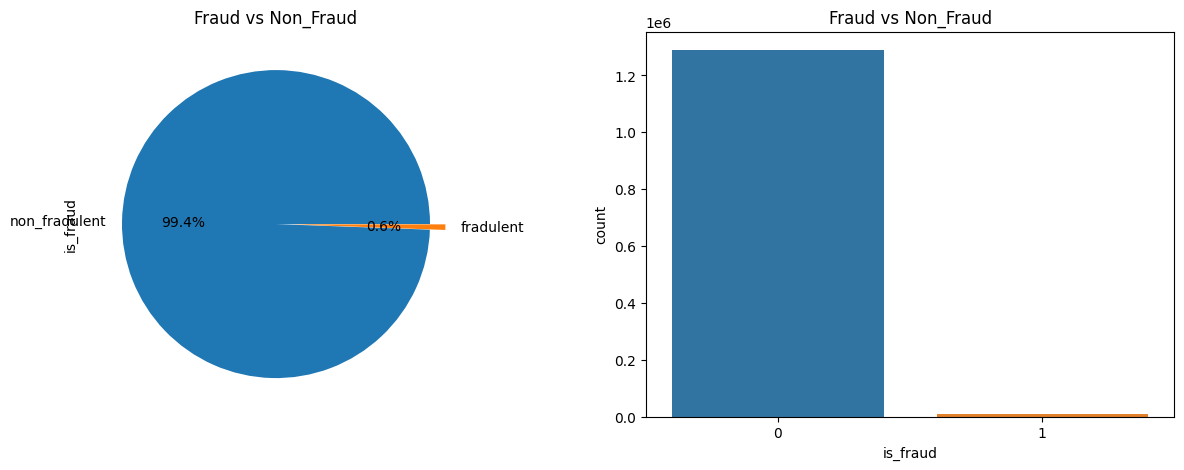

In [59]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
explode = (0,0.1)
df2.is_fraud.value_counts().plot.pie(labels = ["non_fradulent","fradulent"],autopct = "%1.1f%%",explode = explode)
plt.title("Fraud vs Non_Fraud",loc="center")
plt.subplot(1,2,2)
sns.countplot(x=df2.is_fraud)
plt.title("Fraud vs Non_Fraud",loc="center")
plt.show()

In [60]:
# imbalance ratio - majority class vs minority class
IR = round(len(df2[df2.is_fraud == 0]) / len(df2[df2.is_fraud == 1]),2)
IR

171.75

#### **It is highly imbalanced data**

### **Univariate Analysis**

In [61]:
df2.head()

spending_category  transaction_amount gender            city  city_pop  \
0          misc_net             4.97000      F  Moravian Falls      3495   
1       grocery_pos           107.23000      F          Orient       149   
2     entertainment           220.11000      M      Malad City      4154   
3     gas_transport            45.00000      M         Boulder      1939   
4          misc_pos            41.96000      M        Doe Hill        99   

                                 job  is_fraud TxnDayOfWeek TxnYear TxnMonth  \
0          Psychologist, counselling         0      Tuesday    2019  January   
1  Special educational needs teacher         0      Tuesday    2019  January   
2        Nature conservation officer         0      Tuesday    2019  January   
3                    Patent attorney         0      Tuesday    2019  January   
4     Dance movement psychotherapist         0      Tuesday    2019  January   

  time_category      cust_age_group  distance(km) usa_regions  hist_trans_30d  \
0      Midnight  Middle Aged Adults      78.59757       South        56.00000   
1      Midnight  Middle Aged Adults      30.21218        West        38.00000   
2      Midnight  Middle Aged Adults     108.20608        West         8.00000   
3      Midnight  Middle Aged Adults      95.67323        West       123.00000   
4      Midnight  Middle Aged Adults      77.55674       South       144.00000   

   hist_trans_24h  hist_trans_avg_amt_30d  hist_trans_avg_amt_24h  
0         5.00000                57.66804                34.40000  
1         2.00000                46.64316                68.22000  
2         5.00000               377.92500               445.77800  
3         6.00000                60.80642                39.70000  
4         4.00000                55.00174                43.65500

#### **Analysis of Categorical Variables**

In [62]:
cat_var = df2.select_dtypes(include=['category']).columns
print(cat_var)

Index(['spending_category', 'gender', 'city', 'job', 'TxnDayOfWeek', 'TxnYear',
       'TxnMonth', 'time_category', 'cust_age_group', 'usa_regions'],
      dtype='object')


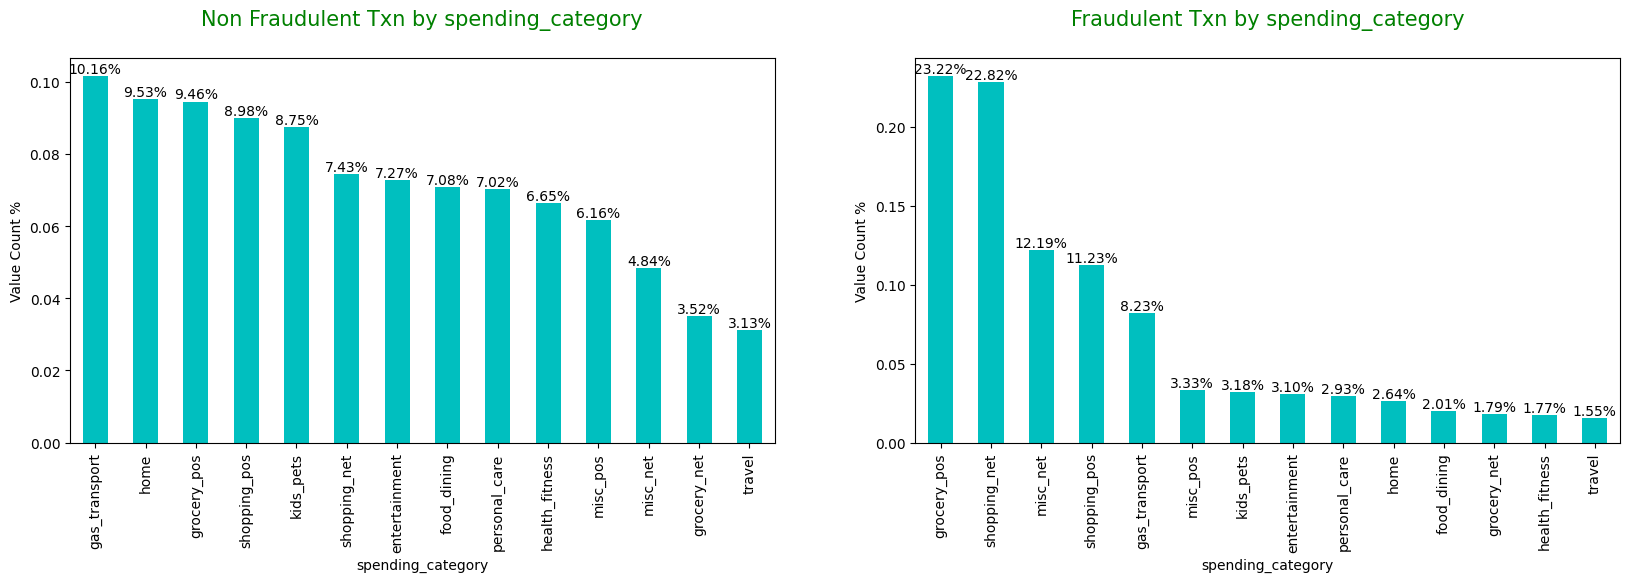

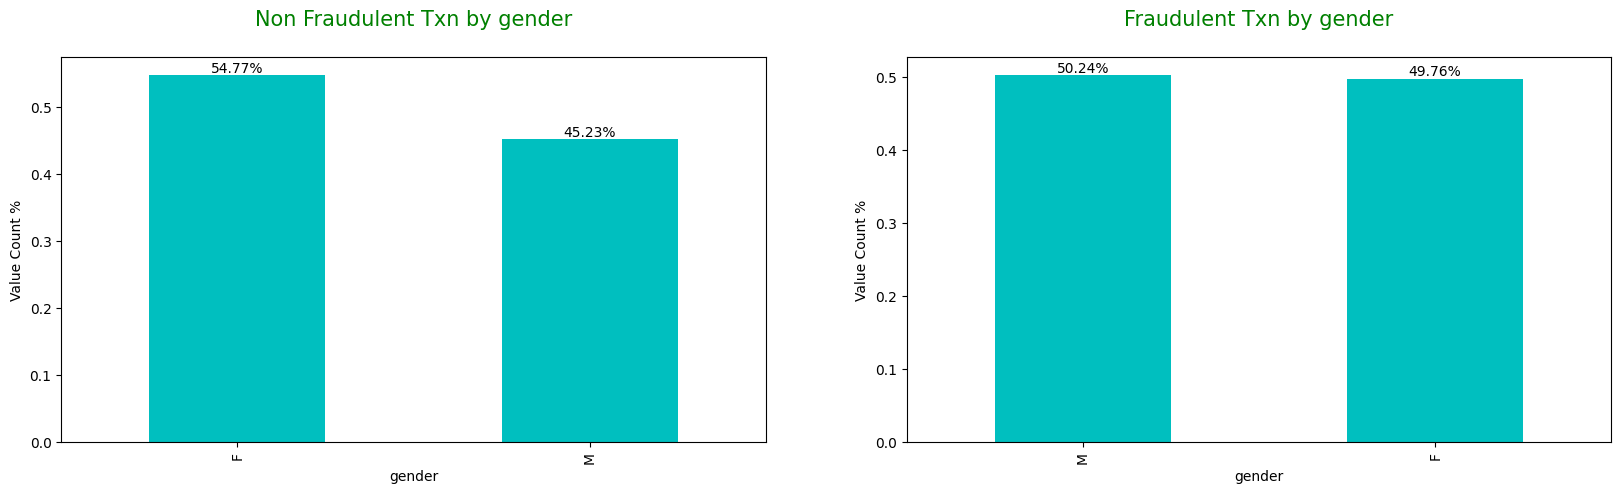

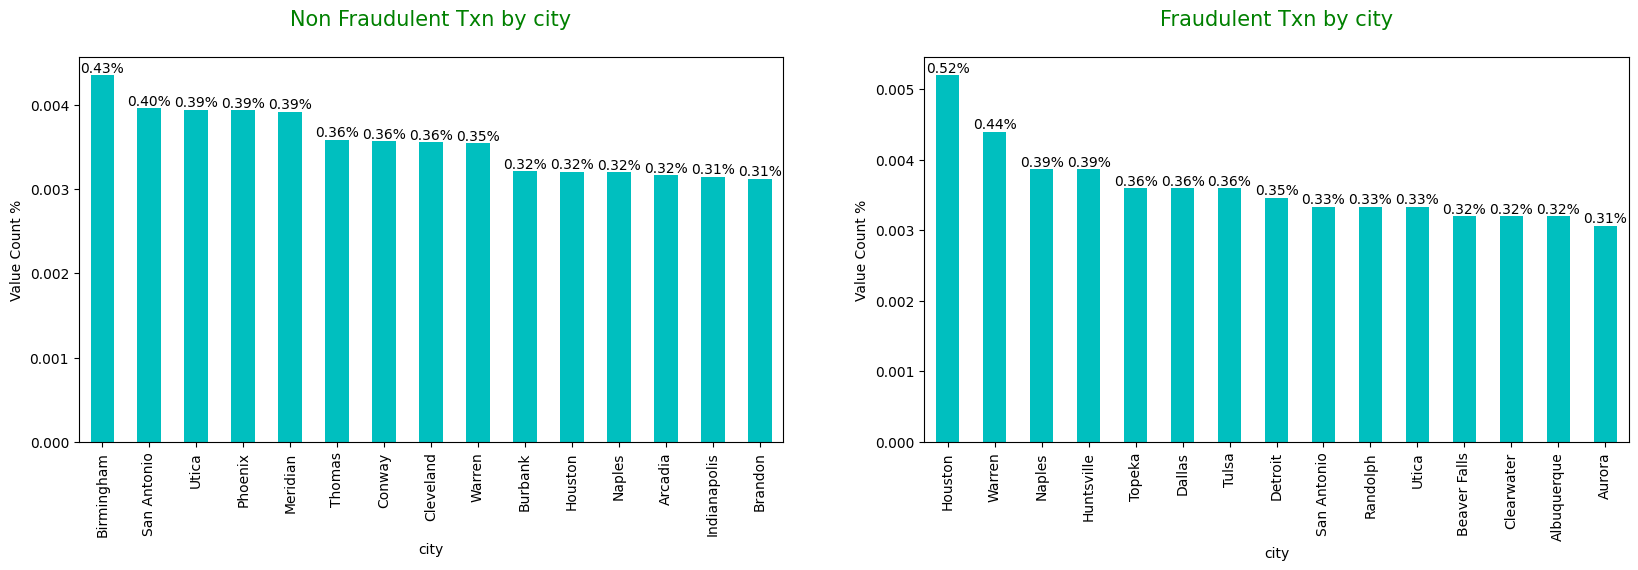

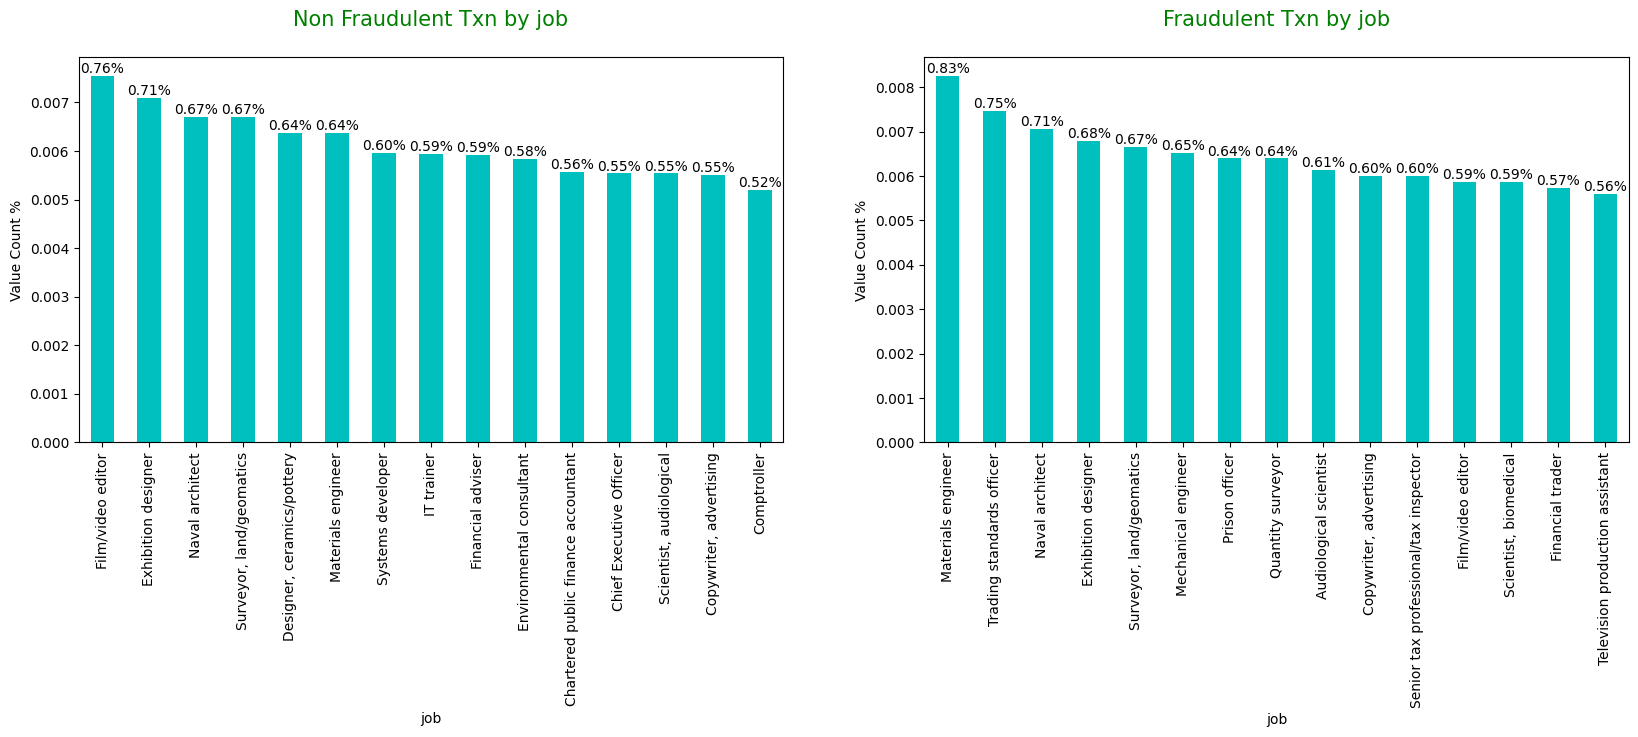

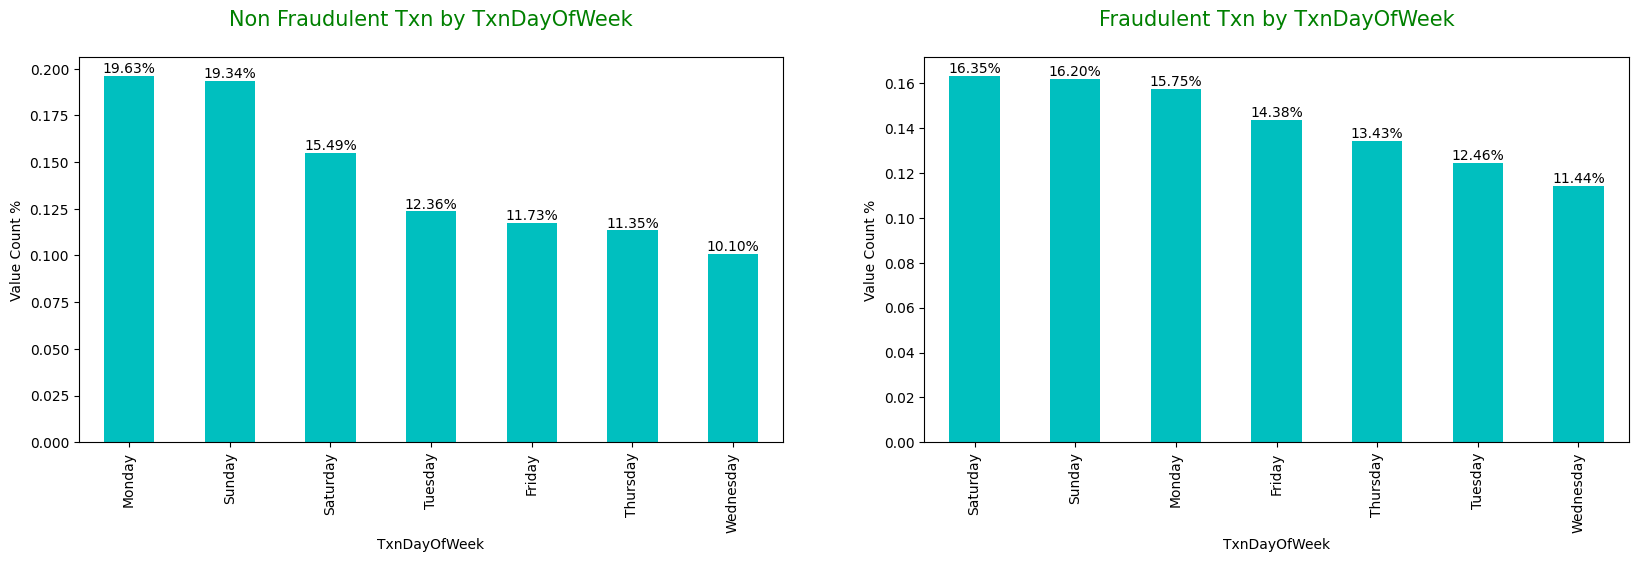

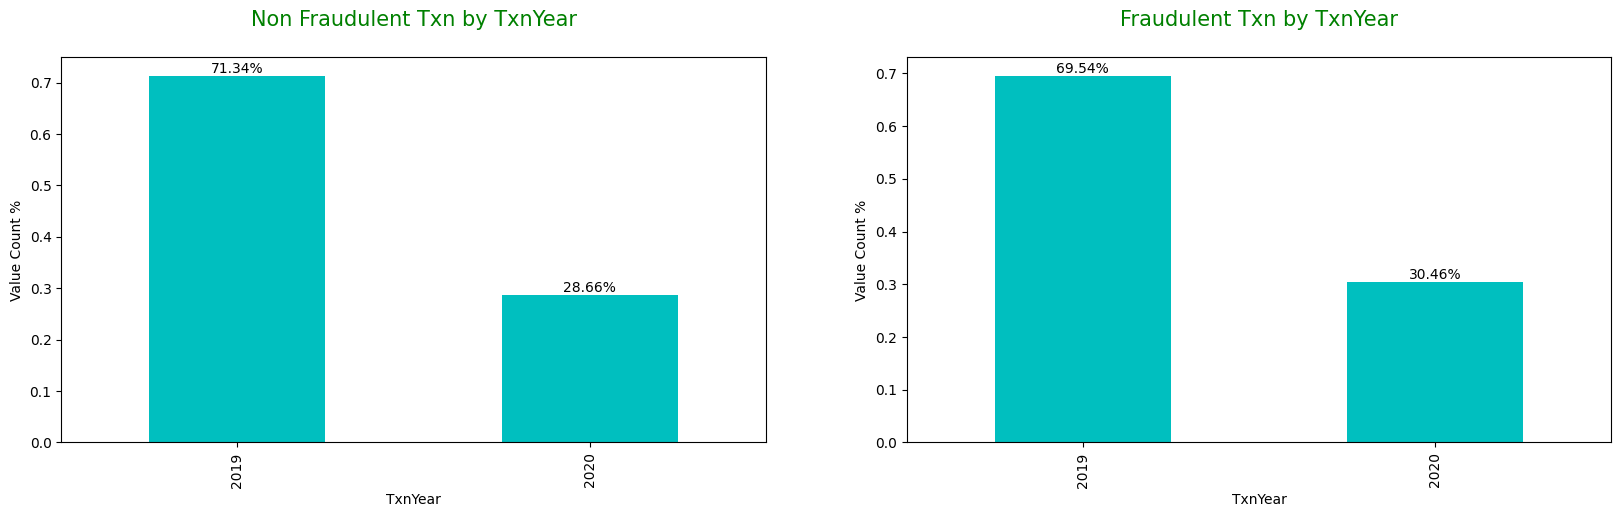

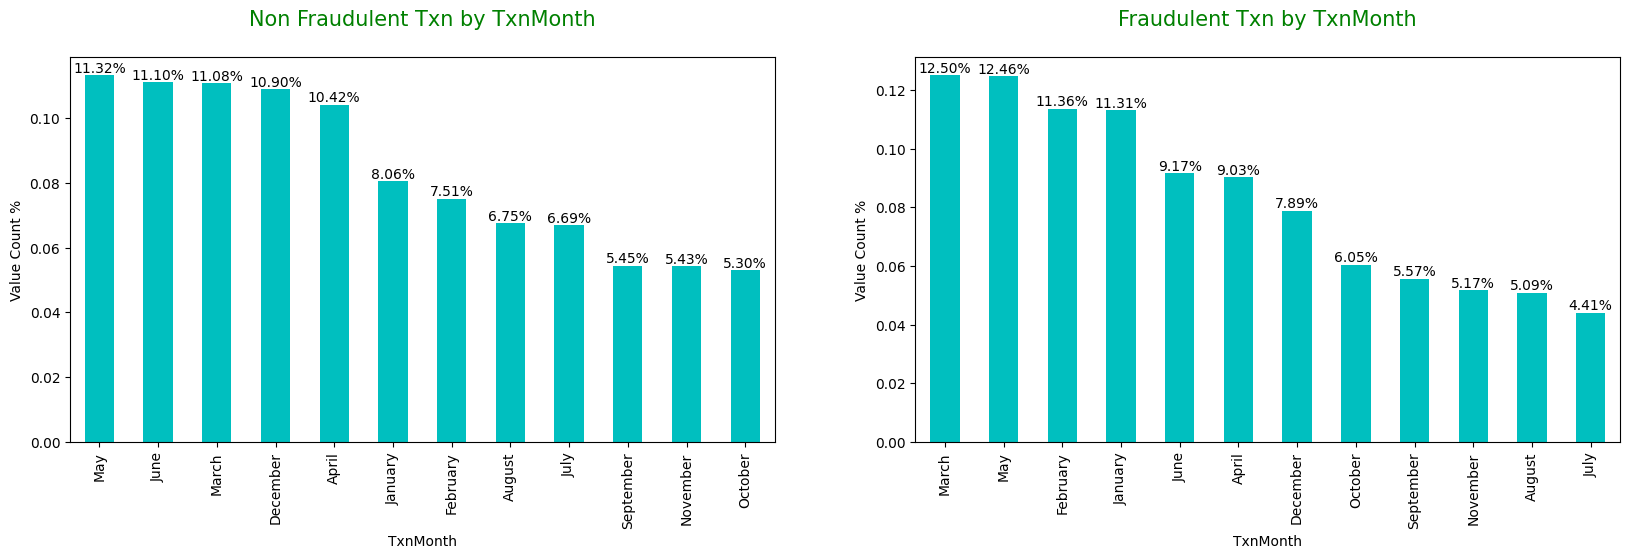

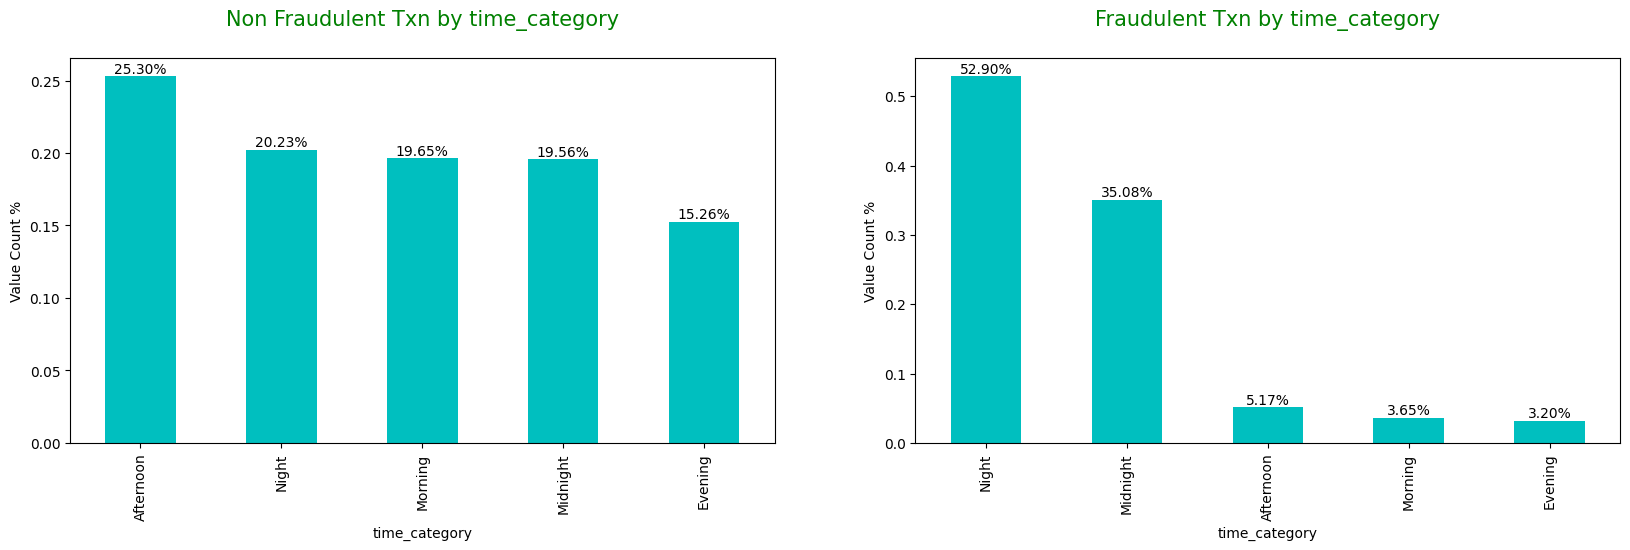

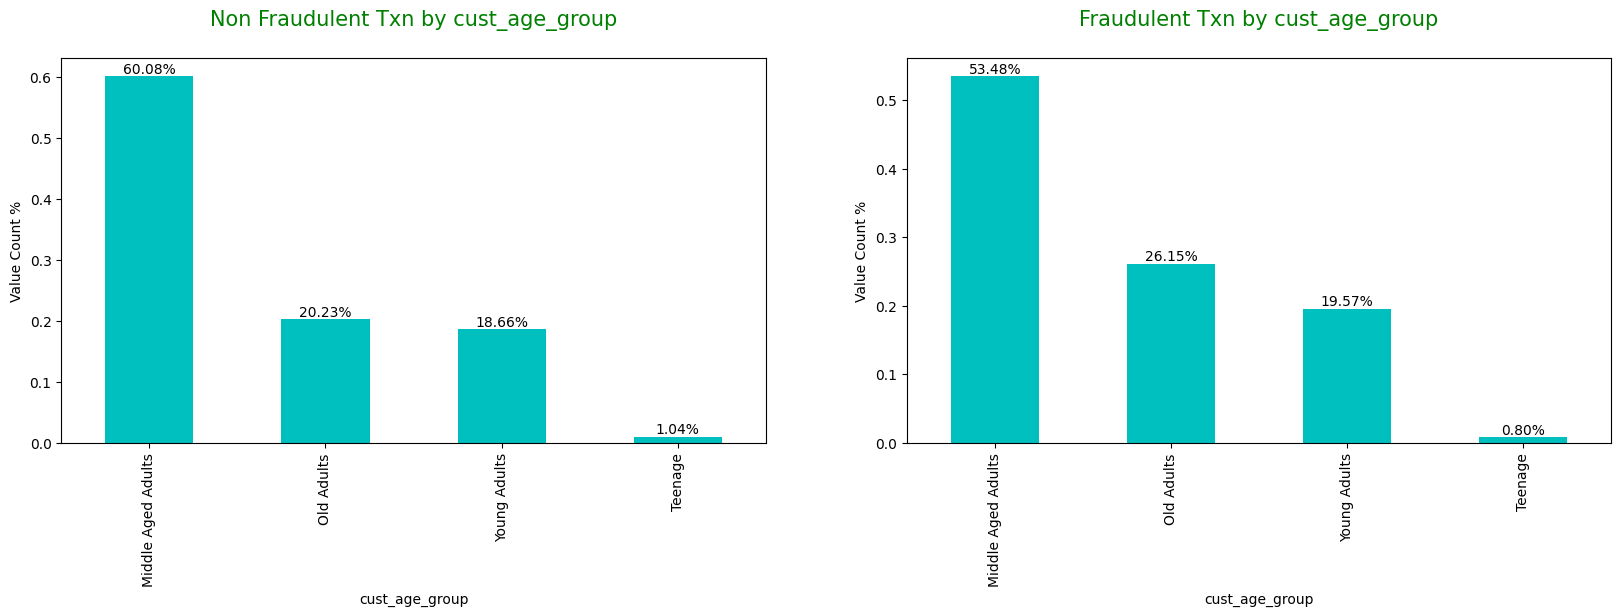

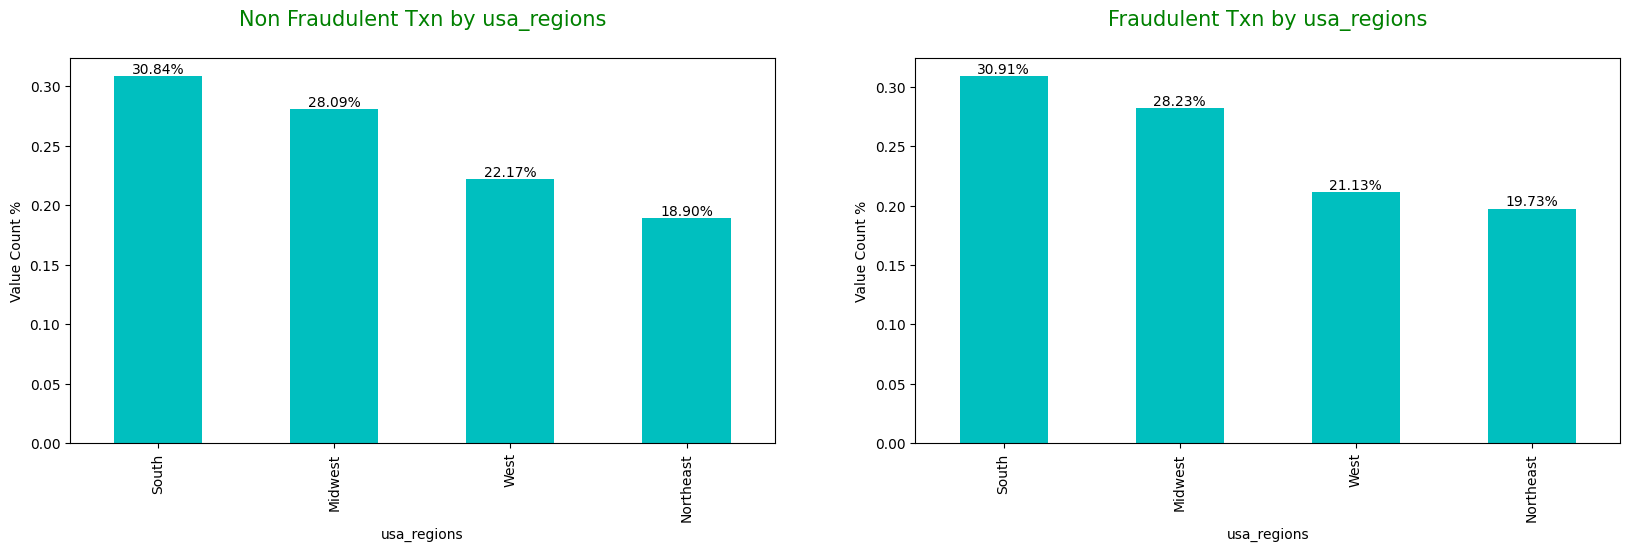

In [63]:
for i in cat_var:
  plt.figure(figsize=(20,5))
  plt.subplot(1,2,1)
  df2[df2['is_fraud']==0][i].value_counts(normalize=True).head(15).plot.bar(color='c')
  plt.xlabel(f"{i}")
  plt.ylabel("Value Count %")
  plt.title(f"Non Fraudulent Txn by {i}\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
# Add bar labels
  counts_non_fraud = df2[df2['is_fraud'] == 0][i].value_counts(normalize=True).head(15)
  for j, count in enumerate(counts_non_fraud):
    plt.text(j, count, f"{count:.2%}", ha='center', va='bottom')

  plt.subplot(1,2,2)
  df2[df2['is_fraud']==1][i].value_counts(normalize=True).head(15).plot.bar(color='c')
  plt.xlabel(f"{i}")
  plt.ylabel("Value Count %")
  plt.title(f"Fraudulent Txn by {i}\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})

  counts_fraud = df2[df2['is_fraud'] == 1][i].value_counts(normalize=True).head(15)
  for j, count in enumerate(counts_fraud):
    plt.text(j, count, f"{count:.2%}", ha='center', va='bottom')

  plt.show()

#### **Insight**
- **Spending categories such as grocery_pos,shopping_net, misc_net and shopping_pos seems indicative for fraudulent transactions**
- **Male gender sightly high susceptible to fraudulent transactions comapred to female**
- **Houston, Warren and Napless are cities observed more fraudulent transactions**
- **Non fraudulent transactions tend to happen more often on Monday whereas fraudulent transactions happens more on Saturday**
- **Fraudulent transactions observed more in month of January, February, May and March**
- **Nights and Midnights are highly prone to fraud while non fraudulent transactions happens more in afternoon**
- **Old adults are more sensitive to frauds compare to other age groups**
- **South and Northeast regions shows incidents of more fraudulent transactions**
- **Transaction year does not have any indication to fraudulent transactions**

#### **Analysis of Numerical Variables**

In [64]:
df2.dtypes

spending_category         category
transaction_amount         float64
gender                    category
city                      category
city_pop                     int64
job                       category
is_fraud                     int64
TxnDayOfWeek              category
TxnYear                   category
TxnMonth                  category
time_category             category
cust_age_group            category
distance(km)               float64
usa_regions               category
hist_trans_30d             float64
hist_trans_24h             float64
hist_trans_avg_amt_30d     float64
hist_trans_avg_amt_24h     float64
dtype: object

In [65]:
num_var = df2.select_dtypes(include=[np.number]).columns
num_var = num_var[num_var != 'is_fraud']
print(num_var)

Index(['transaction_amount', 'city_pop', 'distance(km)', 'hist_trans_30d',
       'hist_trans_24h', 'hist_trans_avg_amt_30d', 'hist_trans_avg_amt_24h'],
      dtype='object')


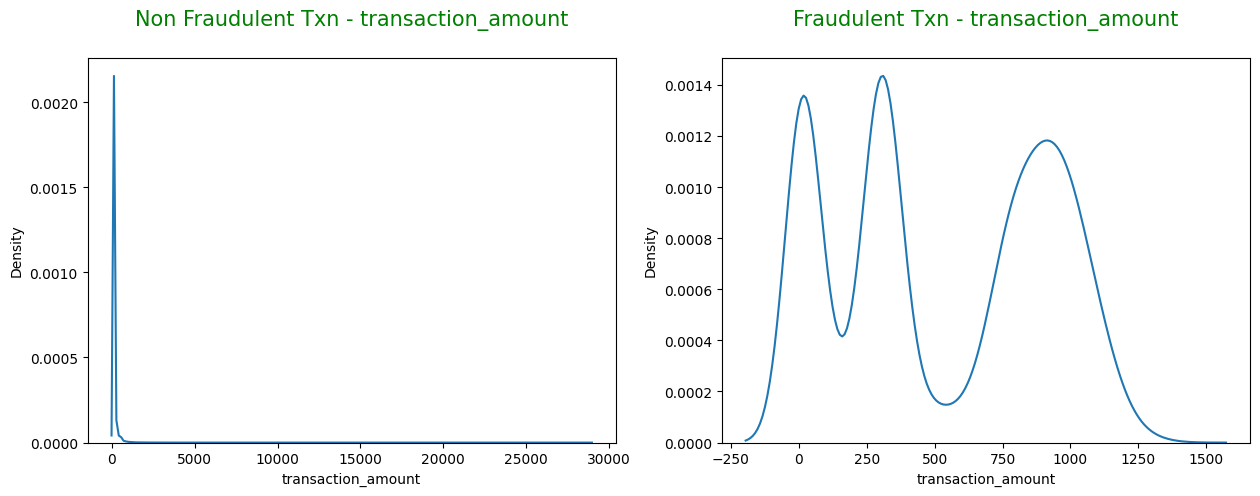

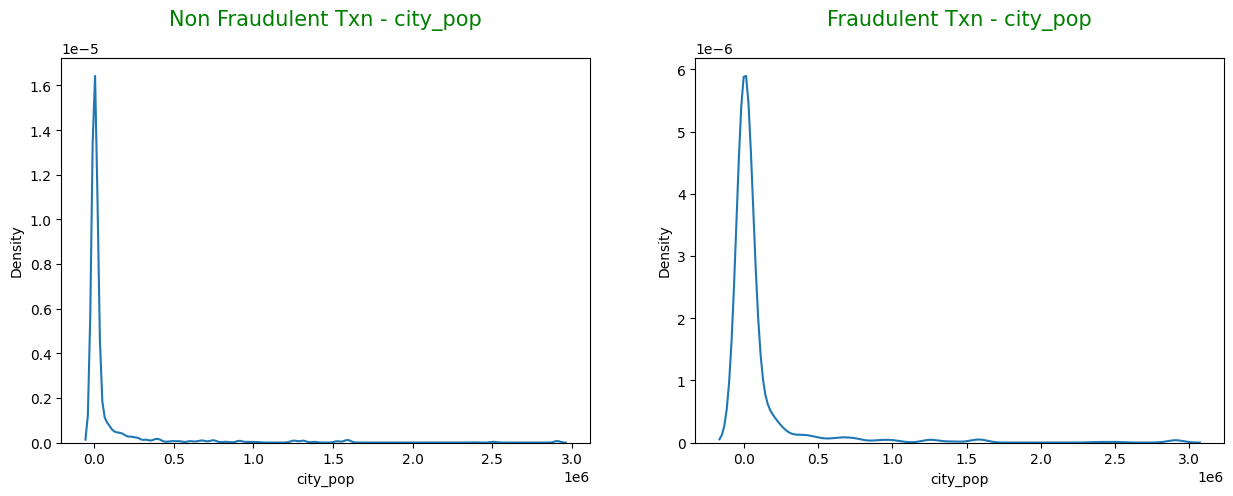

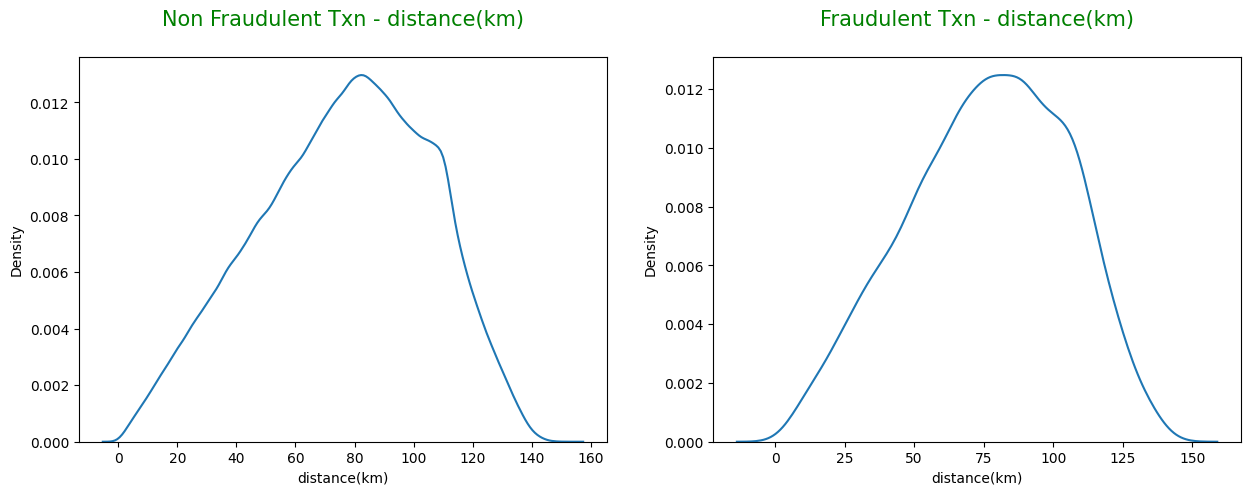

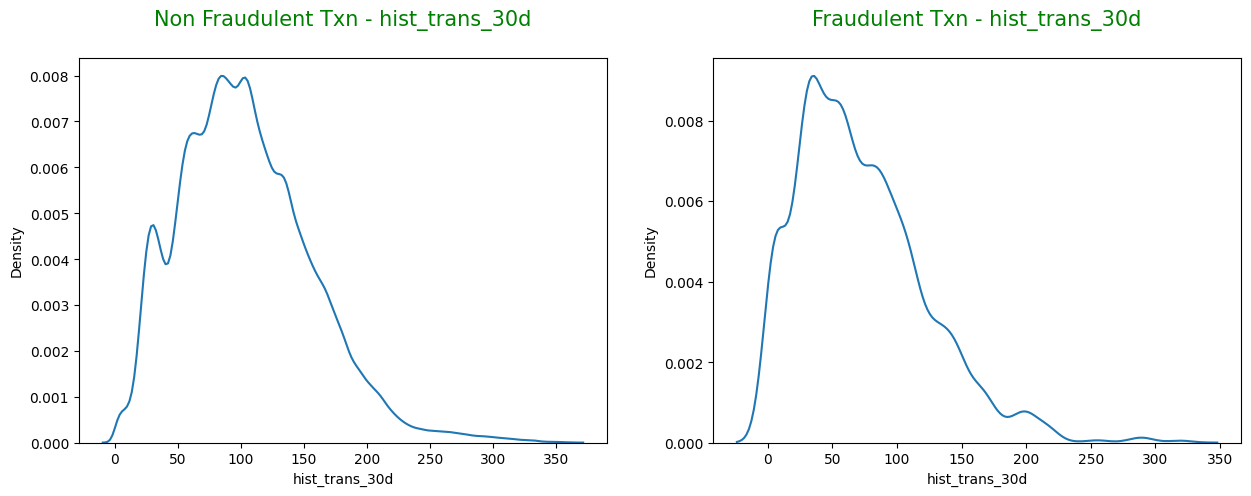

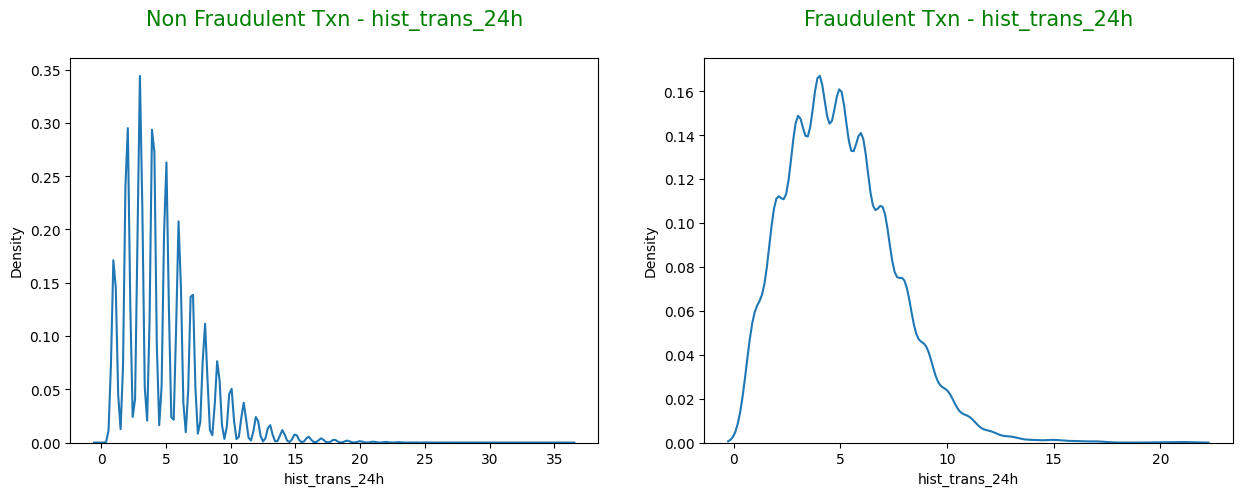

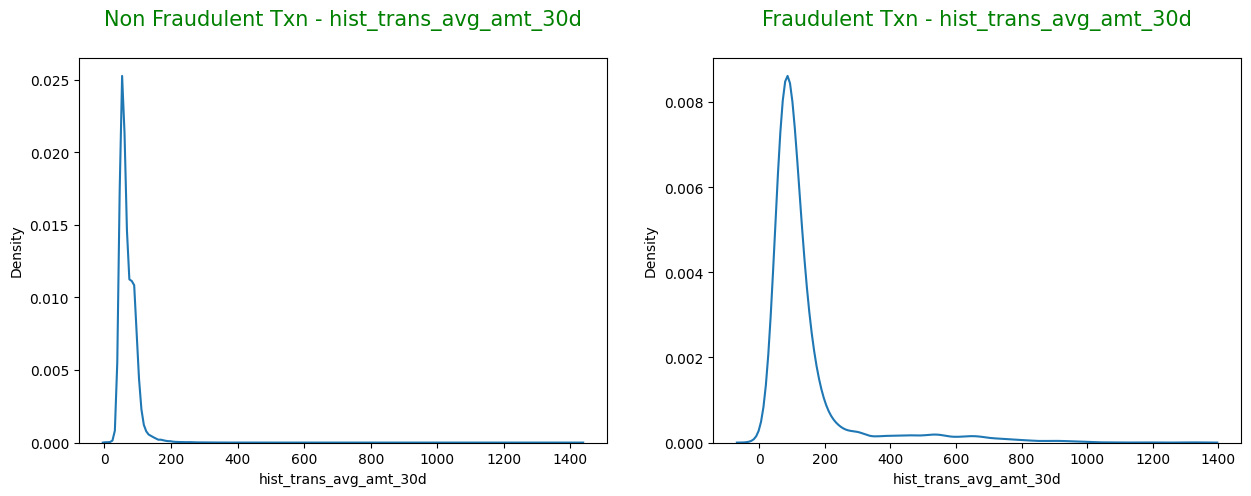

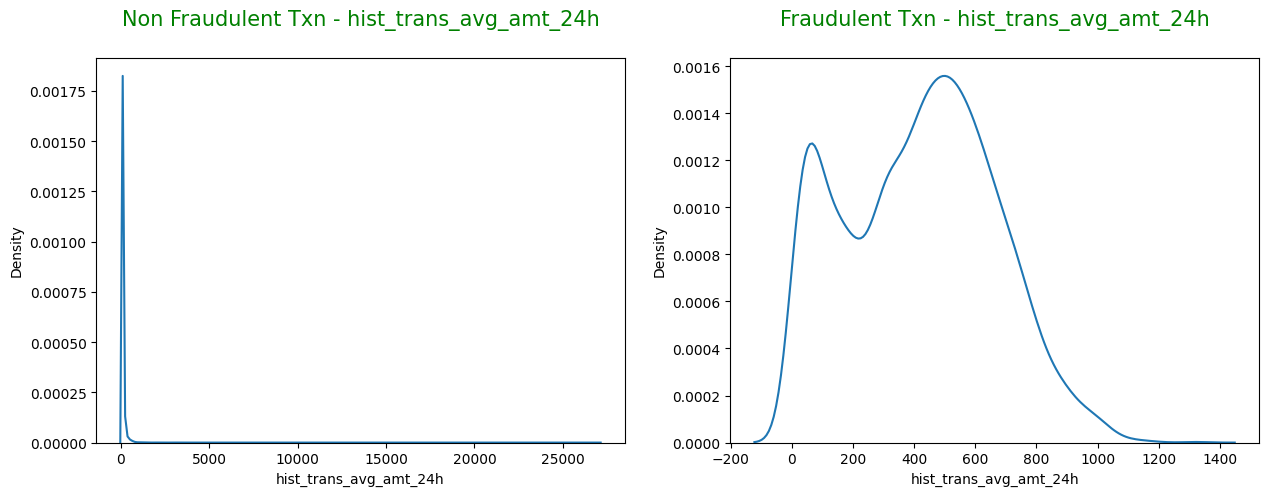

In [66]:
for i in num_var:
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  sns.kdeplot(data=df2[df2['is_fraud'] == 0],x=i)
  plt.title(f"Non Fraudulent Txn - {i}\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
  plt.subplot(1,2,2)
  sns.kdeplot(data=df2[df2['is_fraud'] == 1],x=i)
  plt.title(f"Fraudulent Txn - {i}\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
  plt.show()

#### **Insights**
- **no fraudulent transaction amount and city population feature is highly right skewed**
- **fraudulent transaction amount shows multimodel distribution however tree based models handles multimodel distribution**
- **distance between customer base and merchant shows identical distribution for fraudulent transactions and non fraudulent transactions**
- **moving average amount in both fraud and non fraudulent transactions are normally distributted**
- **distribution of 24 hours moving average transaction amount is widely spread for fraudulent transactions compared to non-fraudulent transactions**
- **distribution of 30 days moving average transaction amount slightly spread for fraudulent transactions compared to non-fraudulent transactions**
- **distribution of 24 hours moving average of transaction count is widely spread for fraudulent transactions compared to non-fraudulent transactions**

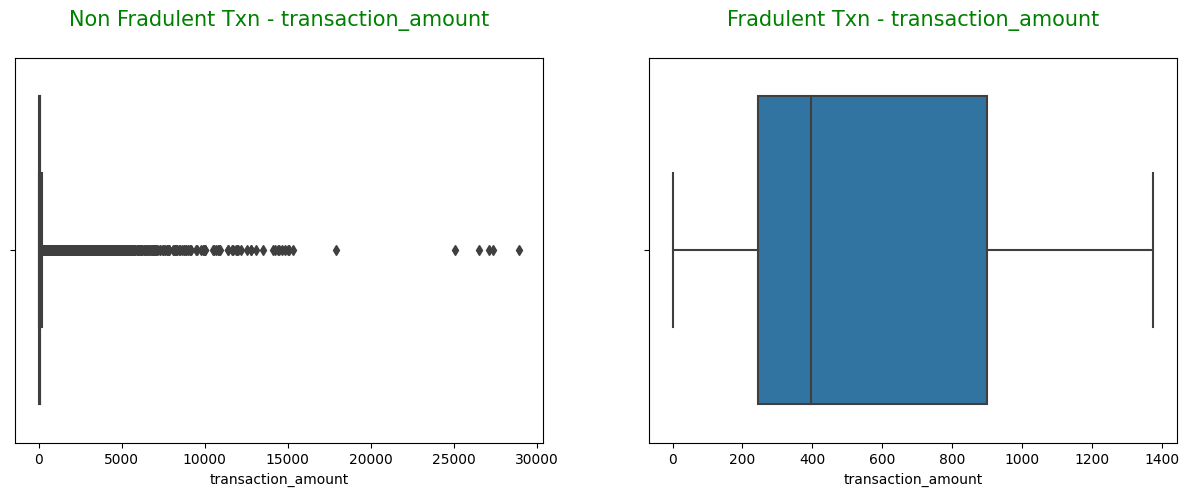

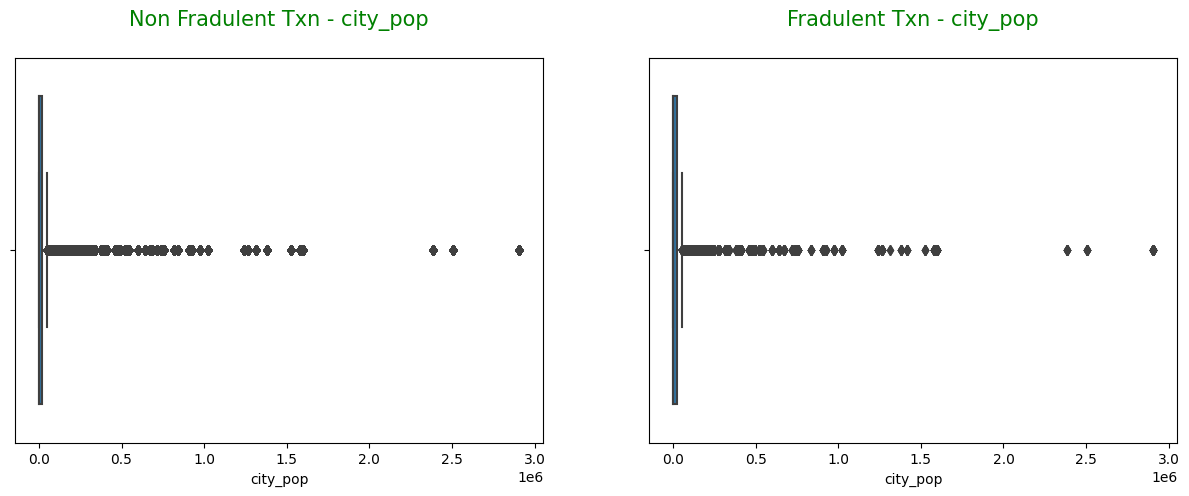

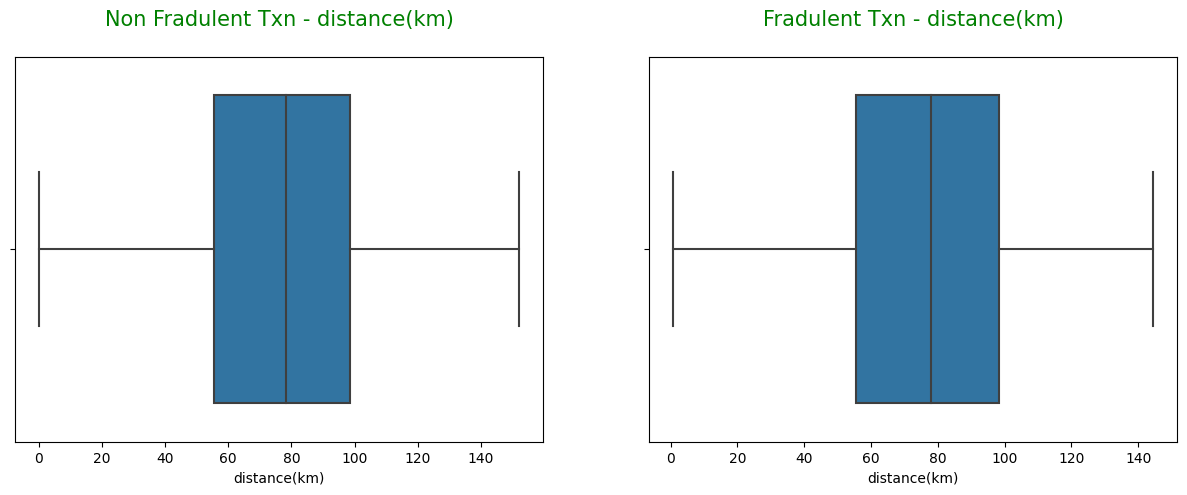

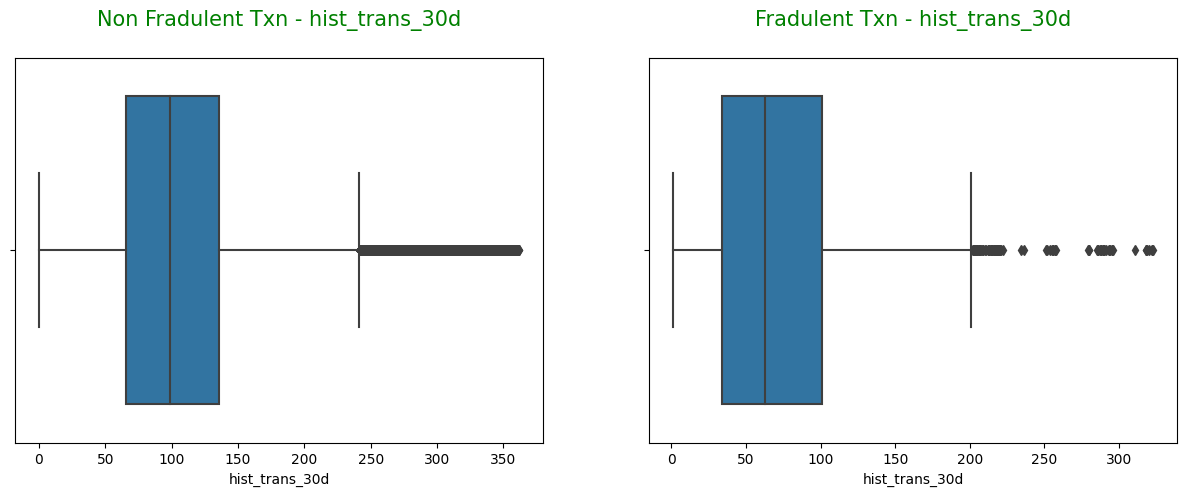

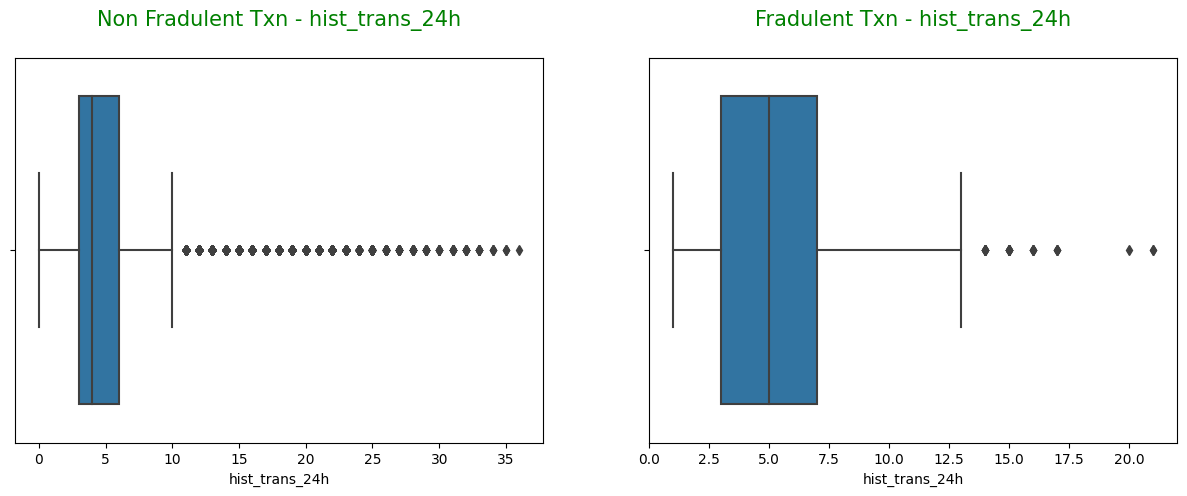

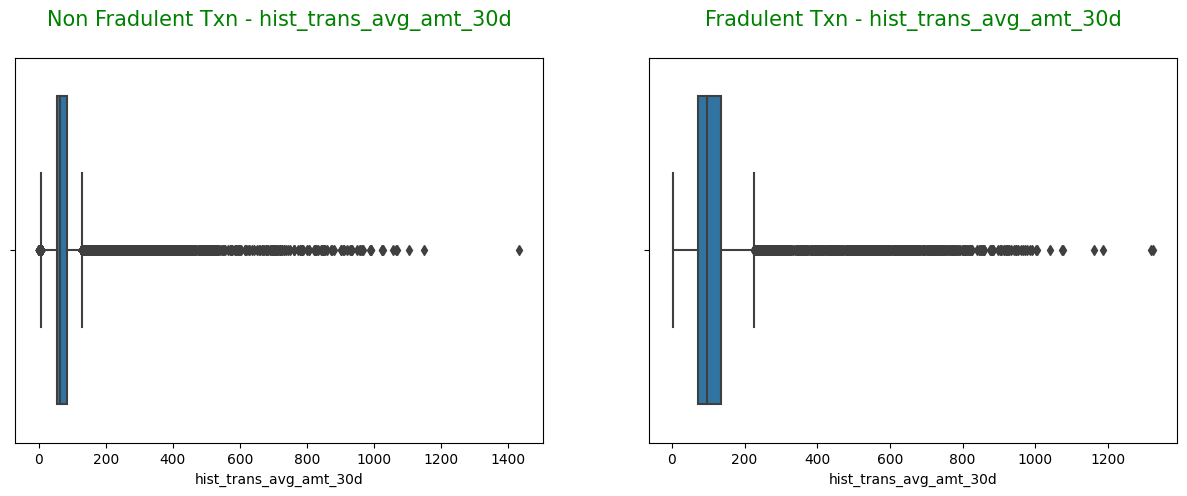

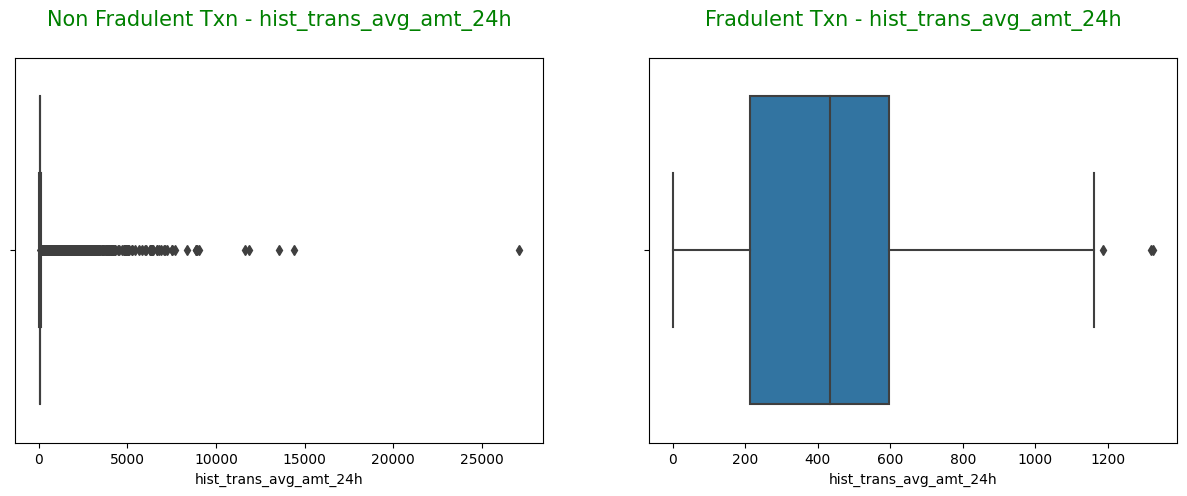

In [67]:
for i in num_var:
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  sns.boxplot(data=df2[df2['is_fraud'] == 0],x=i)
  plt.title(f"Non Fradulent Txn - {i}\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
  plt.subplot(1,2,2)
  sns.boxplot(data=df2[df2['is_fraud'] == 1],x=i)
  plt.title(f"Fradulent Txn - {i}\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
  plt.show()

#### **Insight**
- **non fraudulent transaction amount and city population both features have outliers and that can be handled during imputation**
- **Surprizingly, fraudulent transaction amount is is very less comapred to non fraudulent transaction amount**
- **distance does not have any outliers from fraudulent transactions**

## **Bivariate Analysis**

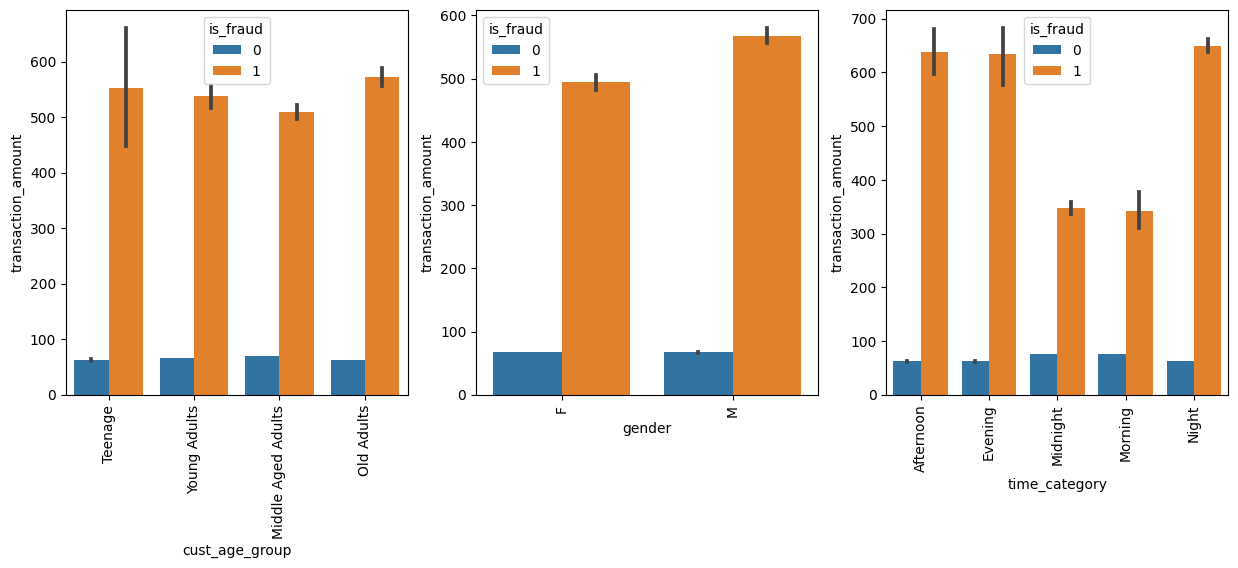

In [68]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.barplot(x='cust_age_group', y='transaction_amount', hue='is_fraud', data=df2)
plt.xticks(rotation = 90)

plt.subplot(1,3,2)
sns.barplot(x='gender',y='transaction_amount',hue='is_fraud',data=df2)
plt.xticks(rotation = 90)

plt.subplot(1,3,3)
sns.barplot(x='time_category',y='transaction_amount',hue='is_fraud',data=df2)
plt.xticks(rotation = 90)
plt.show()

plt.show()



#### **Insight**
- **Transaction amount of frauduent transactions done by old adults and teenage is high**
- **Transaction amount of frauduent transactions done by male customers is high**
- **Transaction amount of frauduent transactions done in the nights,afternoon and evening is high**

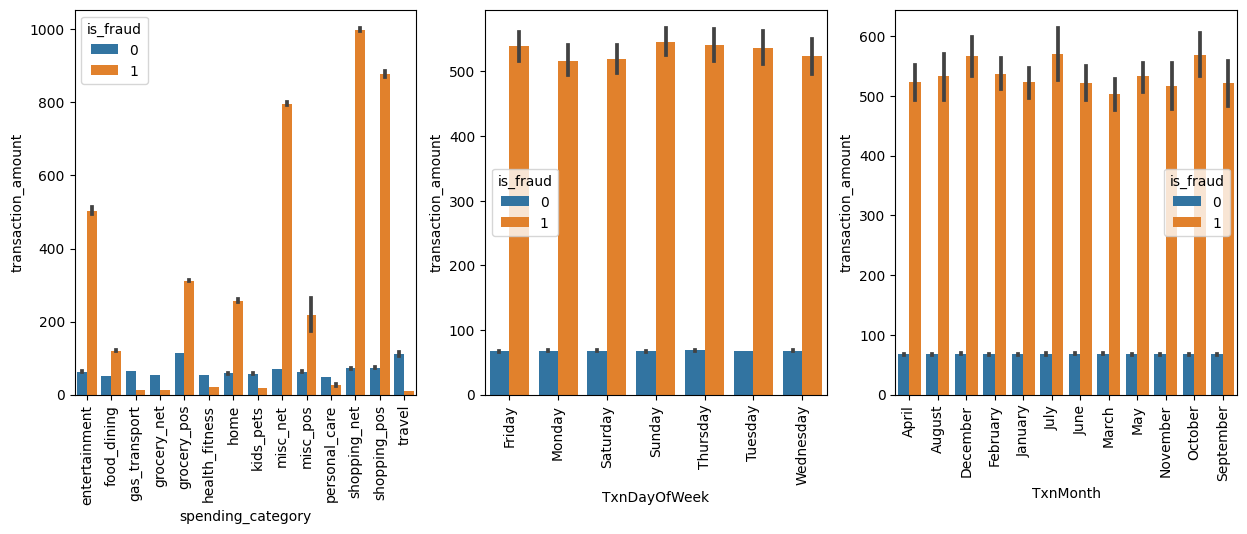

In [69]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.barplot(x='spending_category', y='transaction_amount', hue='is_fraud', data=df2)
plt.xticks(rotation = 90)

plt.subplot(1,3,2)
sns.barplot(x='TxnDayOfWeek',y='transaction_amount',hue='is_fraud',data=df2)
plt.xticks(rotation = 90)

plt.subplot(1,3,3)
sns.barplot(x='TxnMonth',y='transaction_amount',hue='is_fraud',data=df2)
plt.xticks(rotation = 90)
plt.show()

plt.show()

#### **Insight**
- **Transaction amount of frauduent transactions done by shopping_net and shopping_pos spending category is high**
- **Transaction amount of frauduent transactions done on Sunday is high**
- **Transaction amount of frauduent transactions done in October, Jule and December is high**

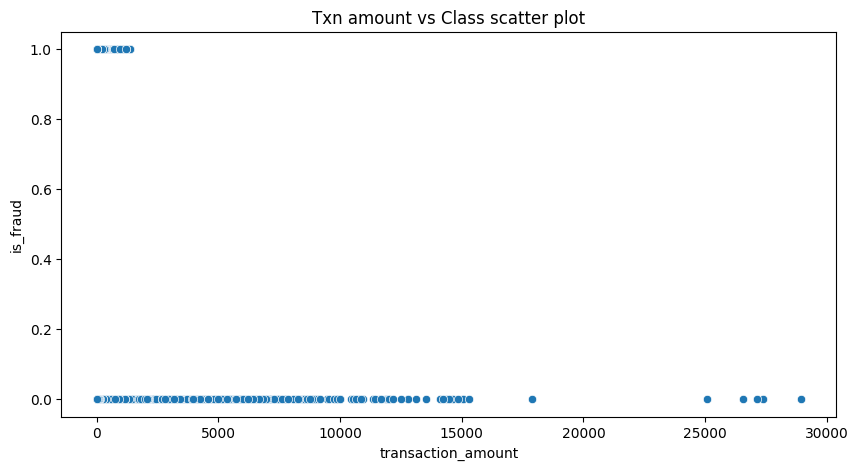

In [70]:
plt.figure(figsize=(10,5))
sns.scatterplot(data = df2, x="transaction_amount", y="is_fraud")
plt.title("Txn amount vs Class scatter plot")
plt.show()

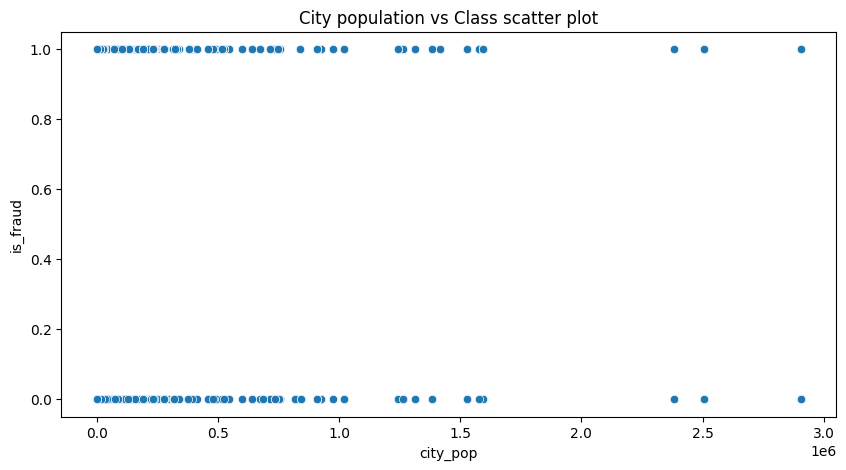

In [71]:
plt.figure(figsize=(10,5))
sns.scatterplot(data = df2, x="city_pop", y="is_fraud")
plt.title("City population vs Class scatter plot")
plt.show()

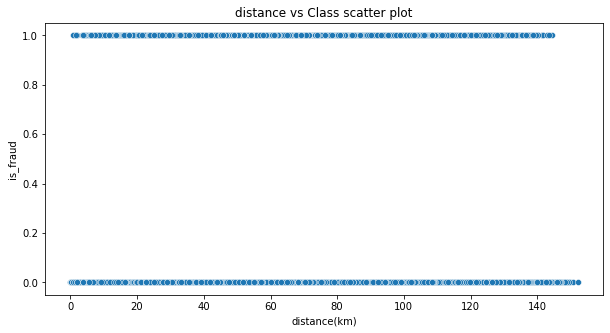

In [68]:
plt.figure(figsize=(10,5))
sns.scatterplot(data = df2, x="distance(km)", y="is_fraud")
plt.title("distance vs Class scatter plot")
plt.show()

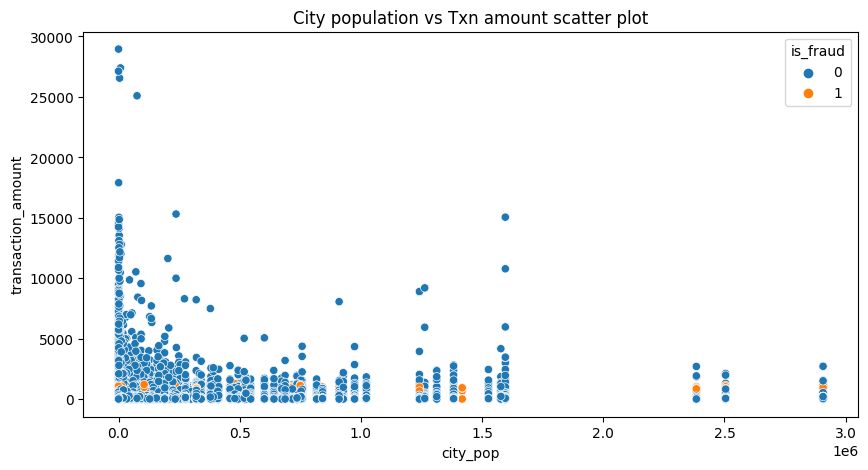

In [72]:
plt.figure(figsize=(10,5))
sns.scatterplot(data = df2, x="city_pop", y="transaction_amount",hue=df2['is_fraud'].astype('category'))
plt.title("City population vs Txn amount scatter plot")
plt.show()

<Figure size 600x500 with 0 Axes>

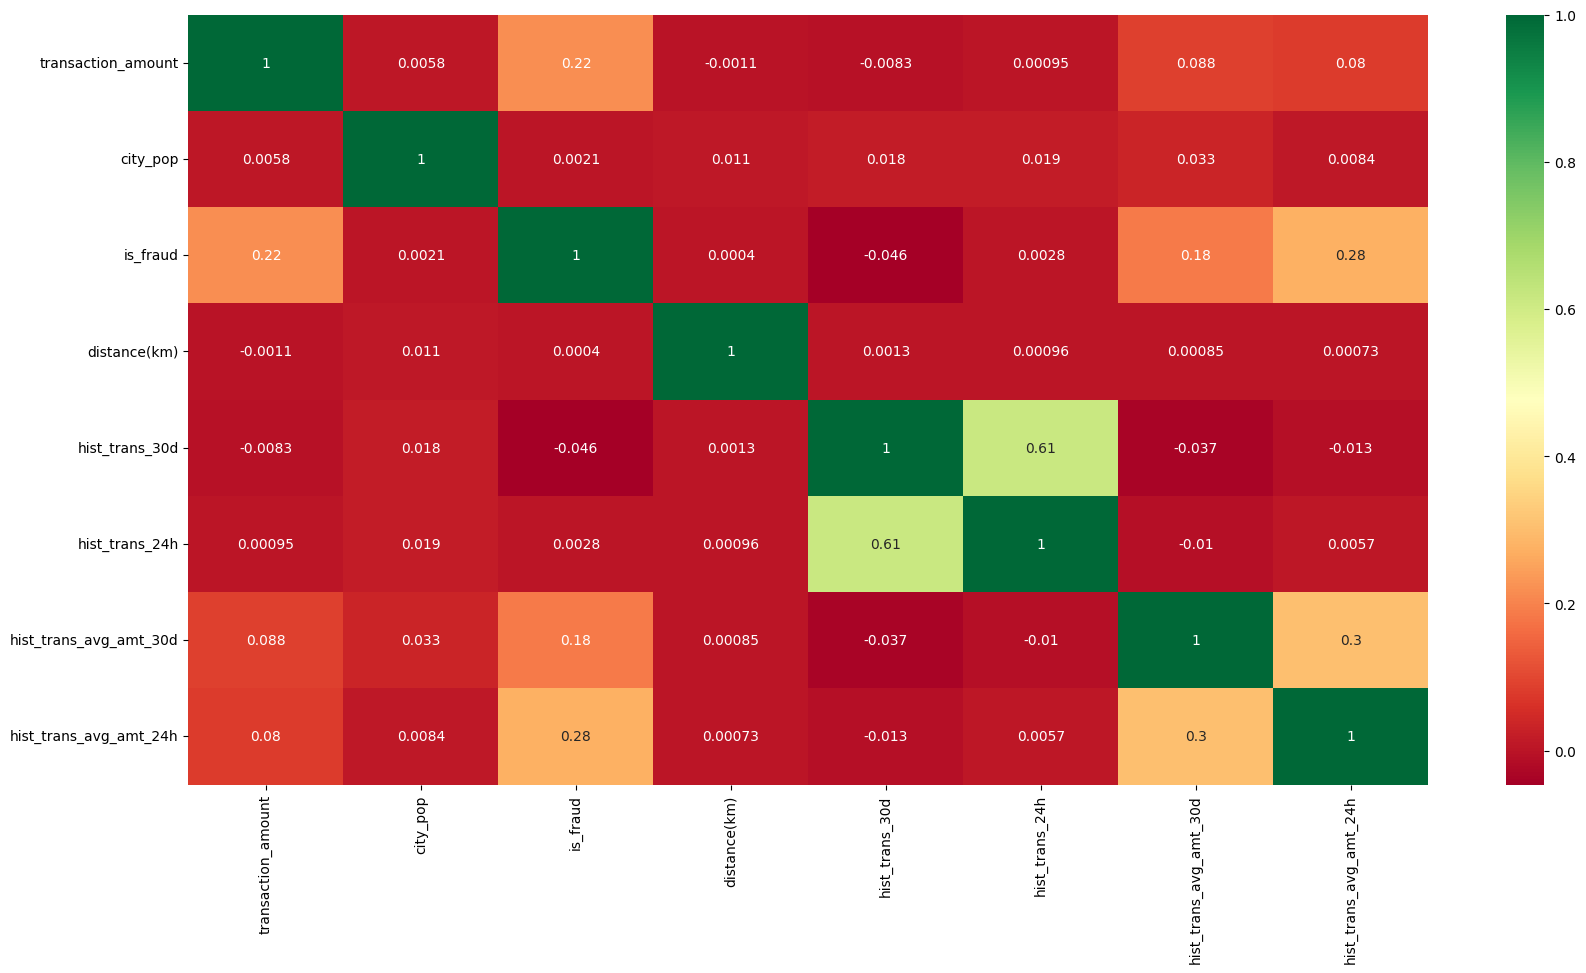

In [73]:
plt.figure(figsize=(6,5))
corr_matrix = df2.corr()
plt.figure(figsize=(20,10))
sns.heatmap(df2[corr_matrix.index].corr(),annot=True,cmap='RdYlGn')
plt.show()

#### **Insights**

- **It seems there is no relationship between fraud and city population**
- **Transaction amount shows some relationship with fraud**

## **Data Preparation for Model Building**

### **Drop unnecessary columns**

In [74]:
df2.head()

spending_category  transaction_amount gender            city  city_pop  \
0          misc_net             4.97000      F  Moravian Falls      3495   
1       grocery_pos           107.23000      F          Orient       149   
2     entertainment           220.11000      M      Malad City      4154   
3     gas_transport            45.00000      M         Boulder      1939   
4          misc_pos            41.96000      M        Doe Hill        99   

                                 job  is_fraud TxnDayOfWeek TxnYear TxnMonth  \
0          Psychologist, counselling         0      Tuesday    2019  January   
1  Special educational needs teacher         0      Tuesday    2019  January   
2        Nature conservation officer         0      Tuesday    2019  January   
3                    Patent attorney         0      Tuesday    2019  January   
4     Dance movement psychotherapist         0      Tuesday    2019  January   

  time_category      cust_age_group  distance(km) usa_regions  hist_trans_30d  \
0      Midnight  Middle Aged Adults      78.59757       South        56.00000   
1      Midnight  Middle Aged Adults      30.21218        West        38.00000   
2      Midnight  Middle Aged Adults     108.20608        West         8.00000   
3      Midnight  Middle Aged Adults      95.67323        West       123.00000   
4      Midnight  Middle Aged Adults      77.55674       South       144.00000   

   hist_trans_24h  hist_trans_avg_amt_30d  hist_trans_avg_amt_24h  
0         5.00000                57.66804                34.40000  
1         2.00000                46.64316                68.22000  
2         5.00000               377.92500               445.77800  
3         6.00000                60.80642                39.70000  
4         4.00000                55.00174                43.65500

In [27]:
# dropping less important and unnecessay features from the data
drop_col = ['city','job','TxnYear']

In [28]:
df3 = df2.drop(drop_col,axis=1)

In [77]:
df3.shape

(1296675, 15)

In [78]:
df3.head()

spending_category  transaction_amount gender  city_pop  is_fraud  \
0          misc_net             4.97000      F      3495         0   
1       grocery_pos           107.23000      F       149         0   
2     entertainment           220.11000      M      4154         0   
3     gas_transport            45.00000      M      1939         0   
4          misc_pos            41.96000      M        99         0   

  TxnDayOfWeek TxnMonth time_category      cust_age_group  distance(km)  \
0      Tuesday  January      Midnight  Middle Aged Adults      78.59757   
1      Tuesday  January      Midnight  Middle Aged Adults      30.21218   
2      Tuesday  January      Midnight  Middle Aged Adults     108.20608   
3      Tuesday  January      Midnight  Middle Aged Adults      95.67323   
4      Tuesday  January      Midnight  Middle Aged Adults      77.55674   

  usa_regions  hist_trans_30d  hist_trans_24h  hist_trans_avg_amt_30d  \
0       South        56.00000         5.00000                57.66804   
1        West        38.00000         2.00000                46.64316   
2        West         8.00000         5.00000               377.92500   
3        West       123.00000         6.00000                60.80642   
4       South       144.00000         4.00000                55.00174   

   hist_trans_avg_amt_24h  
0                34.40000  
1                68.22000  
2               445.77800  
3                39.70000  
4                43.65500

### **Label Encoding**
- **label encoding encodes categorical features into numerical values.**
- **It also helps to reduce the dimensionality of the feature space since there are few variables having large number of distinct categoris.**

In [29]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical column
le_spending_category = LabelEncoder()
le_gender = LabelEncoder()
le_TxnDayOfWeek = LabelEncoder()
le_TxnMonth = LabelEncoder()
le_time_category = LabelEncoder()
le_cust_age_group = LabelEncoder()
le_usa_regions = LabelEncoder()

# Fit the LabelEncoder objects to the respective categorical columns
le_spending_category.fit(df3['spending_category'])
le_gender.fit(df3['gender'])
le_TxnDayOfWeek.fit(df3['TxnDayOfWeek'])
le_TxnMonth.fit(df3['TxnMonth'])
le_time_category.fit(df3['time_category'])
le_cust_age_group.fit(df3['cust_age_group'])
le_usa_regions.fit(df3['usa_regions'])

# Transform the categorical columns
df3['spending_category'] = le_spending_category.transform(df3['spending_category'])
df3['gender'] = le_gender.transform(df3['gender'])
df3['TxnDayOfWeek'] = le_TxnDayOfWeek.transform(df3['TxnDayOfWeek'])
df3['TxnMonth'] = le_TxnMonth.transform(df3['TxnMonth'])
df3['time_category'] = le_time_category.transform(df3['time_category'])
df3['cust_age_group'] = le_cust_age_group.transform(df3['cust_age_group'])
df3['usa_regions'] = le_usa_regions.transform(df3['usa_regions'])

### **Train-Test Split**

In [30]:
X = df3.drop('is_fraud',axis=1)
y = df3['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7,stratify=y,random_state=0)
## Checking the split of the class lable
print("Total Class Lables", np.sum(y))
print("Train Class Lables", np.sum(y_train))
print("Test Class Lables", np.sum(y_test))

Total Class Lables 7506
Train Class Lables 5254
Test Class Lables 2252


In [81]:
X.nunique()

spending_category              14
transaction_amount          52928
gender                          2
city_pop                      879
TxnDayOfWeek                    7
TxnMonth                       12
time_category                   5
cust_age_group                  4
distance(km)              1296675
usa_regions                     4
hist_trans_30d                363
hist_trans_24h                 37
hist_trans_avg_amt_30d    1260232
hist_trans_avg_amt_24h     529067
dtype: int64

In [82]:
X_train.head()

spending_category  transaction_amount  gender  city_pop  \
623145                   2            66.64000       0      1139   
56538                   12           163.93000       1       272   
1217494                  6           141.43000       1      3395   
1033660                 11             2.21000       0     14871   
1231557                  3            85.29000       1    254282   

         TxnDayOfWeek  TxnMonth  time_category  cust_age_group  distance(km)  \
623145              3        11              3               1      32.43020   
56538               3         3              0               3      46.69501   
1217494             3         8              0               0      63.11891   
1033660             5         7              4               0      54.23979   
1231557             0         8              3               1      52.91064   

         usa_regions  hist_trans_30d  hist_trans_24h  hist_trans_avg_amt_30d  \
623145             3       111.00000         9.00000                59.37405   
56538              0        41.00000         3.00000                62.69732   
1217494            2       106.00000         2.00000                55.22311   
1033660            3        73.00000         5.00000               149.66753   
1231557            3        52.00000         2.00000                57.71788   

         hist_trans_avg_amt_24h  
623145                 33.26333  
56538                  55.83667  
1217494                 4.27000  
1033660                92.40200  
1231557                64.05000

In [83]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907672 entries, 623145 to 374447
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   spending_category       907672 non-null  int64  
 1   transaction_amount      907672 non-null  float64
 2   gender                  907672 non-null  int64  
 3   city_pop                907672 non-null  int64  
 4   TxnDayOfWeek            907672 non-null  int64  
 5   TxnMonth                907672 non-null  int64  
 6   time_category           907672 non-null  int64  
 7   cust_age_group          907672 non-null  int64  
 8   distance(km)            907672 non-null  float64
 9   usa_regions             907672 non-null  int64  
 10  hist_trans_30d          907672 non-null  float64
 11  hist_trans_24h          907672 non-null  float64
 12  hist_trans_avg_amt_30d  907672 non-null  float64
 13  hist_trans_avg_amt_24h  907672 non-null  float64
dtypes: float64(6), 

In [84]:
X_train_2=X_train

### **Feature Scaling**

- **Though tree based algorithms such as decesion tree and random forest not sensitive to feature scale, it is necessary for gradient based optimization algorithms such as xgboost to converge fast**
- **Scaled features are used in decesion tree and random forest algorithms to maintain consistency with other models**
- **While feature scaling is generally not required for decision trees and random forests, but it is beneficial for interpretability, consistency, or visualization purposes**

In [31]:
# creating standard scaler object
scaler = StandardScaler() #z-score feature scaling

# Scaling the train data
X_train[["transaction_amount",'hist_trans_30d','hist_trans_24h','hist_trans_avg_amt_30d','hist_trans_avg_amt_24h','distance(km)','city_pop']] = scaler.fit_transform(X_train[["transaction_amount",'hist_trans_30d','hist_trans_24h','hist_trans_avg_amt_30d','hist_trans_avg_amt_24h','distance(km)','city_pop']])

In [86]:
X_train.head()

spending_category  transaction_amount  gender  city_pop  \
623145                   2            -0.02313       0  -0.29030   
56538                   12             0.56549       1  -0.29318   
1217494                  6             0.42936       1  -0.28281   
1033660                 11            -0.41295       0  -0.24469   
1231557                  3             0.08970       1   0.55047   

         TxnDayOfWeek  TxnMonth  time_category  cust_age_group  distance(km)  \
623145              3        11              3               1      -1.50041   
56538               3         3              0               3      -1.01043   
1217494             3         8              0               0      -0.44628   
1033660             5         7              4               0      -0.75127   
1231557             0         8              3               1      -0.79692   

         usa_regions  hist_trans_30d  hist_trans_24h  hist_trans_avg_amt_30d  \
623145             3         0.13118         1.33490                -0.37678   
56538              0        -1.19823        -0.61118                -0.26146   
1217494            2         0.03622        -0.93552                -0.52082   
1033660            3        -0.59050         0.03752                 2.75642   
1231557            3        -0.98932        -0.93552                -0.43425   

         hist_trans_avg_amt_24h  
623145                 -0.39770  
56538                  -0.15566  
1217494                -0.70858  
1033660                 0.23641  
1231557                -0.06759

In [32]:
# Scaling the test data
X_test[["transaction_amount",'hist_trans_30d','hist_trans_24h','hist_trans_avg_amt_30d','hist_trans_avg_amt_24h','distance(km)','city_pop']] = scaler.transform(X_test[["transaction_amount",'hist_trans_30d','hist_trans_24h','hist_trans_avg_amt_30d','hist_trans_avg_amt_24h','distance(km)','city_pop']])

In [88]:
X_test.head()

spending_category  transaction_amount  gender  city_pop  \
229366                   4             0.08371       0   1.06652   
1170977                 12            -0.38627       0  -0.28180   
73034                    6             0.00409       1  -0.29253   
883160                   5            -0.25734       1   0.01350   
1132059                  5            -0.38415       1  -0.29236   

         TxnDayOfWeek  TxnMonth  time_category  cust_age_group  distance(km)  \
229366              0         0              2               1      -0.15366   
1170977             1         8              2               1      -0.83624   
73034               5         3              0               0      -0.23453   
883160              3         2              1               3       1.76272   
1132059             4         0              0               0       1.37009   

         usa_regions  hist_trans_30d  hist_trans_24h  hist_trans_avg_amt_30d  \
229366             0        -1.50210        -1.25987                 0.45491   
1170977            2        -1.00831        -1.25987                -0.22540   
73034              2        -0.76142        -0.61118                 0.99003   
883160             0         0.51101         2.30794                -1.16740   
1132059            0        -0.26764        -0.28683                -0.48502   

         hist_trans_avg_amt_24h  
229366                 -0.70579  
1170977                -0.24172  
73034                   0.01483  
883160                 -0.20585  
1132059                -0.20813

In [89]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 15 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   spending_category       1296675 non-null  int64  
 1   transaction_amount      1296675 non-null  float64
 2   gender                  1296675 non-null  int64  
 3   city_pop                1296675 non-null  int64  
 4   is_fraud                1296675 non-null  int64  
 5   TxnDayOfWeek            1296675 non-null  int64  
 6   TxnMonth                1296675 non-null  int64  
 7   time_category           1296675 non-null  int64  
 8   cust_age_group          1296675 non-null  int64  
 9   distance(km)            1296675 non-null  float64
 10  usa_regions             1296675 non-null  int64  
 11  hist_trans_30d          1296675 non-null  float64
 12  hist_trans_24h          1296675 non-null  float64
 13  hist_trans_avg_amt_30d  1296675 non-null  float64
 14  hi

In [33]:
df3['city_pop'] = df3['city_pop'].astype('float')

In [91]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 15 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   spending_category       1296675 non-null  int64  
 1   transaction_amount      1296675 non-null  float64
 2   gender                  1296675 non-null  int64  
 3   city_pop                1296675 non-null  float64
 4   is_fraud                1296675 non-null  int64  
 5   TxnDayOfWeek            1296675 non-null  int64  
 6   TxnMonth                1296675 non-null  int64  
 7   time_category           1296675 non-null  int64  
 8   cust_age_group          1296675 non-null  int64  
 9   distance(km)            1296675 non-null  float64
 10  usa_regions             1296675 non-null  int64  
 11  hist_trans_30d          1296675 non-null  float64
 12  hist_trans_24h          1296675 non-null  float64
 13  hist_trans_avg_amt_30d  1296675 non-null  float64
 14  hi

In [92]:
# extracting continious numerical features
num_var = df3.select_dtypes(include='float64').columns
print(num_var)

Index(['transaction_amount', 'city_pop', 'distance(km)', 'hist_trans_30d',
       'hist_trans_24h', 'hist_trans_avg_amt_30d', 'hist_trans_avg_amt_24h'],
      dtype='object')


### Skewness Checking and mitigation

- **Skewed data lead to biased model estimates and inaccurate predictions. By mitigating skewness, the data distribution becomes closer to normality**
- **Skewed data can lead to imbalanced classes, where one class has significantly more instances than the others. This imbalance can cause models to be biased towards the majority class and result in poor predictive performance on the minority class.**
- **Skewed features can have a disproportionate impact on the model's learning process. When features have different scales or exhibit extreme values due to skewness, they can dominate the learning process and overshadow other features. This can lead to suboptimal model performance and make it difficult to accurately assess the importance of different features**

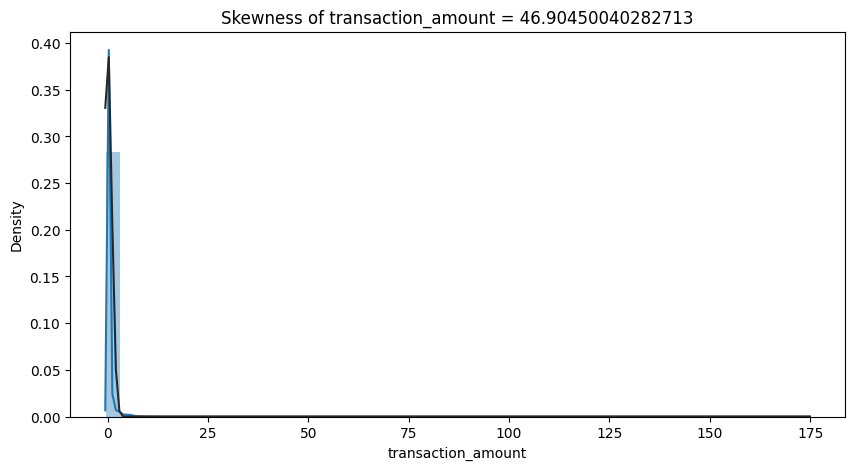

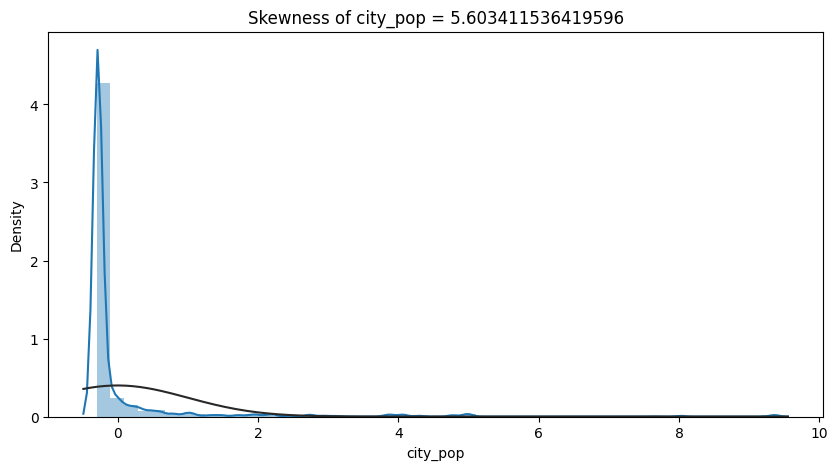

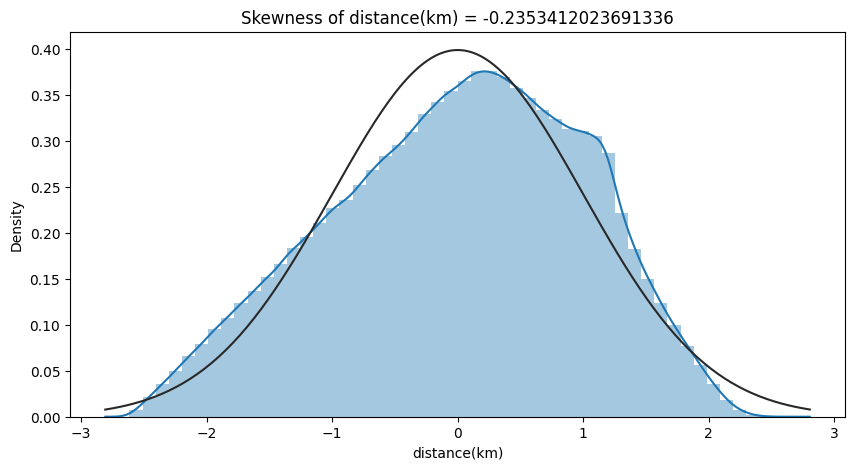

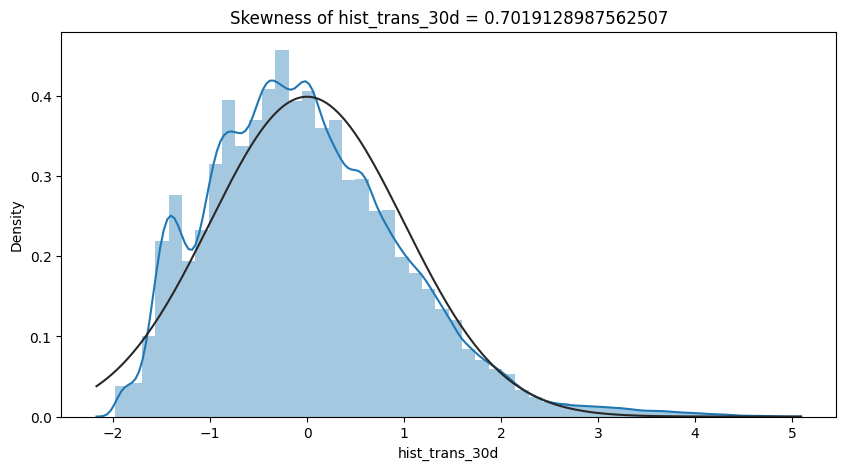

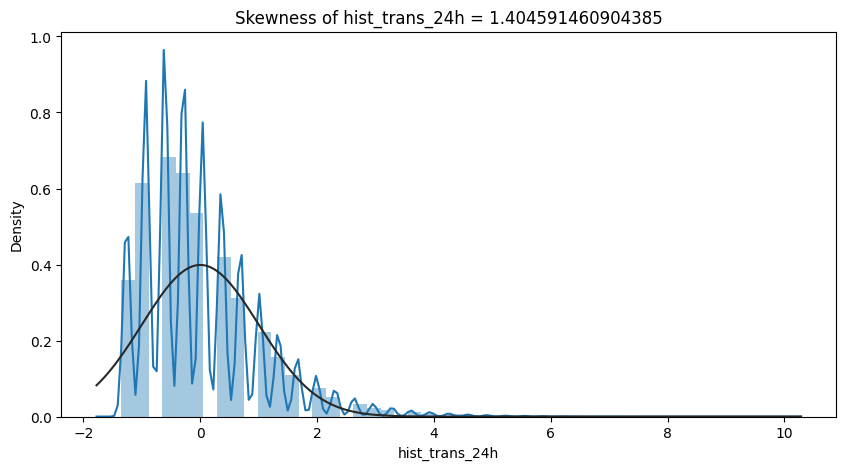

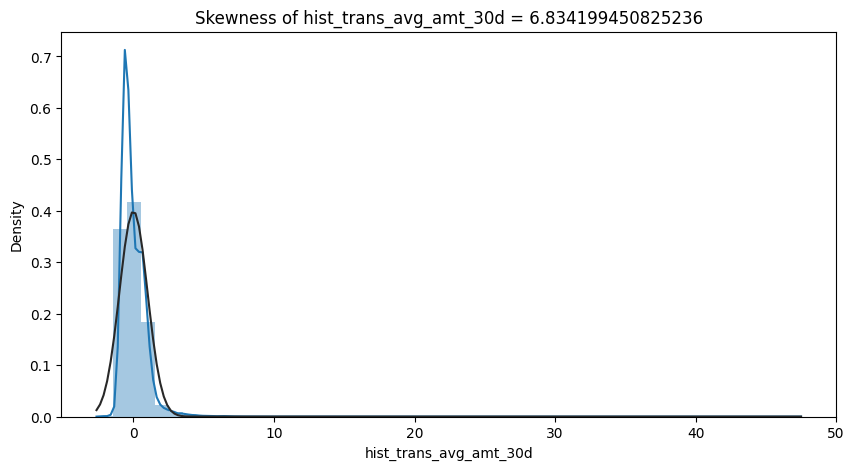

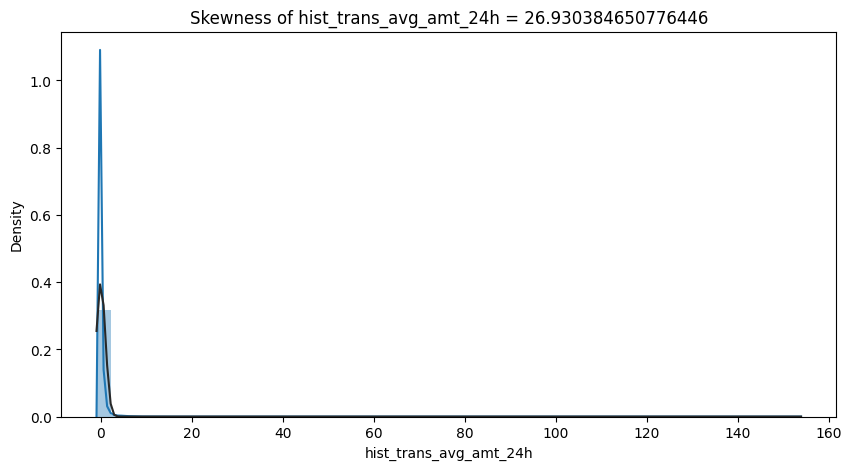

In [93]:
# Lets check the skewness of the continious features ,power transformations are not appropriate or necessary for binary variables
# Applying power transformations to binary variables would not make sense and could lead to incorrect interpretation or distortion of the data.
for i in num_var:
    plt.figure(figsize=(10,5))
    skewness = str(skew(X_train[i]))
    sns.distplot(X_train[i],fit = norm)
    plt.title(f"Skewness of {i}"+" = "+skewness)
    plt.show()

### Power Transformation

- **it is to be used to mitigate skewness of the data**

In [34]:
## Apply power transform for the train & test data whne skewness > 1 and < -1
pt = PowerTransformer(copy=False)

skewed_ftrs = ['transaction_amount','hist_trans_24h','hist_trans_avg_amt_30d','hist_trans_avg_amt_24h','city_pop']

## Applying the power transformer to train data
X_train[skewed_ftrs] = pt.fit_transform(X_train[skewed_ftrs])


## Applying the power transformer to train data
X_test[skewed_ftrs] = pt.transform(X_test[skewed_ftrs])

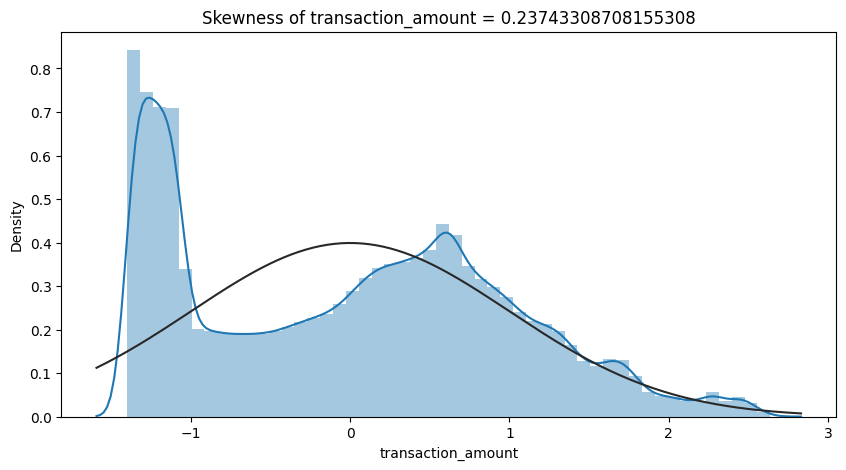

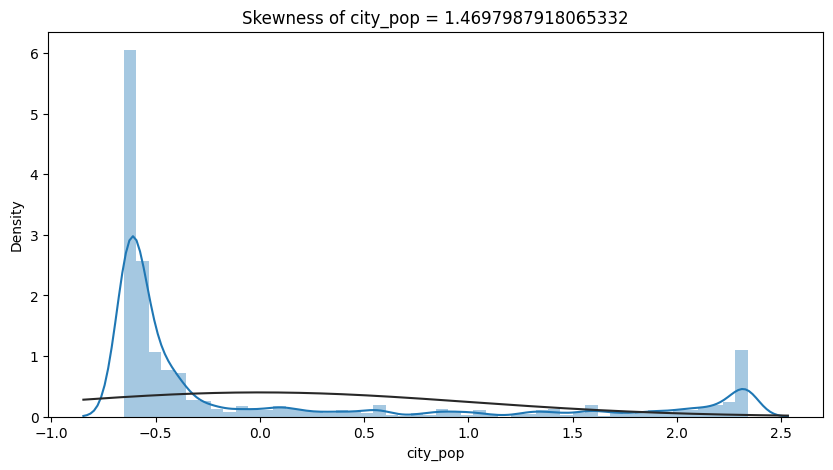

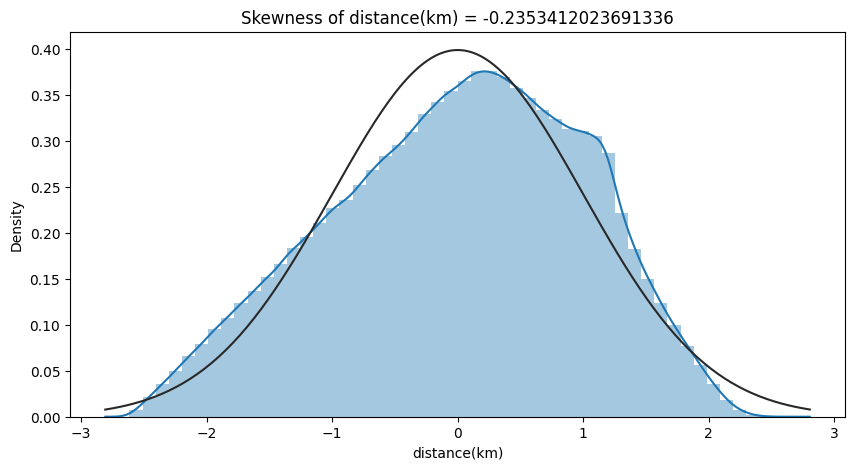

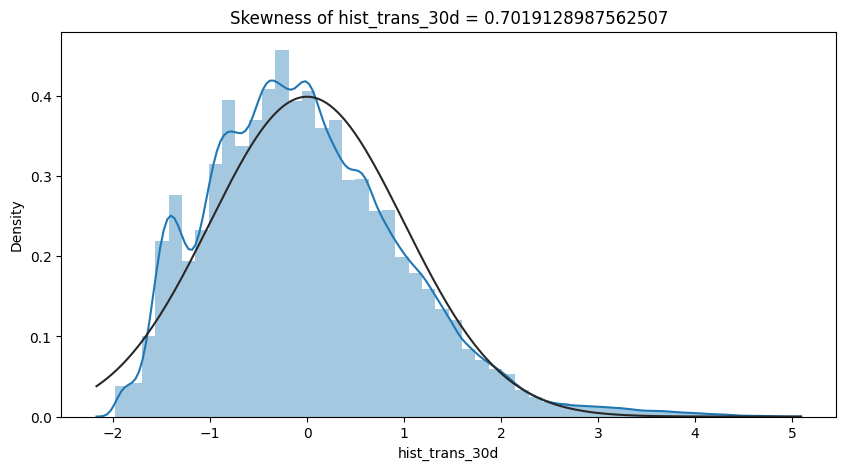

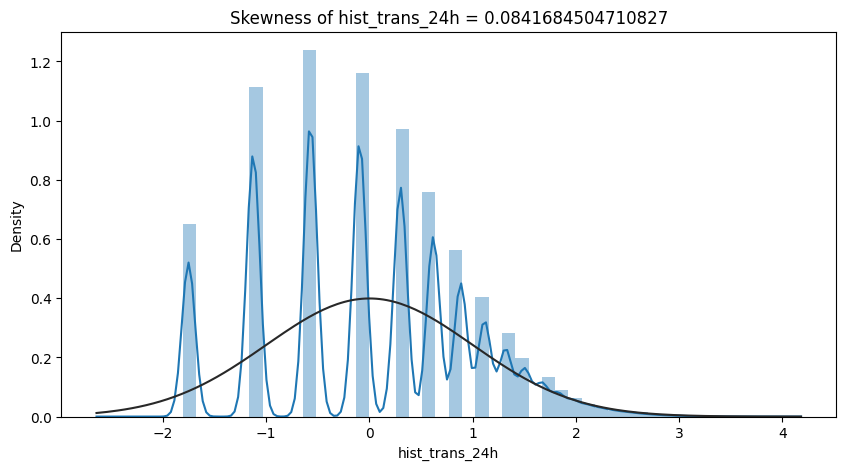

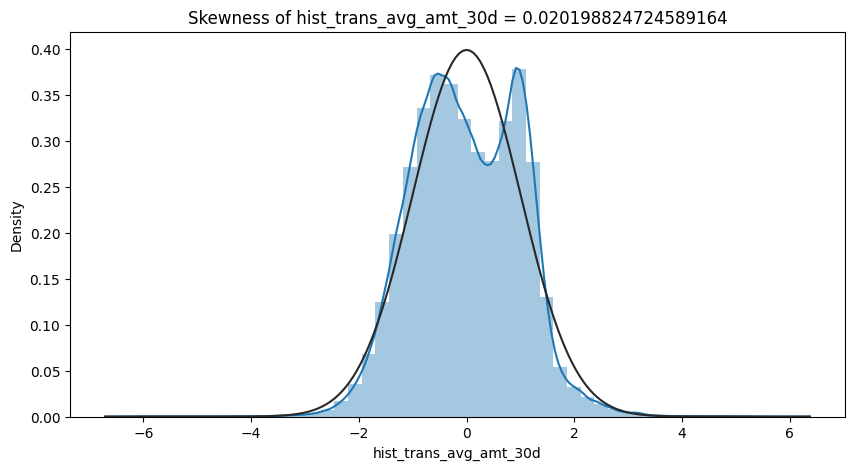

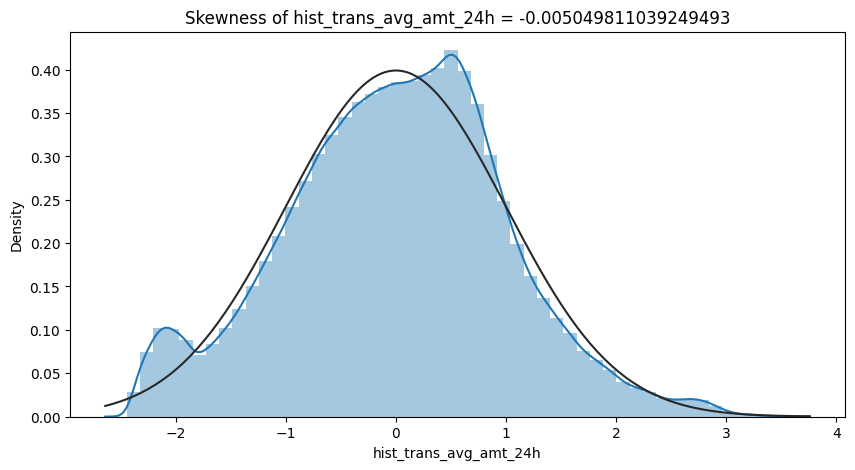

In [95]:
for i in num_var:
    plt.figure(figsize=(10,5))
    skewness = str(skew(X_train[i]))
    sns.distplot(X_train[i],fit = norm)
    plt.title(f"Skewness of {i}"+" = "+skewness)
    plt.show()

In [96]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907672 entries, 623145 to 374447
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   spending_category       907672 non-null  int64  
 1   transaction_amount      907672 non-null  float64
 2   gender                  907672 non-null  int64  
 3   city_pop                907672 non-null  float64
 4   TxnDayOfWeek            907672 non-null  int64  
 5   TxnMonth                907672 non-null  int64  
 6   time_category           907672 non-null  int64  
 7   cust_age_group          907672 non-null  int64  
 8   distance(km)            907672 non-null  float64
 9   usa_regions             907672 non-null  int64  
 10  hist_trans_30d          907672 non-null  float64
 11  hist_trans_24h          907672 non-null  float64
 12  hist_trans_avg_amt_30d  907672 non-null  float64
 13  hist_trans_avg_amt_24h  907672 non-null  float64
dtypes: float64(7), 

## **Model Building**
### **Build different models on the imbalanced dataset and see the result**

### **K-Fold validation with GridSearchCV**

- **It gives reliable and less biased performance estimation as comapred to a single train-test split**
- **This helps in selecting best hyperparameter tuning by comapring the performance of different sets of hyperparameters across multiple folds**
- **It helps in detecting overfitting, If the model consistently performs significantly worse on the validation folds compared to the training folds, it suggests that overfitting may be occurring.**

In [35]:
k_folds = StratifiedKFold(n_splits=3,shuffle=True,random_state=0)

### **Logistic Regression**

In [98]:
## specifying hyper parameters for grid search

logreg_params = {

    'penalty': ['l1','l2'],
    'C'       : [0.01, 0.1, 1, 10, 100, 1000],
    'solver':['liblinear'],
    'max_iter':[1000],

}

## create model instance
logreg = linear_model.LogisticRegression(random_state=0)

## Gridsearch for hyperparam tuning
logreg_imb_model_cv = GridSearchCV(estimator = logreg,
                        param_grid = logreg_params,
                        scoring= 'roc_auc',
                        cv = k_folds,
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True)


## model training
logreg_imb_model_cv.fit(X_train, y_train)

## Output of the evaluation result
print('Best ROC AUC score: ', logreg_imb_model_cv.best_score_)

## Output of the best hyperparametes
print('Best hyperparameters: ', logreg_imb_model_cv.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best ROC AUC score:  0.9392284768287498
Best hyperparameters:  {'C': 0.01, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}


In [99]:
## Cross Validation results
cv_results = pd.DataFrame(logreg_imb_model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        8.25921       0.16152          0.17598         0.01331 0.01000   
1        5.43801       0.76109          0.16043         0.00946 0.01000   
2       10.61873       0.55445          0.15955         0.00669 0.10000   
3        5.79627       0.19632          0.21606         0.07108 0.10000   
4       12.21874       0.68254          0.16446         0.00268       1   

  param_max_iter param_penalty param_solver  \
0           1000            l1    liblinear   
1           1000            l2    liblinear   
2           1000            l1    liblinear   
3           1000            l2    liblinear   
4           1000            l1    liblinear   

                                              params  split0_test_score  \
0  {'C': 0.01, 'max_iter': 1000, 'penalty': 'l1',...            0.94111   
1  {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2',...            0.93739   
2  {'C': 0.1, 'max_iter': 1000, 'penalty': 'l1', ...            0.94096   
3  {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', ...            0.94102   
4  {'C': 1, 'max_iter': 1000, 'penalty': 'l1', 's...            0.94095   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0            0.93870            0.93787          0.93923         0.00137   
1            0.93610            0.93367          0.93572         0.00154   
2            0.93790            0.93795          0.93894         0.00143   
3            0.93811            0.93785          0.93899         0.00144   
4            0.93778            0.93798          0.93890         0.00145   

   rank_test_score  split0_train_score  split1_train_score  \
0                1             0.93833             0.93940   
1               12             0.93496             0.93621   
2                3             0.93820             0.93960   
3                2             0.93823             0.93967   
4                5             0.93818             0.93960   

   split2_train_score  mean_train_score  std_train_score  
0             0.94010           0.93927          0.00073  
1             0.93675           0.93597          0.00075  
2             0.93989           0.93923          0.00074  
3             0.93998           0.93929          0.00076  
4             0.93986           0.93921          0.00074

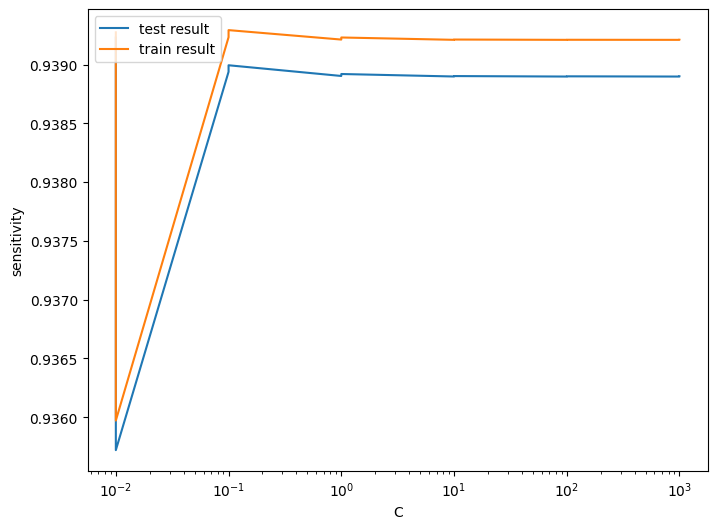

In [100]:
##Train and Validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [101]:
#accessing best parameters to pass in logistic regression classifier

print('best parameters:',list(logreg_imb_model_cv.best_params_.items()))
c_val = list(logreg_imb_model_cv.best_params_.items())[0][1]
mx_iter_val =list(logreg_imb_model_cv.best_params_.items())[1][1]
penalty_val =list(logreg_imb_model_cv.best_params_.items())[2][1]
solver_val =list(logreg_imb_model_cv.best_params_.items())[3][1]

print(c_val)
print(mx_iter_val)
print(penalty_val)
print(solver_val)

best parameters: [('C', 0.01), ('max_iter', 1000), ('penalty', 'l1'), ('solver', 'liblinear')]
0.01
1000
l1
liblinear


In [102]:
## Logistic Regression with optimal C and penalty

logreg_imb_model_bestcv =linear_model.LogisticRegression(C=c_val,max_iter=mx_iter_val,penalty=penalty_val,solver=solver_val,n_jobs=-1,random_state=0)

## Fitting the best model on train dataset
logreg_imb_model_bestcv.fit(X_train, y_train)

LogisticRegression(C=0.01, max_iter=1000, n_jobs=-1, penalty='l1',
                   random_state=0, solver='liblinear')

In [42]:
# Creating function to display ROC-AUC score, f1 score and classification report
def display_scores(y_train, y_train_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_train, y_train_pred)*100,2)}%")
    print(f"Classification Report: \n {classification_report(y_train, y_train_pred)}")

In [43]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

F1 Score: 59.69%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    902418
           1       0.92      0.44      0.60      5254

    accuracy                           1.00    907672
   macro avg       0.96      0.72      0.80    907672
weighted avg       1.00      1.00      1.00    907672

Confusion Matrix 
 [[902225    193]
 [  2937   2317]]


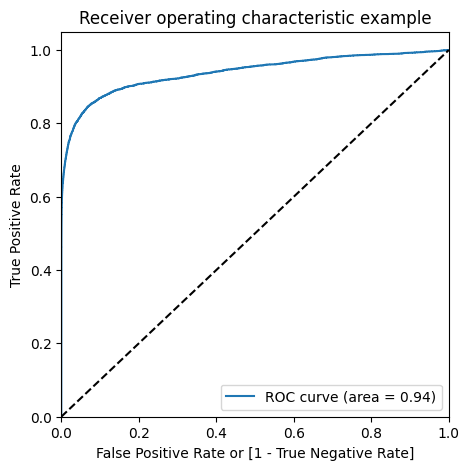

In [105]:
## Prediction on the train set
y_train_pred = logreg_imb_model_bestcv.predict(X_train)

# displaying F1 Score and classification report
display_scores(y_train, y_train_pred)

#confusion matrix
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix \n",confusion_matrix_train)

## Predicted probability
y_train_pred_proba = logreg_imb_model_bestcv.predict_proba(X_train)[:,1]

## Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

F1 Score: 60.45%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    386751
           1       0.94      0.45      0.60      2252

    accuracy                           1.00    389003
   macro avg       0.97      0.72      0.80    389003
weighted avg       1.00      1.00      1.00    389003

Confusion Matrix 
 [[386683     68]
 [  1247   1005]]


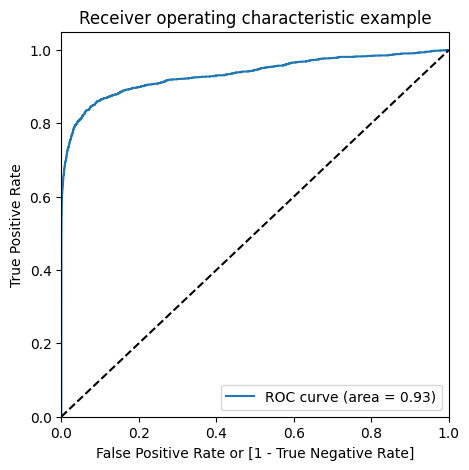

In [106]:
##Evaluating the model on the test set
y_test_pred = logreg_imb_model_bestcv.predict(X_test)

# displaying F1 Score and classification report
display_scores(y_test, y_test_pred)

#confusion matrix
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix \n",confusion_matrix_test)

# Predicted probability
y_test_pred_proba = logreg_imb_model_bestcv.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### **Model Summary**
#### **Train set**
- ROC AUC score = 94%
- Recall = 44%
- Precesion = 92%
- F1 score = 60%

#### **Test set**
- ROC AUC score = 93%
- Recall = 45%
- Precesion = 94%
- F1 score = 60%

## **Decesion Tree**

In [107]:
## specifying hyper parameters for grid search

dt_params = {
    'max_depth':[5,10,15],
    'min_samples_leaf':[50,100,150],
    'min_samples_split':[50,100,150],
}
# create model instance
dt = DecisionTreeClassifier(random_state=0)

## Gridsearch for hyperparam tuning
dt_imb_model_cv = GridSearchCV(estimator=dt,param_grid=dt_params,scoring='roc_auc',cv=k_folds,n_jobs=-1,verbose=1)

## model training
dt_imb_model_cv.fit(X_train,y_train)

# Printing the optimal score and hyperparameters
print("Best roc auc score : ", dt_imb_model_cv.best_score_)
print("Best hyperparameters: ",dt_imb_model_cv.best_estimator_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best roc auc score :  0.9864737626015
Best hyperparameters:  DecisionTreeClassifier(max_depth=10, min_samples_leaf=150, min_samples_split=50,
                       random_state=0)


In [108]:
## Cross Validation results
cv_results = pd.DataFrame(dt_imb_model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        4.34339       0.05746          0.12845         0.00389   
1        5.24801       0.61886          0.14418         0.00260   
2        4.64031       0.49586          0.18056         0.06783   
3        4.89878       0.55217          0.15131         0.02398   
4        4.67866       0.63090          0.12761         0.00205   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                     50                      50   
1               5                     50                     100   
2               5                     50                     150   
3               5                    100                      50   
4               5                    100                     100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...            0.96820   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...            0.96820   
2  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...            0.96820   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...            0.96822   
4  {'max_depth': 5, 'min_samples_leaf': 100, 'min...            0.96822   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0            0.96178            0.96215          0.96404         0.00294   
1            0.96178            0.96215          0.96404         0.00294   
2            0.96178            0.96215          0.96404         0.00294   
3            0.96189            0.96124          0.96378         0.00315   
4            0.96189            0.96124          0.96378         0.00315   

   rank_test_score  
0               19  
1               19  
2               21  
3               25  
4               25

In [109]:
#accessing best parameters to pass in decesion tree classifier

print('best parameters:',list(dt_imb_model_cv.best_params_.items()))
max_depth = list(dt_imb_model_cv.best_params_.items())[0][1]
min_samples_leaf =list(dt_imb_model_cv.best_params_.items())[1][1]
min_samples_split =list(dt_imb_model_cv.best_params_.items())[2][1]


print(max_depth)
print(min_samples_leaf)
print(min_samples_split)


best parameters: [('max_depth', 10), ('min_samples_leaf', 150), ('min_samples_split', 50)]
10
150
50


In [110]:
## Decision Tree with optimal hyperparameters

dt_imb_model_bestcv = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 0,
                                  max_depth=max_depth,
                                  min_samples_leaf=min_samples_leaf,
                                  min_samples_split=min_samples_split)

# training best model
dt_imb_model_bestcv.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=150, min_samples_split=50,
                       random_state=0)

F1 Score: 81.13%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    902418
           1       0.89      0.75      0.81      5254

    accuracy                           1.00    907672
   macro avg       0.94      0.87      0.91    907672
weighted avg       1.00      1.00      1.00    907672



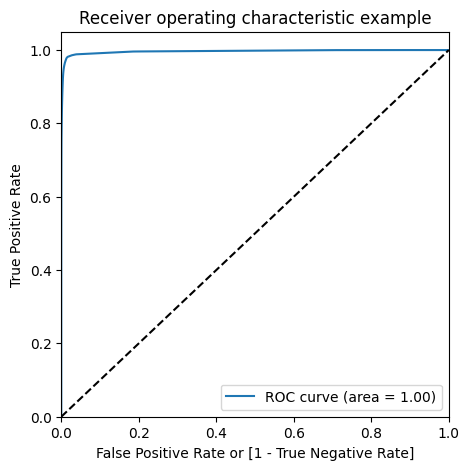

In [111]:
## Prediction on the train set
y_train_pred = dt_imb_model_bestcv.predict(X_train)

# displaying F1 Score and classification report
display_scores(y_train, y_train_pred)

# confusion matrix
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix \n",confusion_matrix_train)

# Predicted probability
y_train_pred_proba = dt_imb_model_bestcv.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

F1 Score: 80.93%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    386751
           1       0.89      0.74      0.81      2252

    accuracy                           1.00    389003
   macro avg       0.94      0.87      0.90    389003
weighted avg       1.00      1.00      1.00    389003



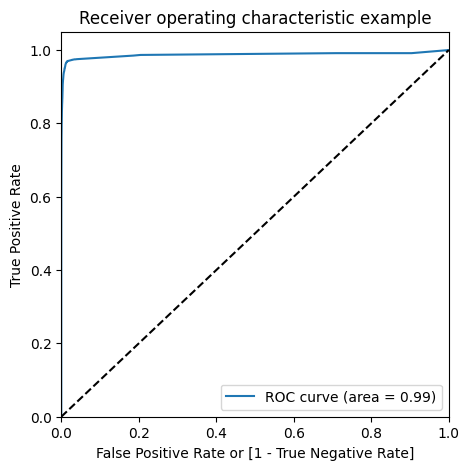

In [112]:
## Evaluating the model on the test set
y_test_pred = dt_imb_model_bestcv.predict(X_test)

# displaying F1 Score and classification report
display_scores(y_test, y_test_pred)

# confusion matrix
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix \n",confusion_matrix_test)

# Predicted probability
y_test_pred_proba = dt_imb_model_bestcv.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### **Model Summary**
#### **Train set**
- ROC AUC score = 100%
- Recall = 75%
- Precesion = 89%
- F1 score = 81%

#### **Test set**
- ROC AUC score = 99%
- Recall = 74%
- Precesion = 89%
- F1 score = 81%

## **XGBoost**

In [113]:
## specifying hyper parameters for grid search

xgboost_param = {
    'learning_rate':[0.01,0.05,0.1],
    'subsample':[0.3,0.6,0.9],
    'max_depth':[4,5,6]
}

# creating model instance
# Create an XGBClassifier object
xgb = XGBClassifier(objective='binary:logistic',
                    n_estimators=200,
                    tree_method='hist',
                    random_state=0)

# Fit the model to the training data
xgb.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = xgb.predict(X_test)

# Calculate the accuracy
accuracy = np.mean(y_pred == y_test)

print('Accuracy:', accuracy)


## Gridsearch for hyperparam tuning
xgb_imb_model_cv = GridSearchCV(estimator=xgb,
                                      param_grid=xgboost_param,
                                      scoring='roc_auc',
                                      cv=k_folds,
                                      n_jobs=-1,
                                      verbose=1,
                                      return_train_score=True)

#model training
xgb_imb_model_cv.fit(X_train, y_train)

# Printing the optimal score and hyperparameters
print("Best roc auc score : ", xgb_imb_model_cv.best_score_)
print("Best hyperparameters: ",xgb_imb_model_cv.best_estimator_)

Accuracy: 0.9991259707508683
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best roc auc score :  0.9990037014754855
Best hyperparameters:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)


In [114]:
# cross validation results
cv_results = pd.DataFrame(xgb_imb_model_cv.cv_results_)

In [115]:
#accessing best parameters to pass in xgboost classifier

print('best parameters:',list(xgb_imb_model_cv.best_params_.items()))

learning_rate = list(xgb_imb_model_cv.best_params_.items())[0][1]
max_depth =list(xgb_imb_model_cv.best_params_.items())[1][1]
subsample =list(xgb_imb_model_cv.best_params_.items())[2][1]


print(learning_rate)
print(max_depth)
print(subsample)

best parameters: [('learning_rate', 0.1), ('max_depth', 6), ('subsample', 0.9)]
0.1
6
0.9


In [116]:
# Model with optimal hyperparameter
xgb_imb_model_bestcv = XGBClassifier(learning_rate = learning_rate,max_depth=max_depth,subsample=subsample,n_jobs=-1,
                                            objective='binary:logistic',tree_method='hist',n_estimators=200,random_state=0)


xgb_imb_model_bestcv.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

F1 Score: 95.56%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    902418
           1       0.98      0.93      0.96      5254

    accuracy                           1.00    907672
   macro avg       0.99      0.96      0.98    907672
weighted avg       1.00      1.00      1.00    907672



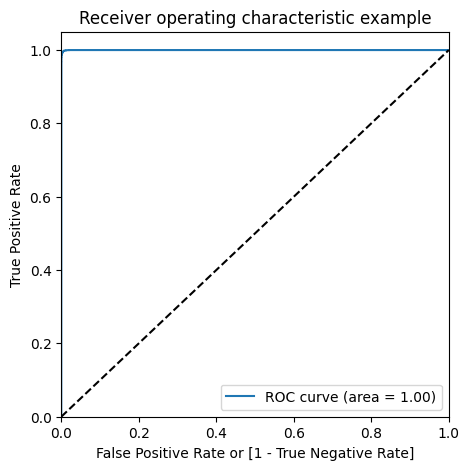

In [117]:
# Predicting on the train set
y_train_pred = xgb_imb_model_bestcv.predict(X_train)

# displaying F1 Score and classification report
display_scores(y_train, y_train_pred)

# confusion matrix
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix \n",confusion_matrix_train)

# Predicted probability
y_train_pred_proba = xgb_imb_model_bestcv.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

F1 Score: 91.11%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    386751
           1       0.95      0.87      0.91      2252

    accuracy                           1.00    389003
   macro avg       0.98      0.94      0.96    389003
weighted avg       1.00      1.00      1.00    389003



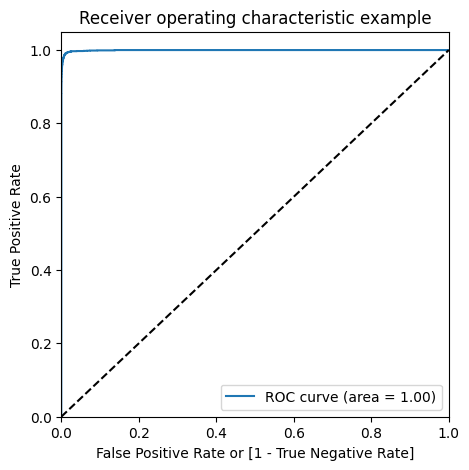

In [118]:
# model evaluation on test set
y_test_pred = xgb_imb_model_bestcv.predict(X_test)

# displaying F1 Score and classification report
display_scores(y_test, y_test_pred)

# confusion matrix
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix \n",confusion_matrix_test)

# Predicted probability
y_test_pred_proba = xgb_imb_model_bestcv.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### **Model Summary**
#### **Train set**
- ROC AUC score = 100%
- Recall = 93%
- Precesion = 98%
- F1 score = 96%

#### **Test set**
- ROC AUC score = 100%
- Recall = 87%
- Precesion = 96%
- F1 score = 91%

## **Model Building with Balance class**

**We will see follwoing three oversampling methods to balance the minority class**
- **Random Oversampling**
- **SMOTE**
- **ADASYN**

### **Random Oversampling**

In [36]:
# define oversampling strategy
random_oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_train_rndm, y_train_rndm = random_oversample.fit_resample(X_train, y_train)

In [120]:
from collections import Counter
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution
print('New class distribution:-',Counter(y_train_rndm))

Before sampling class distribution:- Counter({0: 902418, 1: 5254})
New class distribution:- Counter({0: 902418, 1: 902418})


### **Logistic Regression**

In [121]:
## specifying hyper parameters for grid search

logreg_params = {

    'penalty': ['l1','l2'],
    'C'       : [0.01, 0.1, 1, 10, 100, 1000],
    'solver':['liblinear'],
    'max_iter':[1000],

}

## create model instance
logreg = linear_model.LogisticRegression(random_state=0)


## Gridsearch for hyperparam tuning
logreg_rndm_bal_model_cv = GridSearchCV(estimator = logreg,
                        param_grid = logreg_params,
                        scoring= 'roc_auc',
                        cv = k_folds,
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True)


## model training
logreg_rndm_bal_model_cv.fit(X_train_rndm, y_train_rndm)

## Output of the evaluation result
print('Best ROC AUC score: ', logreg_rndm_bal_model_cv.best_score_)

## Output of the best hyperparametes
print('Best hyperparameters: ', logreg_rndm_bal_model_cv.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best ROC AUC score:  0.9422325008824477
Best hyperparameters:  {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}


In [122]:
# cross validation results
cv_results = pd.DataFrame(logreg_rndm_bal_model_cv.cv_results_)

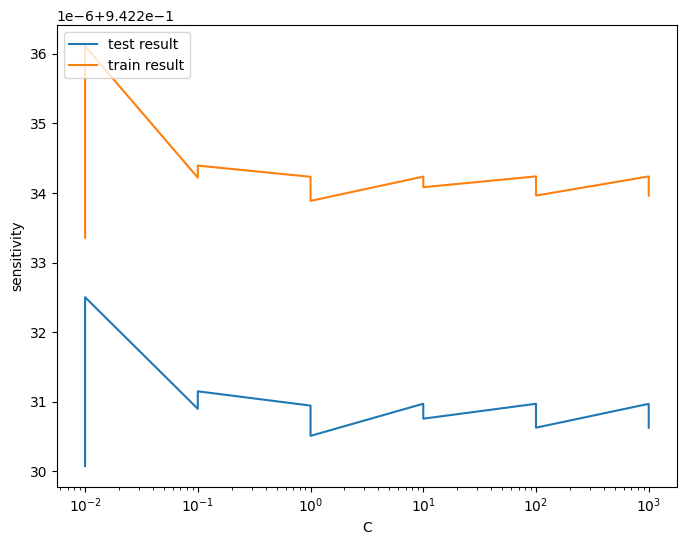

In [123]:
##Train and Validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [124]:
#accessing best parameters to pass in xgboost classifier

print('best parameters:',list(logreg_rndm_bal_model_cv.best_params_.items()))

c_val = list(logreg_rndm_bal_model_cv.best_params_.items())[0][1]
mx_iter_val =list(logreg_rndm_bal_model_cv.best_params_.items())[1][1]
penalty_val =list(logreg_rndm_bal_model_cv.best_params_.items())[2][1]
solver_val = list(logreg_rndm_bal_model_cv.best_params_.items())[3][1]


print(c_val)
print(mx_iter_val)
print(penalty_val)
print(solver_val)

best parameters: [('C', 0.01), ('max_iter', 1000), ('penalty', 'l2'), ('solver', 'liblinear')]
0.01
1000
l2
liblinear


In [125]:
## Logistic Regression with optimal C

## Instantiating the model with best C
logreg_rndm_bal_model_bestcv =linear_model.LogisticRegression(C=c_val,max_iter=mx_iter_val,penalty=penalty_val,solver=solver_val,n_jobs=-1,random_state=0)

## Fitting the model on train dataset
logreg_rndm_bal_model_bestcv.fit(X_train_rndm, y_train_rndm)

LogisticRegression(C=0.01, max_iter=1000, n_jobs=-1, random_state=0,
                   solver='liblinear')

F1 Score: 88.14%
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.90      0.89    902418
           1       0.90      0.87      0.88    902418

    accuracy                           0.88   1804836
   macro avg       0.88      0.88      0.88   1804836
weighted avg       0.88      0.88      0.88   1804836



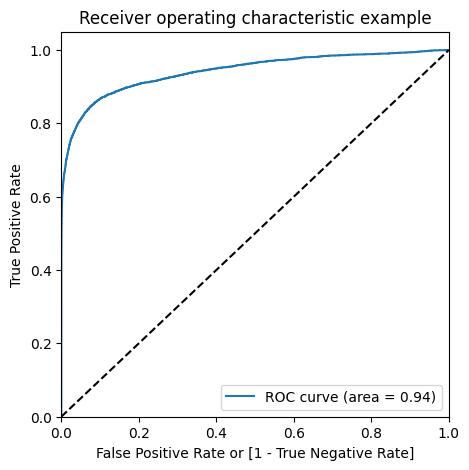

In [126]:
# # Predicting on the train set
y_train_rndm_pred = logreg_rndm_bal_model_bestcv.predict(X_train_rndm)

# displaying F1 Score and classification report
display_scores(y_train_rndm, y_train_rndm_pred)

# confusion matrix
confusion_matrix_train = confusion_matrix(y_train_rndm, y_train_rndm_pred)
print("Confusion Matrix \n",confusion_matrix_train)

## Predicted probability
y_train_rndm_pred_proba = logreg_rndm_bal_model_bestcv.predict_proba(X_train_rndm)[:,1]

## Plot the ROC curve
draw_roc(y_train_rndm, y_train_rndm_pred_proba)

F1 Score: 9.04%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.90      0.95    386751
           1       0.05      0.86      0.09      2252

    accuracy                           0.90    389003
   macro avg       0.52      0.88      0.52    389003
weighted avg       0.99      0.90      0.94    389003



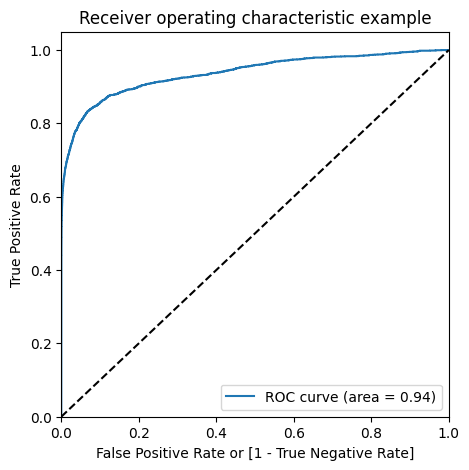

In [127]:
##Evaluating the model on the test set
y_test_rndm_pred = logreg_rndm_bal_model_bestcv.predict(X_test)

#  displaying F1 Score and classification report
display_scores(y_test, y_test_rndm_pred)

# confusion matrix
confusion_matrix_test = confusion_matrix(y_test, y_test_rndm_pred)
print("Confusion Matrix \n",confusion_matrix_test)

# Predicted probability
y_test_rndm_pred_proba = logreg_rndm_bal_model_bestcv.predict_proba(X_test)[:,1]

## Plot the ROC curve
draw_roc(y_test, y_test_rndm_pred_proba)

### **Model Summary**
#### **Train set**
- ROC AUC score = 94%
- Recall = 87%
- Precesion = 90%
- F1 score = 88%

#### **Test set**
- ROC AUC score = 94%
- Recall = 86%
- Precesion = 5%
- F1 score = 9%

### **Decesion Tree**

In [128]:
## specifying hyper parameters for grid search

dt_params = {
    'max_depth':[5,10,15],
    'min_samples_leaf':[50,100,150],
    'min_samples_split':[50,100,150],
}

# create model instance
dt = DecisionTreeClassifier(random_state=0)

dt_rndm_bal_model_cv = GridSearchCV(estimator=dt,param_grid=dt_params,scoring='roc_auc',cv=k_folds,n_jobs=-1,verbose=1)

## model training
dt_rndm_bal_model_cv.fit(X_train_rndm,y_train_rndm)

# Printing the optimal score and hyperparameters
print("Best roc auc score : ", dt_rndm_bal_model_cv.best_score_)
print("Best hyperparameters: ",dt_rndm_bal_model_cv.best_estimator_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best roc auc score :  0.9995222847050852
Best hyperparameters:  DecisionTreeClassifier(max_depth=15, min_samples_leaf=50, min_samples_split=150,
                       random_state=0)


In [129]:
## Cross Validation results
cv_results = pd.DataFrame(dt_rndm_bal_model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        7.43818       0.23274          0.48764         0.13942   
1        7.84786       0.52697          0.30270         0.02171   
2        7.12683       0.67991          0.29259         0.01781   
3        7.67619       0.56773          0.47208         0.12863   
4        7.50785       0.53404          0.27689         0.00109   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                     50                      50   
1               5                     50                     100   
2               5                     50                     150   
3               5                    100                      50   
4               5                    100                     100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...            0.99379   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...            0.99379   
2  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...            0.99379   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...            0.99374   
4  {'max_depth': 5, 'min_samples_leaf': 100, 'min...            0.99374   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0            0.99350            0.99385          0.99371         0.00015   
1            0.99350            0.99385          0.99371         0.00015   
2            0.99350            0.99385          0.99371         0.00015   
3            0.99346            0.99381          0.99367         0.00015   
4            0.99346            0.99381          0.99367         0.00015   

   rank_test_score  
0               19  
1               19  
2               19  
3               22  
4               22

In [130]:
#accessing best parameters to pass in decesion tree classifier

print('best parameters:',list(dt_rndm_bal_model_cv.best_params_.items()))
max_depth = list(dt_rndm_bal_model_cv.best_params_.items())[0][1]
min_samples_leaf =list(dt_rndm_bal_model_cv.best_params_.items())[1][1]
min_samples_split =list(dt_rndm_bal_model_cv.best_params_.items())[2][1]


print(max_depth)
print(min_samples_leaf)
print(min_samples_split)

best parameters: [('max_depth', 15), ('min_samples_leaf', 50), ('min_samples_split', 150)]
15
50
150


In [131]:
## Decision Tree with optimal hyperparameters

dt_rndm_bal_model_bestcv = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 0,
                                  max_depth=max_depth,
                                  min_samples_leaf=min_samples_leaf,
                                  min_samples_split=min_samples_split)

dt_rndm_bal_model_bestcv.fit(X_train_rndm, y_train_rndm)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=50, min_samples_split=150,
                       random_state=0)

F1 Score: 99.61%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    902418
           1       0.99      1.00      1.00    902418

    accuracy                           1.00   1804836
   macro avg       1.00      1.00      1.00   1804836
weighted avg       1.00      1.00      1.00   1804836



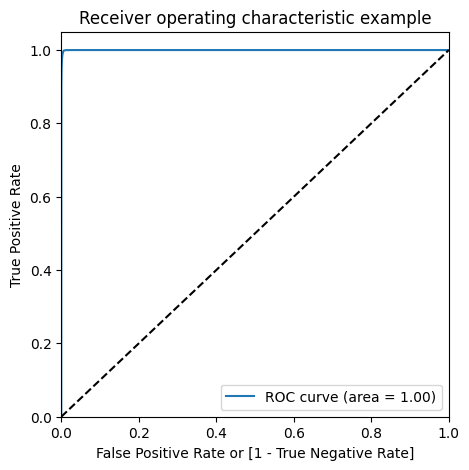

In [132]:
## Prediction on the train set
y_train_rndm_pred = dt_rndm_bal_model_bestcv.predict(X_train_rndm)

# displaying F1 Score and classification report
display_scores(y_train_rndm, y_train_rndm_pred)

# confusion matrix
confusion_matrix_train = confusion_matrix(y_train_rndm, y_train_rndm_pred)
print("Confusion Matrix \n",confusion_matrix_train)

# Predicted probability
y_train_rndm_pred_proba = dt_rndm_bal_model_bestcv.predict_proba(X_train_rndm)[:,1]

# Plot the ROC curve
draw_roc(y_train_rndm, y_train_rndm_pred_proba)

F1 Score: 62.62%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    386751
           1       0.47      0.96      0.63      2252

    accuracy                           0.99    389003
   macro avg       0.73      0.98      0.81    389003
weighted avg       1.00      0.99      0.99    389003



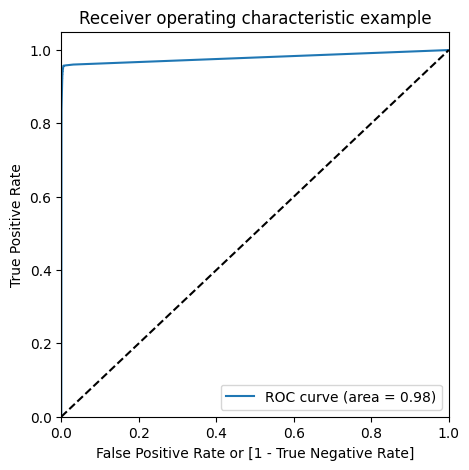

In [133]:
## Evaluating the model on the test set
y_test_rndm_pred = dt_rndm_bal_model_bestcv.predict(X_test)

# displaying F1 Score and classification report
display_scores(y_test, y_test_rndm_pred)

# confusion matrix
confusion_matrix_test = confusion_matrix(y_test, y_test_rndm_pred)
print("Confusion Matrix \n",confusion_matrix_test)

# Predicted probability
y_test_rndm_pred_proba = dt_rndm_bal_model_bestcv.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_rndm_pred_proba)

### **Model Summary**
#### **Train set**
- ROC AUC score = 100%
- Recall = 100%
- Precesion = 99%
- F1 score = 100%

#### **Test set**
- ROC AUC score = 98%
- Recall = 96%
- Precesion = 48%
- F1 score = 64%

## **XGBoost**

In [37]:
## specifying hyper parameters for grid search
xgboost_param = {
    'learning_rate':[0.01,0.05,0.1],
    'subsample':[0.3,0.6,0.9],
    'max_depth':[4,5,6]
}

# creating model instance
xgb = XGBClassifier(objective='binary:logistic',n_estimators=200,tree_method='hist',random_state=0)

## Gridsearch for hyperparam tuning
xgb_rndm_bal_model_cv = GridSearchCV(estimator=xgb,
                                      param_grid=xgboost_param,
                                      scoring='roc_auc',
                                      cv=k_folds,
                                      n_jobs=-1,
                                      verbose=1,
                                      return_train_score=True)

#model training
xgb_rndm_bal_model_cv.fit(X_train_rndm, y_train_rndm)


# Printing the optimal score and hyperparameters
print("Best roc auc score : ", xgb_rndm_bal_model_cv.best_score_)
print('Best hyperparameters: ',xgb_rndm_bal_model_cv.best_estimator_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best roc auc score :  0.999948029995803
Best hyperparameters:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)


In [38]:
# cross validation results
cv_results = pd.DataFrame(xgb_rndm_bal_model_cv.cv_results_)

In [39]:
#accessing best parameters to pass in xgboost classifier

print('best parameters:',list(xgb_rndm_bal_model_cv.best_params_.items()))

learning_rate = list(xgb_rndm_bal_model_cv.best_params_.items())[0][1]
max_depth =list(xgb_rndm_bal_model_cv.best_params_.items())[1][1]
subsample =list(xgb_rndm_bal_model_cv.best_params_.items())[2][1]


print(learning_rate)
print(max_depth)
print(subsample)

best parameters: [('learning_rate', 0.1), ('max_depth', 6), ('subsample', 0.6)]
0.1
6
0.6


In [40]:
# Model with optimal hyperparameter

xgb_rndm_bal_model_bestcv = XGBClassifier(learning_rate = learning_rate,max_depth=max_depth,subsample=subsample,n_jobs=-1,
                                            objective='binary:logistic',tree_method='hist',n_estimators=200,random_state=0)


xgb_rndm_bal_model_bestcv.fit(X_train_rndm, y_train_rndm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

F1 Score: 99.87%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    902418
           1       1.00      1.00      1.00    902418

    accuracy                           1.00   1804836
   macro avg       1.00      1.00      1.00   1804836
weighted avg       1.00      1.00      1.00   1804836

Confusion Matrix 
 [[900088   2330]
 [     0 902418]]


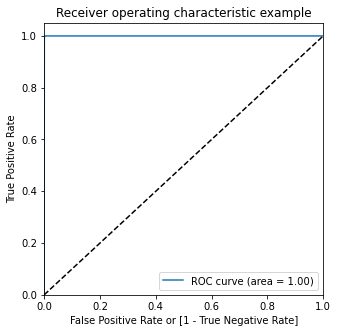

In [44]:
# Predicting on the train set
y_train_rndm_pred = xgb_rndm_bal_model_bestcv.predict(X_train_rndm)

# displaying F1 Score and classification report
display_scores(y_train_rndm, y_train_rndm_pred)

# confusion matrix
confusion_matrix_train = confusion_matrix(y_train_rndm, y_train_rndm_pred)
print("Confusion Matrix \n",confusion_matrix_train)

# Predicted probability
y_train_rndm_pred_proba = xgb_rndm_bal_model_bestcv.predict_proba(X_train_rndm)[:,1]

# Plot the ROC curve
draw_roc(y_train_rndm, y_train_rndm_pred_proba)

F1 Score: 78.58%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    386751
           1       0.66      0.97      0.79      2252

    accuracy                           1.00    389003
   macro avg       0.83      0.98      0.89    389003
weighted avg       1.00      1.00      1.00    389003

Confusion Matrix 
 [[385636   1115]
 [    73   2179]]


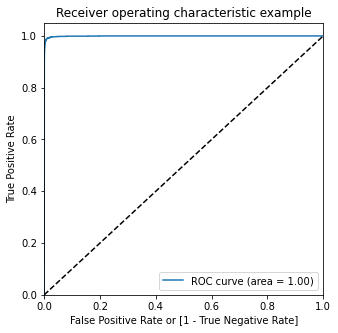

In [45]:
# model evaluation on test set
y_test_rndm_pred = xgb_rndm_bal_model_bestcv.predict(X_test)

#  displaying F1 Score and classification report
display_scores(y_test, y_test_rndm_pred)

# confusion matrix
confusion_matrix_test = confusion_matrix(y_test, y_test_rndm_pred)
print("Confusion Matrix \n",confusion_matrix_test)

# Predicted probability
y_test_rndm_pred_proba = xgb_rndm_bal_model_bestcv.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_rndm_pred_proba)

### **Model Summary**
#### **Train set**
- ROC AUC score = 100%
- Recall = 100%
- Precesion = 100%
- F1 score = 100%

#### **Test set**
- ROC AUC score = 100%
- Recall = 97%
- Precesion = 66%
- F1 score = 79%

## **SMOTE**

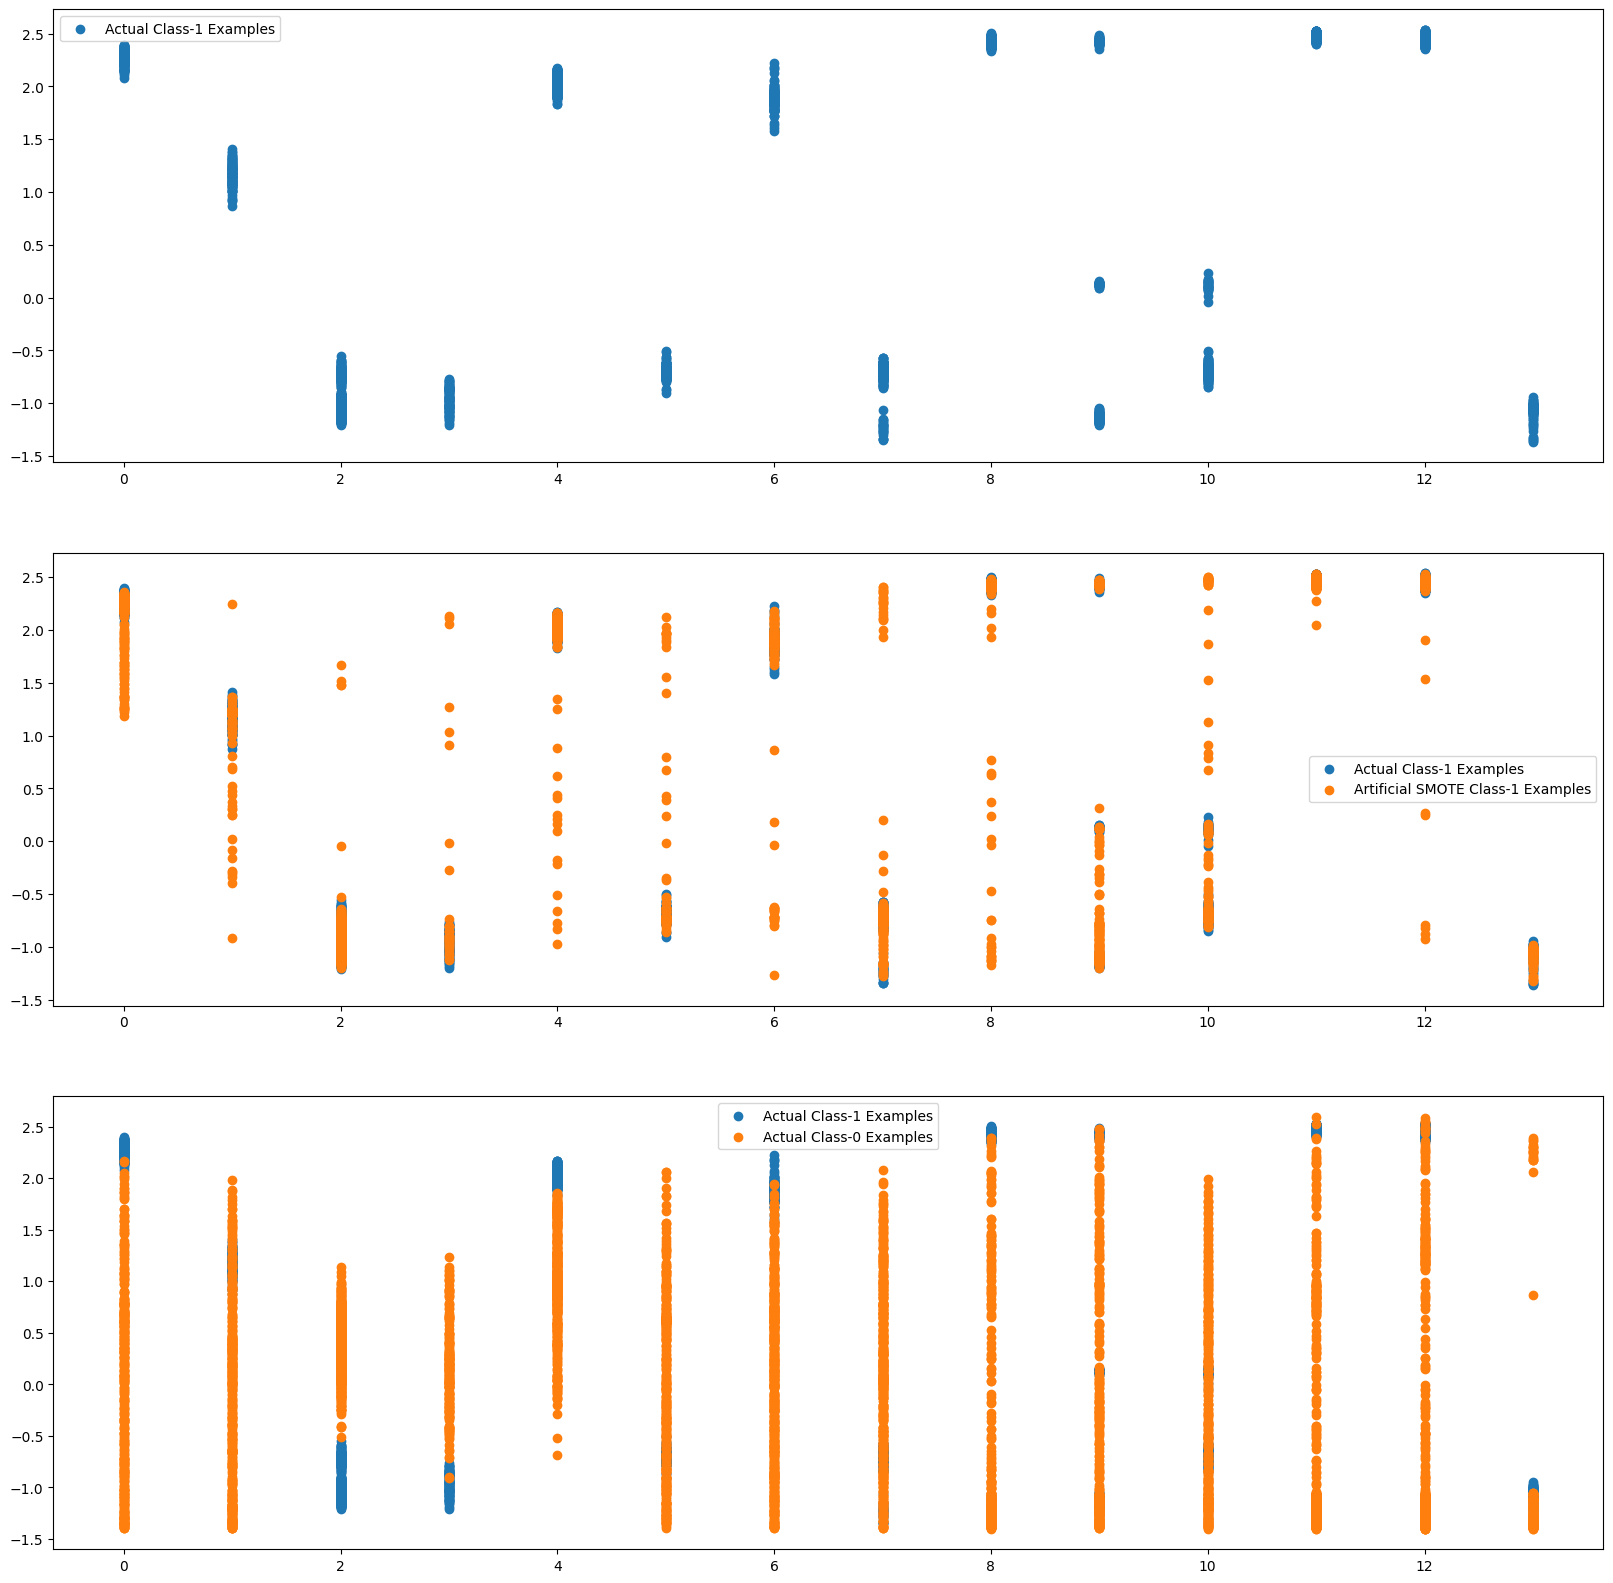

In [140]:
sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### **Logistic Regression**

In [141]:
## specifying hyper parameters for grid search

logreg_params = {

    'penalty': ['l1','l2'],
    'C'       : [0.01, 0.1, 1, 10, 100, 1000],
    'solver':['liblinear'],
    'max_iter':[1000],

}

## create model instance
logreg = linear_model.LogisticRegression(random_state=0)

## Gridsearch for hyperparam tuning
logreg_smote_bal_model_cv = GridSearchCV(estimator = logreg,
                        param_grid = logreg_params,
                        scoring= 'roc_auc',
                        cv = k_folds,
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True)


## model training
logreg_smote_bal_model_cv.fit(X_train_smote, y_train_smote)

## Output of the evaluation result
print('Best ROC AUC score: ', logreg_smote_bal_model_cv.best_score_)

## Output of the best hyperparametes
print('Best hyperparameters: ', logreg_smote_bal_model_cv.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best ROC AUC score:  0.9531353423821413
Best hyperparameters:  {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}


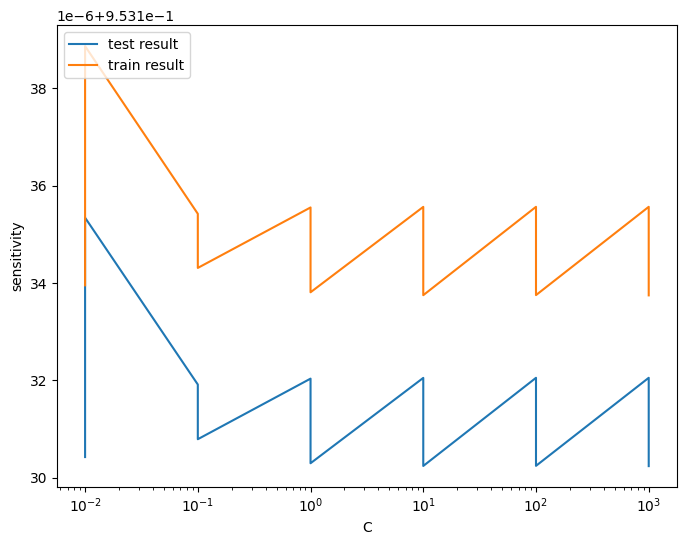

In [142]:
#cross validation results
cv_results = pd.DataFrame(logreg_smote_bal_model_cv.cv_results_)

##Train and Validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [143]:
#accessing best parameters to pass in xgboost classifier

print('best parameters:',list(logreg_smote_bal_model_cv.best_params_.items()))

c_val = list(logreg_smote_bal_model_cv.best_params_.items())[0][1]
mx_iter_val =list(logreg_smote_bal_model_cv.best_params_.items())[1][1]
penalty_val =list(logreg_smote_bal_model_cv.best_params_.items())[2][1]
solver_val = list(logreg_smote_bal_model_cv.best_params_.items())[3][1]


print(c_val)
print(mx_iter_val)
print(penalty_val)
print(solver_val)

best parameters: [('C', 0.01), ('max_iter', 1000), ('penalty', 'l2'), ('solver', 'liblinear')]
0.01
1000
l2
liblinear


In [144]:
## Logistic Regression with optimal C

## Instantiating the model with best C
logreg_smote_bal_model_bestcv =linear_model.LogisticRegression(C=c_val,max_iter=mx_iter_val,penalty=penalty_val,solver=solver_val,n_jobs=-1,random_state=0)

## Fitting the model on train dataset
logreg_smote_bal_model_bestcv.fit(X_train_smote, y_train_smote)

LogisticRegression(C=0.01, max_iter=1000, n_jobs=-1, random_state=0,
                   solver='liblinear')

F1 Score: 89.28%
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.91      0.90    902418
           1       0.91      0.88      0.89    902418

    accuracy                           0.89   1804836
   macro avg       0.89      0.89      0.89   1804836
weighted avg       0.89      0.89      0.89   1804836



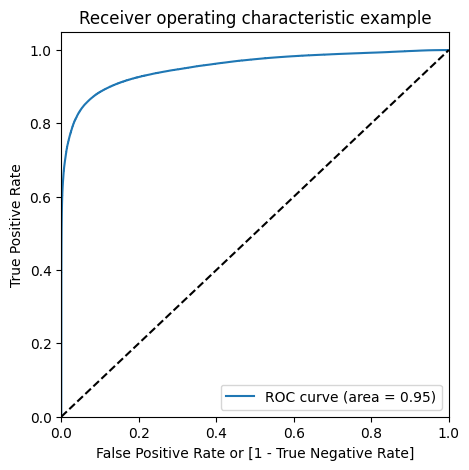

In [145]:
# Predicting on the train set
y_train_smote_pred = logreg_smote_bal_model_bestcv.predict(X_train_smote)

# displaying F1 Score and classification report
display_scores(y_train_smote, y_train_smote_pred)

# confusion matrix
confusion_matrix_train = confusion_matrix(y_train_smote, y_train_smote_pred)
print("Confusion Matrix \n",confusion_matrix_train)

## Predicted probability
y_train_smote_pred_proba = logreg_smote_bal_model_bestcv.predict_proba(X_train_smote)[:,1]

## Plot the ROC curve
draw_roc(y_train_smote, y_train_smote_pred_proba)

F1 Score: 9.62%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.91      0.95    386751
           1       0.05      0.84      0.10      2252

    accuracy                           0.91    389003
   macro avg       0.53      0.88      0.52    389003
weighted avg       0.99      0.91      0.95    389003



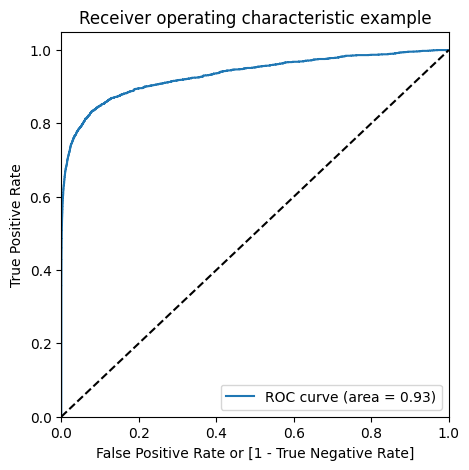

In [146]:
##Evaluating the model on the test set
y_test_smote_pred = logreg_smote_bal_model_bestcv.predict(X_test)

#  displaying F1 Score and classification report
display_scores(y_test, y_test_smote_pred)

# confusion matrix
confusion_matrix_test = confusion_matrix(y_test, y_test_smote_pred)
print("Confusion Matrix \n",confusion_matrix_test)

# Predicted probability
y_test_smote_pred_proba = logreg_smote_bal_model_bestcv.predict_proba(X_test)[:,1]

## Plot the ROC curve
draw_roc(y_test, y_test_smote_pred_proba)

### **Model Summary**
#### **Train set**
- ROC AUC score = 95%
- Recall = 88%
- Precesion = 91%
- F1 score = 89%

#### **Test set**
- ROC AUC score = 93%
- Recall = 84%
- Precesion = 5%
- F1 score = 10%

### **Decesion Tree**

In [147]:
## specifying hyper parameters for grid search

dt_params = {
    'max_depth':[5,10,15],
    'min_samples_leaf':[50,100,150],
    'min_samples_split':[50,100,150],
}
# create model instance
dt = DecisionTreeClassifier(random_state=0)

## Gridsearch for hyperparam tuning
dt_smote_bal_model_cv = GridSearchCV(estimator=dt,param_grid=dt_params,scoring='roc_auc',cv=k_folds,n_jobs=-1,verbose=1)

## model training
dt_smote_bal_model_cv.fit(X_train_smote,y_train_smote)

# Printing the optimal score and hyperparameters
print("Best roc auc score : ", dt_smote_bal_model_cv.best_score_)
print('Best hyperparameters: ',dt_smote_bal_model_cv.best_estimator_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best roc auc score :  0.9989964499656171
Best hyperparameters:  DecisionTreeClassifier(max_depth=15, min_samples_leaf=100, min_samples_split=50,
                       random_state=0)


In [148]:
## Cross Validation results
cv_results = pd.DataFrame(dt_smote_bal_model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       11.73455       0.07481          0.28919         0.00579   
1       11.73512       0.03891          0.30416         0.01942   
2       11.82651       0.10442          0.29664         0.01982   
3       11.82592       0.12442          0.29813         0.02081   
4       11.58180       0.32066          0.36712         0.13972   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                     50                      50   
1               5                     50                     100   
2               5                     50                     150   
3               5                    100                      50   
4               5                    100                     100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...            0.99203   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...            0.99203   
2  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...            0.99203   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...            0.99197   
4  {'max_depth': 5, 'min_samples_leaf': 100, 'min...            0.99197   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0            0.99166            0.99173          0.99181         0.00016   
1            0.99166            0.99173          0.99181         0.00016   
2            0.99166            0.99173          0.99181         0.00016   
3            0.99161            0.99169          0.99176         0.00015   
4            0.99161            0.99169          0.99176         0.00015   

   rank_test_score  
0               19  
1               19  
2               19  
3               25  
4               25

In [149]:
#accessing best parameters to pass in decesion tree classifier

print('best parameters:',list(dt_smote_bal_model_cv.best_params_.items()))
max_depth = list(dt_smote_bal_model_cv.best_params_.items())[0][1]
min_samples_leaf =list(dt_smote_bal_model_cv.best_params_.items())[1][1]
min_samples_split =list(dt_smote_bal_model_cv.best_params_.items())[2][1]


print(max_depth)
print(min_samples_leaf)
print(min_samples_split)

best parameters: [('max_depth', 15), ('min_samples_leaf', 100), ('min_samples_split', 50)]
15
100
50


In [150]:
## Decision Tree with optimal hyperparameters

dt_smote_bal_model_bestcv = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 0,
                                  max_depth=max_depth,
                                  min_samples_leaf=min_samples_leaf,
                                  min_samples_split=min_samples_split)

dt_smote_bal_model_bestcv.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=100, min_samples_split=50,
                       random_state=0)

F1 Score: 98.9%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    902418
           1       0.99      0.99      0.99    902418

    accuracy                           0.99   1804836
   macro avg       0.99      0.99      0.99   1804836
weighted avg       0.99      0.99      0.99   1804836



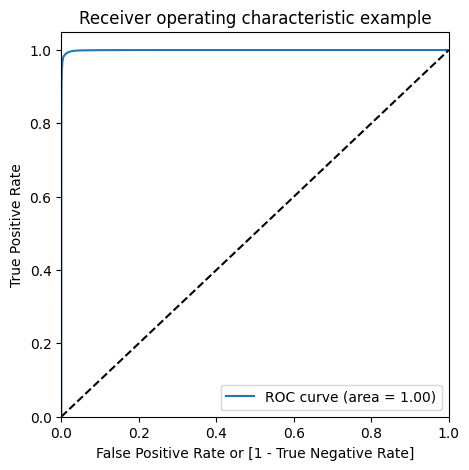

In [151]:
## Prediction on the train set
y_train_smote_pred = dt_smote_bal_model_bestcv.predict(X_train_smote)

# displaying F1 Score and classification report
display_scores(y_train_smote, y_train_smote_pred)

# confusion matrix
confusion_matrix_train = confusion_matrix(y_train_smote, y_train_smote_pred)
print("Confusion Matrix \n",confusion_matrix_train)

# Predicted probability
y_train_smote_pred_proba = dt_smote_bal_model_bestcv.predict_proba(X_train_smote)[:,1]

# Plot the ROC curve
draw_roc(y_train_smote, y_train_smote_pred_proba)

F1 Score: 48.42%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    386751
           1       0.32      0.96      0.48      2252

    accuracy                           0.99    389003
   macro avg       0.66      0.97      0.74    389003
weighted avg       1.00      0.99      0.99    389003



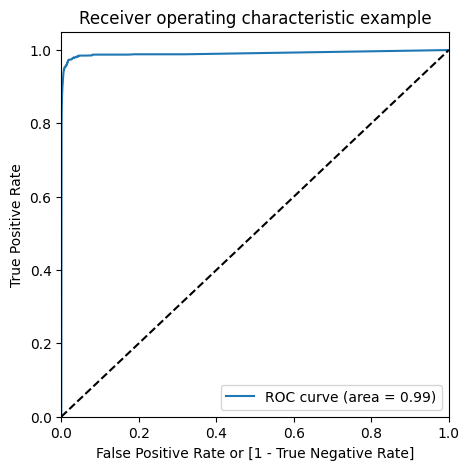

In [152]:
## Evaluating the model on the test set
y_test_smote_pred = dt_smote_bal_model_bestcv.predict(X_test)

#  displaying F1 Score and classification report
display_scores(y_test, y_test_smote_pred)

# confusion matrix
confusion_matrix_test = confusion_matrix(y_test, y_test_smote_pred)
print("Confusion Matrix \n",confusion_matrix_test)

# Predicted probability
y_test_smote_pred_proba = dt_smote_bal_model_bestcv.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_smote_pred_proba)

### **Model Summary**
#### **Train set**
- ROC AUC score = 100%
- Recall = 99%
- Precesion = 99%
- F1 score = 99%

#### **Test set**
- ROC AUC score = 99%
- Recall = 96%
- Precesion = 32%
- F1 score = 48%

## **XGBoost**

In [153]:
## specifying hyper parameters for grid search

xgboost_param = {
    'learning_rate':[0.01,0.05,0.1],
    'subsample':[0.3,0.6,0.9],
    'max_depth':[4,5,6]
}

# creating model instance
xgb = XGBClassifier(objective='binary:logistic',n_estimators=200,tree_method='hist',random_state=0)

## Gridsearch for hyperparam tuning
xgb_smote_bal_model_cv = GridSearchCV(estimator=xgb,
                                      param_grid=xgboost_param,
                                      scoring='roc_auc',
                                      cv=k_folds,
                                      n_jobs=-1,
                                      verbose=1,
                                      return_train_score=True)

#model training
xgb_smote_bal_model_cv.fit(X_train_smote, y_train_smote)


# Printing the optimal score and hyperparameters
print("Best roc auc score : ", xgb_smote_bal_model_cv.best_score_)
print('Best hyperparameters: ',xgb_smote_bal_model_cv.best_estimator_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best roc auc score :  0.9999562452469251
Best hyperparameters:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)


In [154]:
# cross validation results
cv_results = pd.DataFrame(xgb_smote_bal_model_cv.cv_results_)

In [155]:
#accessing best parameters to pass in xgboost classifier

print('best parameters:',list(xgb_smote_bal_model_cv.best_params_.items()))

learning_rate = list(xgb_smote_bal_model_cv.best_params_.items())[0][1]
max_depth =list(xgb_smote_bal_model_cv.best_params_.items())[1][1]
subsample =list(xgb_smote_bal_model_cv.best_params_.items())[2][1]


print(learning_rate)
print(max_depth)
print(subsample)

best parameters: [('learning_rate', 0.1), ('max_depth', 6), ('subsample', 0.9)]
0.1
6
0.9


In [156]:
# Model with optimal hyperparameter
xgb_smote_bal_model_bestcv = XGBClassifier(learning_rate = learning_rate,max_depth=max_depth,subsample=subsample,n_jobs=-1,random_state=0,
                                            objective='binary:logistic',n_estimators=200,tree_method='hist')


xgb_smote_bal_model_bestcv.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

F1 Score: 99.77%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    902418
           1       1.00      1.00      1.00    902418

    accuracy                           1.00   1804836
   macro avg       1.00      1.00      1.00   1804836
weighted avg       1.00      1.00      1.00   1804836

Confusion Matrix 
 [[900110   2308]
 [  1785 900633]]


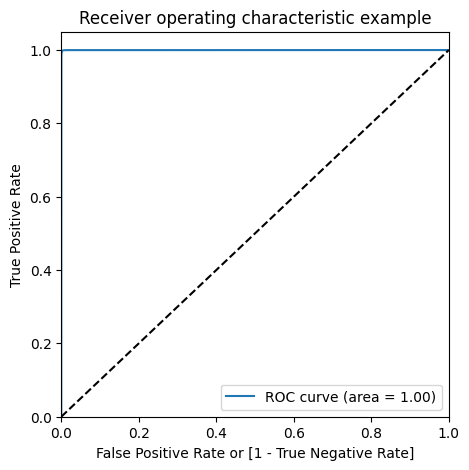

In [157]:
# Predicting on the train set
y_train_smote_pred = xgb_smote_bal_model_bestcv.predict(X_train_smote)

#  displaying F1 Score and classification report
display_scores(y_train_smote, y_train_smote_pred)

# confusion matrix
confusion_matrix_train = confusion_matrix(y_train_smote, y_train_smote_pred)
print("Confusion Matrix \n",confusion_matrix_train)

# Predicted probability
y_train_smote_pred_proba = xgb_smote_bal_model_bestcv.predict_proba(X_train_smote)[:,1]

# Plot the ROC curve
draw_roc(y_train_smote, y_train_smote_pred_proba)

F1 Score: 76.99%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    386751
           1       0.65      0.94      0.77      2252

    accuracy                           1.00    389003
   macro avg       0.83      0.97      0.88    389003
weighted avg       1.00      1.00      1.00    389003

Confusion Matrix 
 [[385627   1124]
 [   139   2113]]


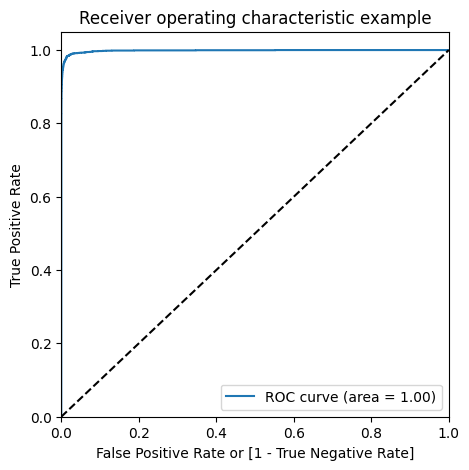

In [158]:
# model evaluation on test set
y_test_smote_pred = xgb_smote_bal_model_bestcv.predict(X_test)

# displaying F1 Score and classification report
display_scores(y_test, y_test_smote_pred)

#confusion matrix
confusion_matrix_test = confusion_matrix(y_test, y_test_smote_pred)
print("Confusion Matrix \n",confusion_matrix_test)

# Predicted probability
y_test_smote_pred_proba = xgb_smote_bal_model_bestcv.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_smote_pred_proba)

### **Model Summary**
#### **Train set**
- ROC AUC score = 100%
- Recall = 100%
- Precesion = 100%
- F1 score = 100%

#### **Test set**
- ROC AUC score = 100%
- Recall = 94%
- Precesion = 64%
- F1 score = 76%

## **ADASYN**

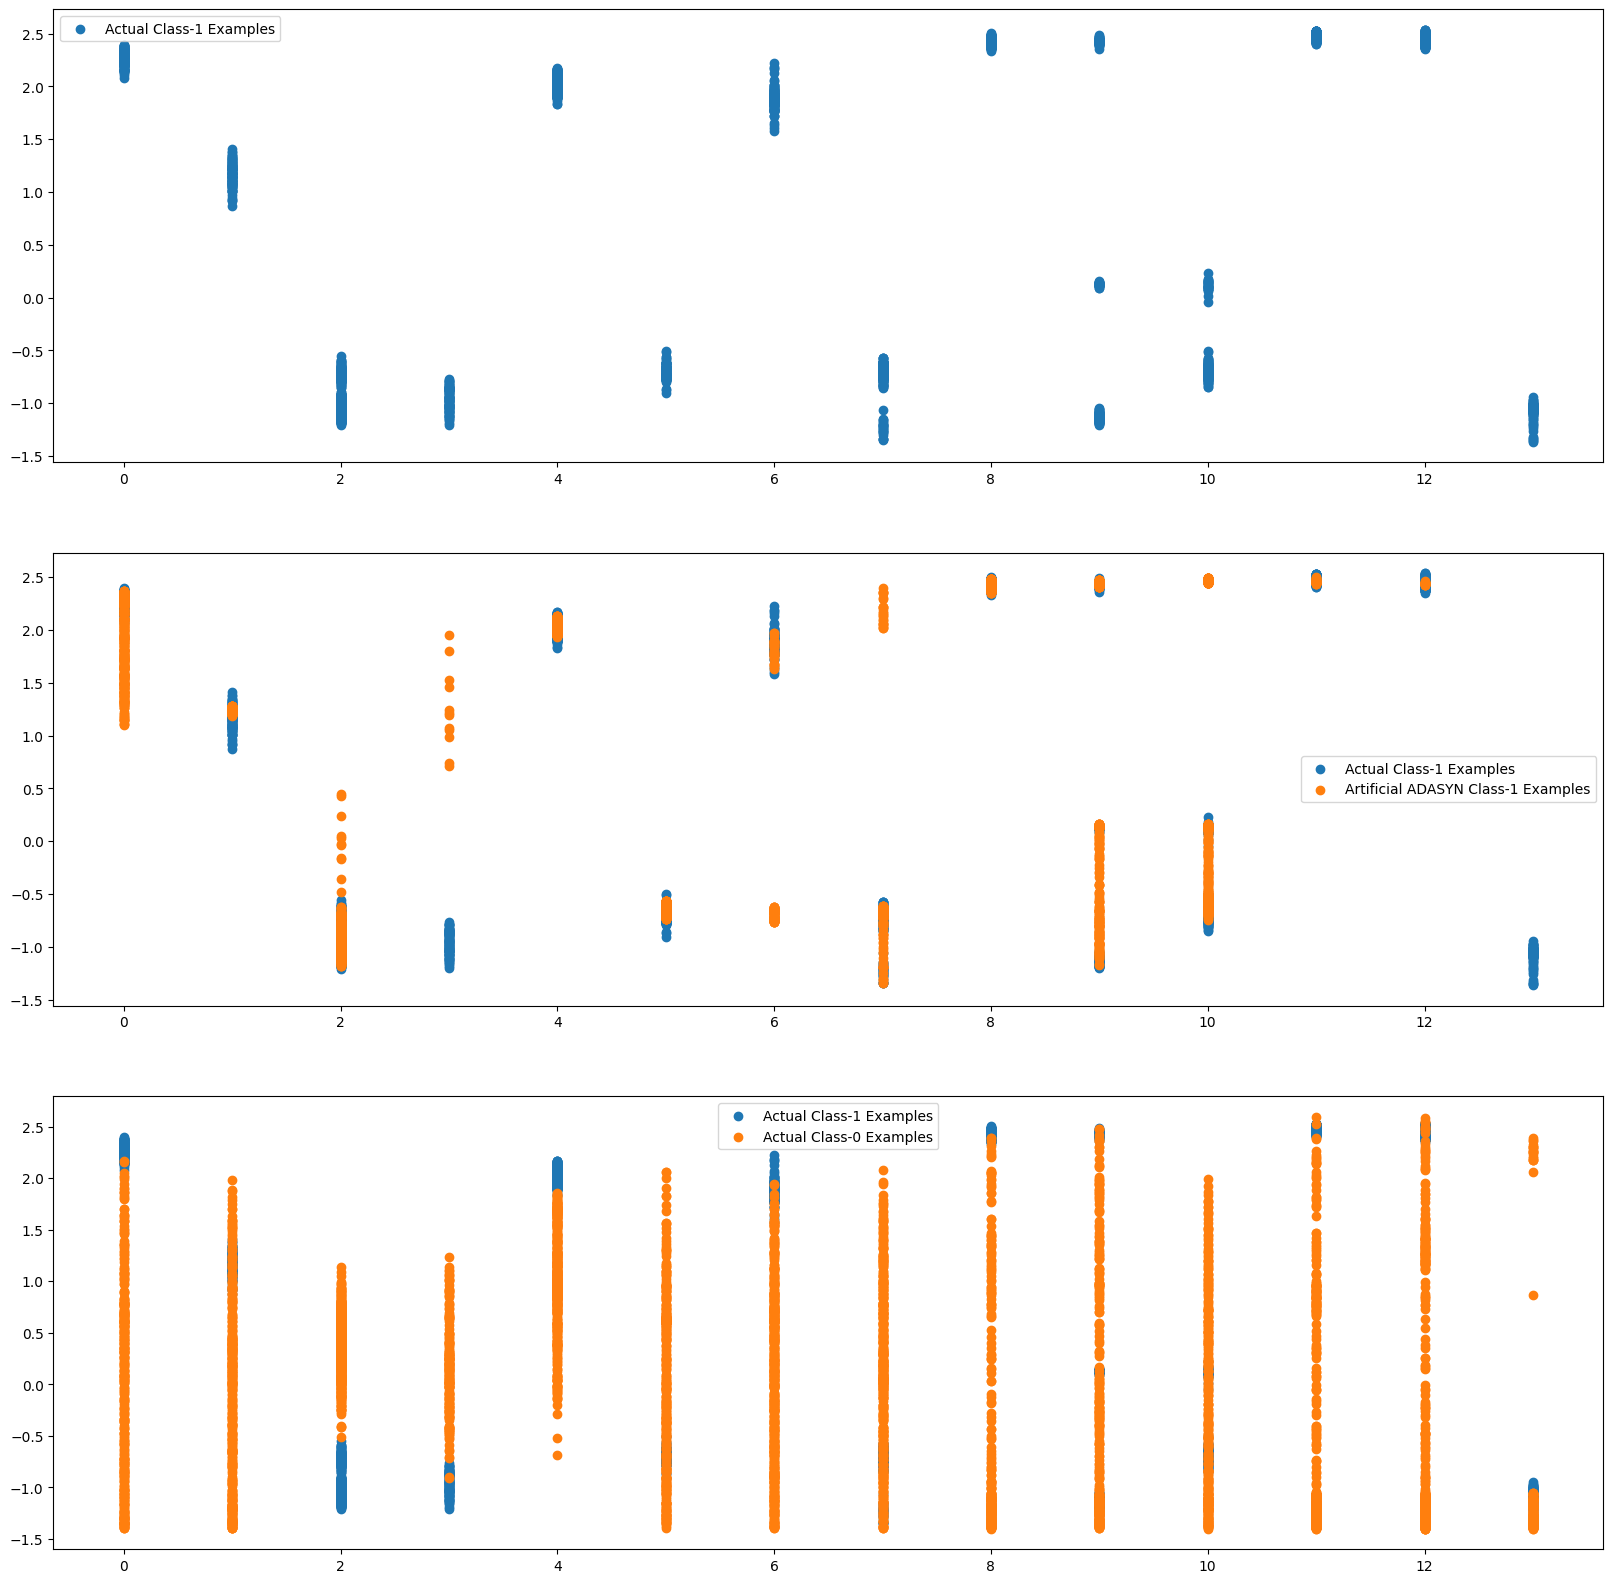

In [159]:
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### **Logistic Regression**

In [160]:
## specifying hyper parameters for grid search

logreg_params = {

    'penalty': ['l1','l2'],
    'C'       : [0.01, 0.1, 1, 10, 100, 1000],
    'solver':['liblinear'],
    'max_iter':[1000],

}

## create model instance
logreg = linear_model.LogisticRegression(random_state=0)

## Gridsearch for hyperparam tuning
logreg_adasyn_bal_model_cv = GridSearchCV(estimator = logreg,
                        param_grid = logreg_params,
                        scoring= 'roc_auc',
                        cv = k_folds,
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True)


## model training
logreg_adasyn_bal_model_cv.fit(X_train_adasyn, y_train_adasyn)

## Output of the evaluation result
print('Best ROC AUC score: ', logreg_adasyn_bal_model_cv.best_score_)

## Output of the best hyperparametes
print('Best hyperparameters: ', logreg_adasyn_bal_model_cv.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best ROC AUC score:  0.9244145062851414
Best hyperparameters:  {'C': 1000, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}


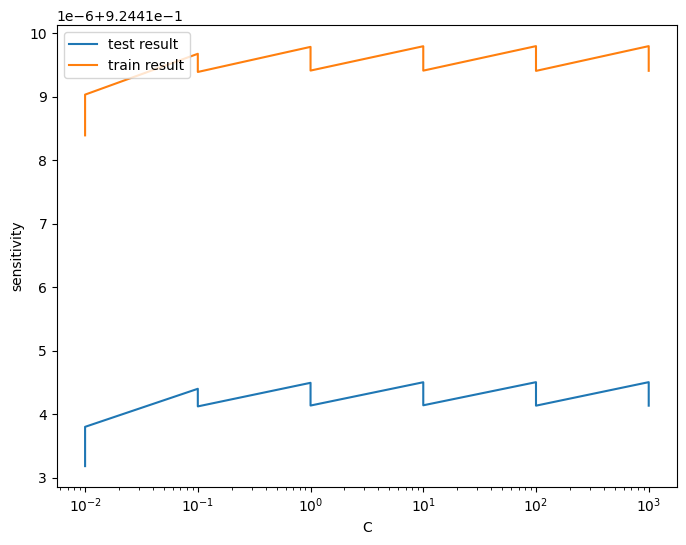

In [161]:
# cross validation results
cv_results = pd.DataFrame(logreg_adasyn_bal_model_cv.cv_results_)

##Train and Validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [162]:
#accessing best parameters to pass in xgboost classifier

print('best parameters:',list(logreg_adasyn_bal_model_cv.best_params_.items()))

c_val = list(logreg_adasyn_bal_model_cv.best_params_.items())[0][1]
mx_iter_val =list(logreg_adasyn_bal_model_cv.best_params_.items())[1][1]
penalty_val =list(logreg_adasyn_bal_model_cv.best_params_.items())[2][1]
solver_val = list(logreg_adasyn_bal_model_cv.best_params_.items())[3][1]


print(c_val)
print(mx_iter_val)
print(penalty_val)
print(solver_val)

best parameters: [('C', 1000), ('max_iter', 1000), ('penalty', 'l1'), ('solver', 'liblinear')]
1000
1000
l1
liblinear


In [163]:
## Logistic Regression with optimal C

## Instantiating the model with best C
logreg_adasyn_bal_model_bestcv =linear_model.LogisticRegression(C=c_val,max_iter=mx_iter_val,penalty=penalty_val,solver=solver_val,n_jobs=-1,random_state=0)

## Fitting the model on train dataset
logreg_adasyn_bal_model_bestcv.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=1000, max_iter=1000, n_jobs=-1, penalty='l1',
                   random_state=0, solver='liblinear')

F1 Score: 84.97%
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85    902418
           1       0.86      0.84      0.85    902117

    accuracy                           0.85   1804535
   macro avg       0.85      0.85      0.85   1804535
weighted avg       0.85      0.85      0.85   1804535



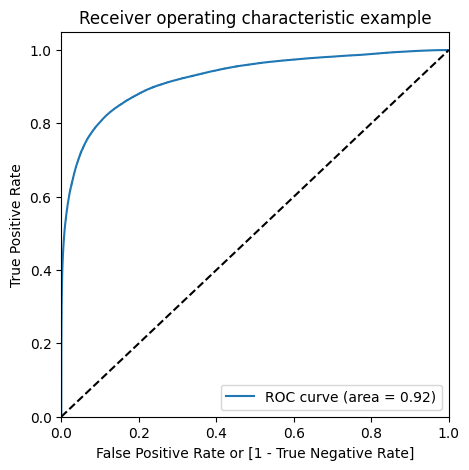

In [164]:
# ## Prediction on the train set
y_train_adasyn_pred = logreg_adasyn_bal_model_bestcv.predict(X_train_adasyn)

# displaying F1 Score and classification report
display_scores(y_train_adasyn, y_train_adasyn_pred)

#confusion matrix
confusion_matrix_train = confusion_matrix(y_train_adasyn, y_train_adasyn_pred)
print("Confusion Matrix \n",confusion_matrix_train)

## Predicted probability
y_train_adasyn_pred_proba = logreg_adasyn_bal_model_bestcv.predict_proba(X_train_adasyn)[:,1]

## Plot the ROC curve
draw_roc(y_train_adasyn, y_train_adasyn_pred_proba)

F1 Score: 6.77%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.86      0.93    386751
           1       0.04      0.86      0.07      2252

    accuracy                           0.86    389003
   macro avg       0.52      0.86      0.50    389003
weighted avg       0.99      0.86      0.92    389003



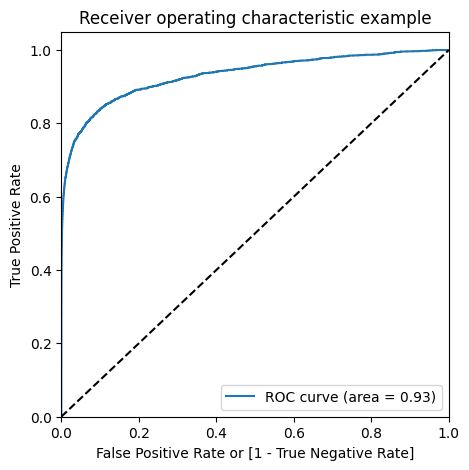

In [165]:
##Evaluating the model on the test set
y_test_adasyn_pred = logreg_adasyn_bal_model_bestcv.predict(X_test)

# displaying F1 Score and classification report
display_scores(y_test, y_test_adasyn_pred)

#confusion matrix
confusion_matrix_test = confusion_matrix(y_test, y_test_adasyn_pred)
print("Confusion Matrix \n",confusion_matrix_test)

## Predicted probability
y_test_adasyn_pred_proba = logreg_adasyn_bal_model_bestcv.predict_proba(X_test)[:,1]

## Plot the ROC curve
draw_roc(y_test, y_test_adasyn_pred_proba)

### **Model Summary**
#### **Train set**
- ROC AUC score = 92%
- Recall = 84%
- Precesion = 86%
- F1 score = 85%

#### **Test set**
- ROC AUC score = 93%
- Recall = 86%
- Precesion = 4%
- F1 score = 7%

## **Decesion Tree**

In [166]:
## specifying hyper parameters for grid search

dt_params = {
    'max_depth':[5,10,15],
    'min_samples_leaf':[50,100,150],
    'min_samples_split':[50,100,150],
}

# create model instance
dt = DecisionTreeClassifier(random_state=0)

## Gridsearch for hyperparam tuning
dt_adasyn_bal_model_cv = GridSearchCV(estimator=dt,param_grid=dt_params,scoring='roc_auc',cv=k_folds,n_jobs=-1,verbose=1)

## model training
dt_adasyn_bal_model_cv.fit(X_train_adasyn,y_train_adasyn)

# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", dt_adasyn_bal_model_cv.best_score_)
print('Best hyperparameters: ',dt_adasyn_bal_model_cv.best_estimator_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best roc auc score :  0.9986331082825632
Best hyperparameters:  DecisionTreeClassifier(max_depth=15, min_samples_leaf=50, min_samples_split=50,
                       random_state=0)


In [167]:
#accessing best parameters to pass in decesion tree classifier

print('best parameters:',list(dt_adasyn_bal_model_cv.best_params_.items()))
max_depth = list(dt_adasyn_bal_model_cv.best_params_.items())[0][1]
min_samples_leaf =list(dt_adasyn_bal_model_cv.best_params_.items())[1][1]
min_samples_split =list(dt_adasyn_bal_model_cv.best_params_.items())[2][1]


print(max_depth)
print(min_samples_leaf)
print(min_samples_split)

best parameters: [('max_depth', 15), ('min_samples_leaf', 50), ('min_samples_split', 50)]
15
50
50


In [168]:
# Model with optimal hyperparameters
dt_adasyn_bal_model_bestcv = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 0,
                                  max_depth=max_depth,
                                  min_samples_leaf=min_samples_leaf,
                                  min_samples_split=min_samples_split)

dt_adasyn_bal_model_bestcv.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=50, min_samples_split=50,
                       random_state=0)

F1 Score: 98.91%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    902418
           1       0.99      0.99      0.99    902117

    accuracy                           0.99   1804535
   macro avg       0.99      0.99      0.99   1804535
weighted avg       0.99      0.99      0.99   1804535



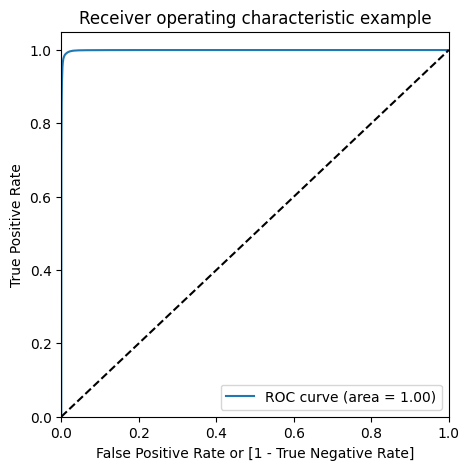

In [169]:
# ## Prediction on the train set
y_train_adasyn_pred = dt_adasyn_bal_model_bestcv.predict(X_train_adasyn)

#displaying F1 Score and classification report
display_scores(y_train_adasyn, y_train_adasyn_pred)

#confusion matrix
confusion_matrix_train = confusion_matrix(y_train_adasyn, y_train_adasyn_pred)
print("Confusion Matrix \n",confusion_matrix_train)

# Predicted probability
y_train_adasyn_pred_proba = dt_adasyn_bal_model_bestcv.predict_proba(X_train_adasyn)[:,1]

# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_adasyn_pred_proba)

F1 Score: 46.92%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    386751
           1       0.31      0.95      0.47      2252

    accuracy                           0.99    389003
   macro avg       0.66      0.97      0.73    389003
weighted avg       1.00      0.99      0.99    389003



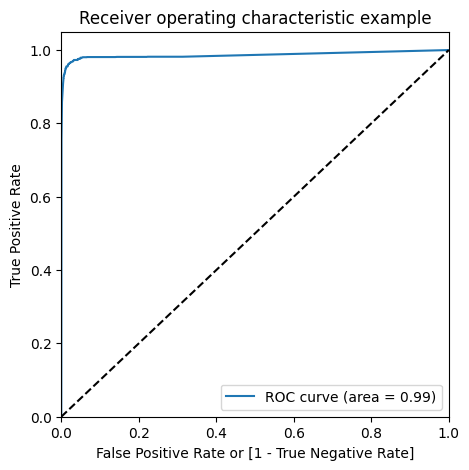

In [170]:
# Evaluating model on the test data
y_test_adasyn_pred = dt_adasyn_bal_model_bestcv.predict(X_test)

#displaying F1 Score and classification report
display_scores(y_test, y_test_adasyn_pred)

#confusion matrix
confusion_matrix_test = confusion_matrix(y_test, y_test_adasyn_pred)
print("Confusion Matrix \n",confusion_matrix_test)

# Predicted probability
y_test_adasyn_pred_proba = dt_adasyn_bal_model_bestcv.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_adasyn_pred_proba)

### **Model Summary**
#### **Train set**
- ROC AUC score = 100%
- Recall = 99%
- Precesion = 99%
- F1 score = 99%

#### **Test set**
- ROC AUC score = 99%
- Recall = 95%
- Precesion = 31%
- F1 score = 47%

## **XGBoost**

In [171]:
## specifying hyper parameters for grid search

xgboost_param = {
    'learning_rate':[0.01,0.05,0.1],
    'subsample':[0.3,0.6,0.9],
    'max_depth':[4,5,6]
}

# creating model instance
xgb = XGBClassifier(objective='binary:logistic',n_estimators=200,tree_method='hist',random_state=0)

## Gridsearch for hyperparam tuning
xgb_adasyn_bal_model_cv = GridSearchCV(estimator=xgb,
                                      param_grid=xgboost_param,
                                      scoring='roc_auc',
                                      cv=k_folds,
                                      n_jobs=-1,
                                      verbose=1,
                                      return_train_score=True)

#model training
xgb_adasyn_bal_model_cv.fit(X_train_adasyn, y_train_adasyn)

# Printing the optimal score and hyperparameters
print("Best roc auc score : ", xgb_adasyn_bal_model_cv.best_score_)
print('Best hyperparameters: ',xgb_adasyn_bal_model_cv.best_estimator_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best roc auc score :  0.9999375907777441
Best hyperparameters:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)


In [172]:
# cross validation results
cv_results = pd.DataFrame(xgb_adasyn_bal_model_cv.cv_results_)

In [173]:
#accessing best parameters to pass in xgboost classifier

print('best parameters:',list(xgb_adasyn_bal_model_cv.best_params_.items()))

learning_rate = list(xgb_adasyn_bal_model_cv.best_params_.items())[0][1]
max_depth =list(xgb_adasyn_bal_model_cv.best_params_.items())[1][1]
subsample =list(xgb_adasyn_bal_model_cv.best_params_.items())[2][1]


print(learning_rate)
print(max_depth)
print(subsample)

best parameters: [('learning_rate', 0.1), ('max_depth', 6), ('subsample', 0.9)]
0.1
6
0.9


In [174]:
# Model with optimal hyperparameter
xgb_adasyn_bal_model_bestcv = XGBClassifier(learning_rate = learning_rate,max_depth=max_depth,subsample=subsample,n_jobs=-1,
                                            objective='binary:logistic',tree_method='hist',n_estimators=200,random_state=0)


xgb_adasyn_bal_model_bestcv.fit(X_train_adasyn,y_train_adasyn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

F1 Score: 99.71%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    902418
           1       1.00      1.00      1.00    902117

    accuracy                           1.00   1804535
   macro avg       1.00      1.00      1.00   1804535
weighted avg       1.00      1.00      1.00   1804535

Confusion Matrix 
 [[899189   3229]
 [  2026 900091]]


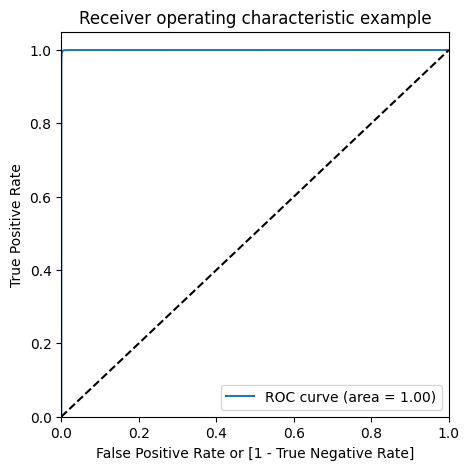

In [176]:
# Predicting on the train set
y_train_adasyn_pred = xgb_adasyn_bal_model_bestcv.predict(X_train_adasyn)

# #displaying F1 Score and classification report
display_scores(y_train_adasyn, y_train_adasyn_pred)

#confusion matrix
confusion_matrix_train = confusion_matrix(y_train_adasyn, y_train_adasyn_pred)
print("Confusion Matrix \n",confusion_matrix_train)

# Predicted probability
y_train_adasyn_pred_proba = xgb_adasyn_bal_model_bestcv.predict_proba(X_train_adasyn)[:,1]

# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_adasyn_pred_proba)

F1 Score: 72.26%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    386751
           1       0.58      0.95      0.72      2252

    accuracy                           1.00    389003
   macro avg       0.79      0.97      0.86    389003
weighted avg       1.00      1.00      1.00    389003

Confusion Matrix 
 [[385239   1512]
 [   123   2129]]


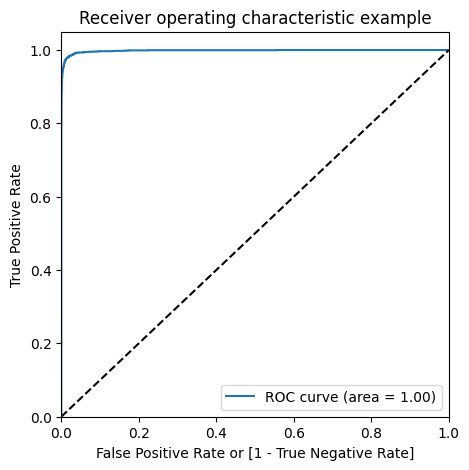

In [177]:
# model evaluation on test set
y_test_adasyn_pred = xgb_adasyn_bal_model_bestcv.predict(X_test)

# #displaying F1 Score and classification report
display_scores(y_test, y_test_adasyn_pred)

#confusion matrix
confusion_matrix_test = confusion_matrix(y_test, y_test_adasyn_pred)
print("Confusion Matrix \n",confusion_matrix_test)

# Predicted probability
y_test_adasyn_pred_proba = xgb_adasyn_bal_model_bestcv.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_adasyn_pred_proba)

### **Model Summary**
#### **Train set**
- ROC AUC score = 100%
- Recall = 100%
- Precesion = 100%
- F1 score = 100%

#### **Test set**
- ROC AUC score = 100%
- Recall = 95%
- Precesion = 58%
- F1 score = 72%

## Evaluation Metrics of all Models

In [75]:
evalution_metric_dict = {'Sampling Method': {0: 'Imbalanced Dataset', 1: 'Imbalanced Dataset', 2: 'Imbalanced Dataset', 3: 'Imbalanced Dataset', 4: 'Imbalanced Dataset', 5: 'Imbalanced Dataset', 6: 'Random Oversampling', 7: 'Random Oversampling', 8: 'Random Oversampling', 9: 'Random Oversampling', 10: 'Random Oversampling', 11: 'Random Oversampling', 12: 'SMOTE', 13: 'SMOTE', 14: 'SMOTE', 15: 'SMOTE', 16: 'SMOTE', 17: 'SMOTE', 18: 'ADASYN', 19: 'ADASYN', 20: 'ADASYN', 21: 'ADASYN', 22: 'ADASYN', 23: 'ADASYN'}, 'Model': {0: 'Logistic Regression', 1: 'Logistic Regression', 2: 'Decesion Tree', 3: 'Decesion Tree', 4: 'XGBoost', 5: 'XGBoost', 6: 'Logistic Regression', 7: 'Logistic Regression', 8: 'Decesion Tree', 9: 'Decesion Tree', 10: 'XGBoost', 11: 'XGBoost', 12: 'Logistic Regression', 13: 'Logistic Regression', 14: 'Decesion Tree', 15: 'Decesion Tree', 16: 'XGBoost', 17: 'XGBoost', 18: 'Logistic Regression', 19: 'Logistic Regression', 20: 'Decesion Tree', 21: 'Decesion Tree', 22: 'XGBoost', 23: 'XGBoost'}, 'Dataset': {0: 'Train', 1: 'Test', 2: 'Train', 3: 'Test', 4: 'Train', 5: 'Test', 6: 'Train', 7: 'Test', 8: 'Train', 9: 'Test', 10: 'Train', 11: 'Test', 12: 'Train', 13: 'Test', 14: 'Train', 15: 'Test', 16: 'Train', 17: 'Test', 18: 'Train', 19: 'Test', 20: 'Train', 21: 'Test', 22: 'Train', 23: 'Test'}, 'ROC AUC': {0: 0.94, 1: 0.93, 2: 1.0, 3: 0.99, 4: 1.0, 5: 1.0, 6: 0.94, 7: 0.94, 8: 1.0, 9: 0.98, 10: 1.0, 11: 1.0, 12: 0.95, 13: 0.93, 14: 1.0, 15: 0.99, 16: 1.0, 17: 1.0, 18: 0.92, 19: 0.93, 20: 1.0, 21: 0.99, 22: 1.0, 23: 1.0}, 'Recall': {0: 0.44, 1: 0.45, 2: 0.75, 3: 0.74, 4: 0.93, 5: 0.87, 6: 0.87, 7: 0.86, 8: 1.0, 9: 0.96, 10: 1.0, 11: 0.97, 12: 0.88, 13: 0.84, 14: 0.99, 15: 0.96, 16: 1.0, 17: 0.94, 18: 0.84, 19: 0.86, 20: 0.99, 21: 0.95, 22: 1.0, 23: 0.95}, 'Precesion': {0: 0.92, 1: 0.94, 2: 0.89, 3: 0.89, 4: 0.98, 5: 0.95, 6: 0.9, 7: 0.05, 8: 0.99, 9: 0.47, 10: 1.0, 11: 0.66, 12: 0.91, 13: 0.05, 14: 0.99, 15: 0.32, 16: 1.0, 17: 0.64, 18: 0.86, 19: 0.04, 20: 0.99, 21: 0.31, 22: 1.0, 23: 0.58}, 'F1 Score': {0: 0.6, 1: 0.6, 2: 0.81, 3: 0.81, 4: 0.96, 5: 0.91, 6: 0.88, 7: 0.09, 8: 1.0, 9: 0.63, 10: 1.0, 11: 0.79, 12: 0.89, 13: 0.1, 14: 0.99, 15: 0.48, 16: 1.0, 17: 0.76, 18: 0.85, 19: 0.07, 20: 0.99, 21: 0.47, 22: 1.0, 23: 0.72}}

In [121]:
evalution_metric_df = pd.DataFrame(evalution_metric_dict)
evalution_metric_df[evalution_metric_df['Dataset']=='Test'].sort_values(by='Recall',ascending=False)

Sampling Method                Model Dataset  ROC AUC  Recall  \
11  Random Oversampling              XGBoost    Test     1.00    0.97   
9   Random Oversampling        Decesion Tree    Test     0.98    0.96   
15                SMOTE        Decesion Tree    Test     0.99    0.96   
21               ADASYN        Decesion Tree    Test     0.99    0.95   
23               ADASYN              XGBoost    Test     1.00    0.95   
17                SMOTE              XGBoost    Test     1.00    0.94   
5    Imbalanced Dataset              XGBoost    Test     1.00    0.87   
7   Random Oversampling  Logistic Regression    Test     0.94    0.86   
19               ADASYN  Logistic Regression    Test     0.93    0.86   
13                SMOTE  Logistic Regression    Test     0.93    0.84   
3    Imbalanced Dataset        Decesion Tree    Test     0.99    0.74   
1    Imbalanced Dataset  Logistic Regression    Test     0.93    0.45   

    Precesion  F1 Score  
11       0.66      0.79  
9        0.47      0.63  
15       0.32      0.48  
21       0.31      0.47  
23       0.58      0.72  
17       0.64      0.76  
5        0.95      0.91  
7        0.05      0.09  
19       0.04      0.07  
13       0.05      0.10  
3        0.89      0.81  
1        0.94      0.60

### **From the above Compilation of evaluation metrics from all models, it is clear that XGBoost (Random Oversampling) model performs well**

**Since our buisness objective is to identifying fraud transactions accurately than the no_fraud transactions. Hence, we have selected recall metric so High recall means model will correctly identify almost all transactions who are likely to fraud.**


    
### Model Consideration:-
    
- **Based on the `ROC AUC` and `RECALL` and `Precesion` of different models, we will use hyper tuned XGBoost model using Random oversampling method as our final model for performing test on unseen data.**


- **Model Summary of Xgboost(Random Oversampling)**

    - ROC AUC score = 100%
    - Recall = 97%
    - Precesion = 66%
    - F1 score = 79%

### Features with its importance from XGBoost Random Oversampling model

In [46]:
imp_df = pd.DataFrame({
    "Varname": X_train_rndm.columns,
    "Imp": xgb_rndm_bal_model_bestcv.feature_importances_
})

imp_ftrs= imp_df.sort_values(by="Imp", ascending=False)
imp_ftrs.head(10)

Varname       Imp
13  hist_trans_avg_amt_24h  0.618797
1       transaction_amount  0.160637
0        spending_category  0.083186
6            time_category  0.041488
2                   gender  0.011998
12  hist_trans_avg_amt_30d  0.011711
10          hist_trans_30d  0.011619
11          hist_trans_24h  0.011530
3                 city_pop  0.011072
4             TxnDayOfWeek  0.009173

## **Reading and Preparing Unseen Test Data**

In [78]:
test_df= pd.read_csv('fraudTest.csv',index_col=0)
test_df.head()

trans_date_trans_time            cc_num  \
0   2020-06-21 12:14:25  2291163933867244   
1   2020-06-21 12:14:33  3573030041201292   
2   2020-06-21 12:14:53  3598215285024754   
3   2020-06-21 12:15:15  3591919803438423   
4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street        city  ...      lat  \
0   Elliott      M            351 Darlene Green    Columbia  ...  33.9659   
1  Williams      F             3638 Marsh Union     Altonah  ...  40.3207   
2     Lopez      F         9333 Valentine Point    Bellmore  ...  40.6729   
3  Williams      M  32941 Krystal Mill Apt. 552  Titusville  ...  28.5697   
4    Massey      M     5783 Evan Roads Apt. 465    Falmouth  ...  44.2529   

       long  city_pop                     job         dob  \
0  -80.9355    333497     Mechanical engineer  1968-03-19   
1 -110.4360       302  Sales professional, IT  1990-01-17   
2  -73.5365     34496       Librarian, public  1970-10-21   
3  -80.8191     54767            Set designer  1987-07-25   
4  -85.0170      1126      Furniture designer  1955-07-06   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 22 columns]

In [79]:
test_df.shape

(555719, 22)

In [80]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

In [81]:
test_df.duplicated().sum()

0

### Data Cleaning

In [82]:
drop_col = ['first','last','street','zip','trans_num','unix_time','merchant']
test_df1 = test_df.drop(drop_col,axis=1)

In [83]:
test_df1.shape

(555719, 15)

In [84]:
test_df1.rename(columns={'category':'spending_category','amt':'transaction_amount'},inplace=True)

In [85]:
# object data type to datetime
test_df1['trans_date_trans_time'] = pd.to_datetime(test_df1['trans_date_trans_time'])
test_df1['dob'] = pd.to_datetime(test_df1['dob'])

## **Feature Engineering**

In [86]:
# deriving new features from the data
test_df1['TxnDayOfWeek'] = test_df1['trans_date_trans_time'].dt.day_name()
test_df1['TxnYear'] = test_df1['trans_date_trans_time'].dt.year
test_df1['TxnMonth'] = test_df1['trans_date_trans_time'].dt.strftime('%B')
test_df1['DOBYear'] = test_df1['dob'].dt.year

In [87]:
test_df1.shape

(555719, 19)

In [88]:
test_df1['time_category'] = test_df1['trans_date_trans_time'].apply(time_category)

In [89]:
# deriving customer age
test_df1['customer_age'] = test_df1['TxnYear'] - test_df1['DOBYear']

In [90]:
# grouping the customers into age buckets
test_df1['cust_age_group'] = pd.cut(x=test_df1['customer_age'],bins=[0,17,30,60,100],
                                    labels=['Teenage','Young Adults','Middle Aged Adults','Old Adults'])

In [91]:
test_df1['distance(km)'] = test_df1.apply(lambda row: calculate_distance(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)

In [92]:
test_df1.shape

(555719, 23)

In [93]:
test_df1['usa_regions'] = test_df1.apply(lambda x: regions(x), axis=1)

In [94]:
test_df1.shape

(555719, 24)

##### Deriving Historical variables such as `24 Hours Orders by Customers`, `30 Day Transactions by Customers`,`30 Day Orders Amt Avg by Customers`,`24 Hours Orders Amt Avg by Customers`, `

In [95]:
df_hist = test_df1.copy()
df_hist.index = df_hist['trans_date_trans_time']
df_hist = df_hist.rename_axis(index={'trans_date_trans_time': 'time_index'})
df_hist = df_hist.sort_index()
df_hist.head()

trans_date_trans_time            cc_num spending_category  \
time_index                                                                      
2020-06-21 12:14:25   2020-06-21 12:14:25  2291163933867244     personal_care   
2020-06-21 12:14:33   2020-06-21 12:14:33  3573030041201292     personal_care   
2020-06-21 12:14:53   2020-06-21 12:14:53  3598215285024754    health_fitness   
2020-06-21 12:15:15   2020-06-21 12:15:15  3591919803438423          misc_pos   
2020-06-21 12:15:17   2020-06-21 12:15:17  3526826139003047            travel   

                     transaction_amount gender        city state      lat  \
time_index                                                                  
2020-06-21 12:14:25                2.86      M    Columbia    SC  33.9659   
2020-06-21 12:14:33               29.84      F     Altonah    UT  40.3207   
2020-06-21 12:14:53               41.28      F    Bellmore    NY  40.6729   
2020-06-21 12:15:15               60.05      M  Titusville    FL  28.5697   
2020-06-21 12:15:17                3.19      M    Falmouth    MI  44.2529   

                         long  city_pop  ... is_fraud TxnDayOfWeek  TxnYear  \
time_index                               ...                                  
2020-06-21 12:14:25  -80.9355    333497  ...        0       Sunday     2020   
2020-06-21 12:14:33 -110.4360       302  ...        0       Sunday     2020   
2020-06-21 12:14:53  -73.5365     34496  ...        0       Sunday     2020   
2020-06-21 12:15:15  -80.8191     54767  ...        0       Sunday     2020   
2020-06-21 12:15:17  -85.0170      1126  ...        0       Sunday     2020   

                     TxnMonth  DOBYear time_category  customer_age  \
time_index                                                           
2020-06-21 12:14:25      June     1968     Afternoon            52   
2020-06-21 12:14:33      June     1990     Afternoon            30   
2020-06-21 12:14:53      June     1970     Afternoon            50   
2020-06-21 12:15:15      June     1987     Afternoon            33   
2020-06-21 12:15:17      June     1955     Afternoon            65   

                         cust_age_group  distance(km) usa_regions  
time_index                                                         
2020-06-21 12:14:25  Middle Aged Adults     24.561462       South  
2020-06-21 12:14:33        Young Adults    104.925092        West  
2020-06-21 12:14:53  Middle Aged Adults     59.080078   Northeast  
2020-06-21 12:15:15  Middle Aged Adults     27.698567       South  
2020-06-21 12:15:17          Old Adults    104.335106     Midwest  

[5 rows x 24 columns]

In [96]:
# 30 Day Transactions by Customers

df_hist['val_for_agg'] = 1

df_hist_trans_30d = \
    df_hist \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('30D')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_trans_30d.columns = ['cc_num','trans_date_trans_time','hist_trans_30d']
df_hist_trans_30d = df_hist_trans_30d.groupby(['cc_num','trans_date_trans_time'])['hist_trans_30d'].min().reset_index()

In [97]:
# 24 Hours Orders by Customers
df_hist_orders_24h = \
    df_hist \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_orders_24h.columns = ['cc_num','trans_date_trans_time','hist_trans_24h']
df_hist_orders_24h = df_hist_orders_24h.groupby(['cc_num','trans_date_trans_time'])['hist_trans_24h'].min().reset_index()

In [98]:
# 30 Day Orders Amt Avg by Customers

df_hist_trans_amt_avg_30d = \
    df_hist \
    .groupby(['cc_num'])['transaction_amount']\
    .rolling('30D')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)

df_hist_trans_amt_avg_30d.columns = ['cc_num','trans_date_trans_time','hist_trans_avg_amt_30d']
df_hist_trans_amt_avg_30d = df_hist_trans_amt_avg_30d.groupby(['cc_num','trans_date_trans_time'])['hist_trans_avg_amt_30d'].min().reset_index()

In [99]:
# 24 Hours Orders Amt Avg by Customers
df_hist_trans_amt_avg_24h = \
    df_hist \
    .groupby(['cc_num'])['transaction_amount']\
    .rolling('24H')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)

df_hist_trans_amt_avg_24h.columns = ['cc_num','trans_date_trans_time','hist_trans_avg_amt_24h']
df_hist_trans_amt_avg_24h = df_hist_trans_amt_avg_24h.groupby(['cc_num','trans_date_trans_time'])['hist_trans_avg_amt_24h'].min().reset_index()

In [100]:
test_df1=pd.merge(test_df1, df_hist_trans_30d, on=['cc_num', 'trans_date_trans_time'], how= 'left')
test_df1=pd.merge(test_df1, df_hist_orders_24h, on=['cc_num', 'trans_date_trans_time'], how='left')
test_df1=pd.merge(test_df1, df_hist_trans_amt_avg_30d, on=['cc_num', 'trans_date_trans_time'], how='left')
test_df1=pd.merge(test_df1, df_hist_trans_amt_avg_24h, on=['cc_num', 'trans_date_trans_time'], how='left')

In [101]:
df1.shape

(1296675, 28)

In [102]:
# drop redundant features after feature engineering
test_df2 = test_df1.drop(['trans_date_trans_time','cc_num','lat','long','dob','merch_lat','merch_long','DOBYear','customer_age','state'],axis=1)

In [103]:
test_df2.shape

(555719, 18)

In [104]:
test_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555719 entries, 0 to 555718
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   spending_category       555719 non-null  object  
 1   transaction_amount      555719 non-null  float64 
 2   gender                  555719 non-null  object  
 3   city                    555719 non-null  object  
 4   city_pop                555719 non-null  int64   
 5   job                     555719 non-null  object  
 6   is_fraud                555719 non-null  int64   
 7   TxnDayOfWeek            555719 non-null  object  
 8   TxnYear                 555719 non-null  int64   
 9   TxnMonth                555719 non-null  object  
 10  time_category           555719 non-null  object  
 11  cust_age_group          555719 non-null  category
 12  distance(km)            555719 non-null  float64 
 13  usa_regions             555719 non-null  object  
 14  hist

### **Data Type changes from object to category to reduce memory usage**

In [105]:
for i in test_df2.select_dtypes(include='object').columns:
  df2[i] = test_df2[i].astype('category')

In [106]:
# change datatype for 'TxnYear' to category
test_df2['TxnYear'] = test_df2['TxnYear'].astype('category')

In [107]:
test_df2.shape

(555719, 18)

### **Dropping Irrelevant features**

In [108]:
# dropping less important features from the data
drop_col = ['city','job','TxnYear']

In [109]:
test_df3 = test_df2.drop(drop_col,axis=1)

In [110]:
test_df3.shape

(555719, 15)

### **Feature Scaling**

In [111]:
# Transforming the test data
test_df3[["transaction_amount",'hist_trans_30d','hist_trans_24h','hist_trans_avg_amt_30d','hist_trans_avg_amt_24h','distance(km)','city_pop']] = scaler.transform(test_df3[["transaction_amount",'hist_trans_30d','hist_trans_24h','hist_trans_avg_amt_30d','hist_trans_avg_amt_24h','distance(km)','city_pop']])

In [112]:
test_df3['city_pop'] = test_df3['city_pop'].astype('float')

### **Label Encoding**

In [113]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical column
le_spending_category = LabelEncoder()
le_gender = LabelEncoder()
le_TxnDayOfWeek = LabelEncoder()
le_TxnMonth = LabelEncoder()
le_time_category = LabelEncoder()
le_cust_age_group = LabelEncoder()
le_usa_regions = LabelEncoder()

# Fit the LabelEncoder objects to the respective categorical columns
le_spending_category.fit(test_df3['spending_category'])
le_gender.fit(test_df3['gender'])
le_TxnDayOfWeek.fit(test_df3['TxnDayOfWeek'])
le_TxnMonth.fit(test_df3['TxnMonth'])
le_time_category.fit(test_df3['time_category'])
le_cust_age_group.fit(test_df3['cust_age_group'])
le_usa_regions.fit(test_df3['usa_regions'])

# Transform the categorical columns
test_df3['spending_category'] = le_spending_category.transform(test_df3['spending_category'])
test_df3['gender'] = le_gender.transform(test_df3['gender'])
test_df3['TxnDayOfWeek'] = le_TxnDayOfWeek.transform(test_df3['TxnDayOfWeek'])
test_df3['TxnMonth'] = le_TxnMonth.transform(test_df3['TxnMonth'])
test_df3['time_category'] = le_time_category.transform(test_df3['time_category'])
test_df3['cust_age_group'] = le_cust_age_group.transform(test_df3['cust_age_group'])
test_df3['usa_regions'] = le_usa_regions.transform(test_df3['usa_regions'])


In [114]:
test_df3.shape

(555719, 15)

### **Skewness Mitigation- Power Transformation**

In [115]:
## Apply power transform for the train & test data whne skewness > 1 and < -1
pt = PowerTransformer(copy=False)

skewed_ftrs = ['transaction_amount','hist_trans_24h','hist_trans_avg_amt_30d','hist_trans_avg_amt_24h']
# Fit the PowerTransformer on the training data
pt.fit(test_df3[skewed_ftrs])

# Apply the power transformer to train data
test_df3[skewed_ftrs] = pt.transform(test_df3[skewed_ftrs])

### **Model Evaluation - XGBOOST (ADASYN)**

In [116]:
X_test_final = test_df3.drop('is_fraud',axis=1)
y_test_final = test_df3['is_fraud']

F1 Score: 4.17%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.84      0.91    553574
           1       0.02      0.92      0.04      2145

    accuracy                           0.84    555719
   macro avg       0.51      0.88      0.48    555719
weighted avg       1.00      0.84      0.91    555719

Confusion Matrix 
 [[462543  91031]
 [   162   1983]]


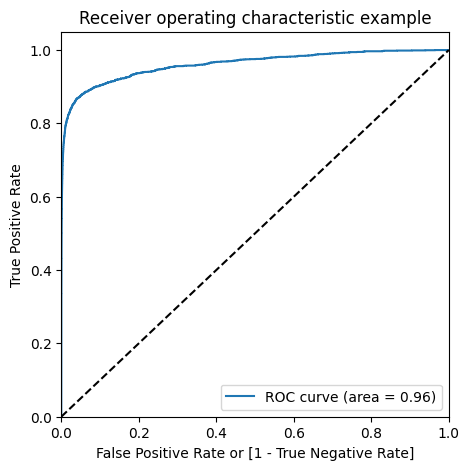

In [223]:
# model evaluation on test set
y_test_adasyn_pred = xgb_adasyn_bal_model_bestcv.predict(X_test_final)

#displaying F1 and classification report
display_scores(y_test_final, y_test_adasyn_pred)

#confusion matrix
confusion_matrix_test = confusion_matrix(y_test_final, y_test_adasyn_pred)
print("Confusion Matrix \n",confusion_matrix_test)

# Predicted probability
y_test_adasyn_pred_proba = xgb_adasyn_bal_model_bestcv.predict_proba(X_test_final)[:,1]

# Plot the ROC curve
draw_roc(y_test_final, y_test_adasyn_pred_proba)

### **Model Summary**
- ROC AUC score = 96%
- Recall = 92%
- Precesion = 2%
- F1 score = 4%

### **Model Evaluation - XGBOOST (SMOTE)**

F1 Score: 4.36%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.84      0.92    553574
           1       0.02      0.92      0.04      2145

    accuracy                           0.84    555719
   macro avg       0.51      0.88      0.48    555719
weighted avg       1.00      0.84      0.91    555719

Confusion Matrix 
 [[467314  86260]
 [   173   1972]]


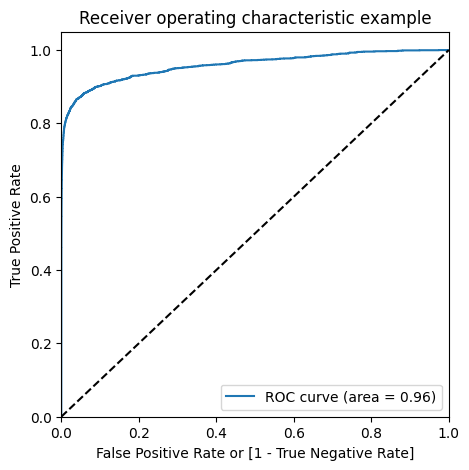

In [224]:
# model evaluation on test set
y_test_smote_pred = xgb_smote_bal_model_bestcv.predict(X_test_final)

#displaying scores
display_scores(y_test_final, y_test_smote_pred)

#confusion matrix
confusion_matrix_test = confusion_matrix(y_test_final, y_test_smote_pred)
print("Confusion Matrix \n",confusion_matrix_test)

# Predicted probability
y_test_smote_pred_proba = xgb_smote_bal_model_bestcv.predict_proba(X_test_final)[:,1]

# Plot the ROC curve
draw_roc(y_test_final, y_test_smote_pred_proba)

### **Model Summary**
- ROC AUC score = 96%
- Recall = 92%
- Precesion = 2%
- F1 score = 4%

### **Model Evaluation - XGBOOST (Random)**

F1 Score: 72.03%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.59      0.94      0.72      2145

    accuracy                           1.00    555719
   macro avg       0.79      0.97      0.86    555719
weighted avg       1.00      1.00      1.00    555719

Confusion Matrix 
 [[552155   1419]
 [   139   2006]]


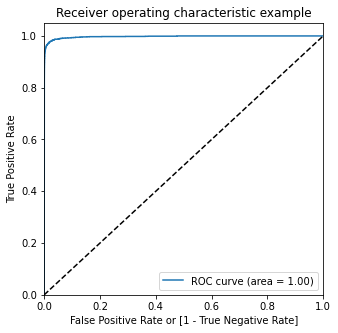

In [118]:
# model evaluation on test set
y_test_rndm_pred = xgb_rndm_bal_model_bestcv.predict(X_test_final)

#  displaying F1 Score and classification report
display_scores(y_test_final, y_test_rndm_pred)

# confusion matrix
confusion_matrix_test = confusion_matrix(y_test_final, y_test_rndm_pred)
print("Confusion Matrix \n",confusion_matrix_test)

# Predicted probability
y_test_rndm_pred_proba = xgb_rndm_bal_model_bestcv.predict_proba(X_test_final)[:,1]

# Plot the ROC curve
draw_roc(y_test_final, y_test_rndm_pred_proba)

### **Model Summary**
- ROC AUC score = 100%
- Recall = 94%
- Precesion = 59%
- F1 score = 72%

## **Hence Hyper tuned XGBoost model using Random oversampling method is chosen based on its performance on `Recall`,`Precesion`,`AUC`,and `F1 score` metric and its enhanced cost benifit metrics**

## **Cost benefit analysis**

The Cost Benefit Analysis is done on the complete dataset to analyse the business impact and present them to relevant business stakeholders.

### **Part 1: Analysis before model deployed**

In [48]:
df.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...      lat      long  \
0                561 Perry Cove  Moravian Falls  ...  36.0788  -81.1781   
1  43039 Riley Greens Suite 393          Orient  ...  48.8878 -118.2105   
2      594 White Dale Suite 530      Malad City  ...  42.1808 -112.2620   
3   9443 Cynthia Court Apt. 038         Boulder  ...  46.2306 -112.1138   
4              408 Bradley Rest        Doe Hill  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 22 columns]

In [51]:
test_df.head()

trans_date_trans_time            cc_num  \
0   2020-06-21 12:14:25  2291163933867244   
1   2020-06-21 12:14:33  3573030041201292   
2   2020-06-21 12:14:53  3598215285024754   
3   2020-06-21 12:15:15  3591919803438423   
4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street        city  ...      lat  \
0   Elliott      M            351 Darlene Green    Columbia  ...  33.9659   
1  Williams      F             3638 Marsh Union     Altonah  ...  40.3207   
2     Lopez      F         9333 Valentine Point    Bellmore  ...  40.6729   
3  Williams      M  32941 Krystal Mill Apt. 552  Titusville  ...  28.5697   
4    Massey      M     5783 Evan Roads Apt. 465    Falmouth  ...  44.2529   

       long  city_pop                     job         dob  \
0  -80.9355    333497     Mechanical engineer  1968-03-19   
1 -110.4360       302  Sales professional, IT  1990-01-17   
2  -73.5365     34496       Librarian, public  1970-10-21   
3  -80.8191     54767            Set designer  1987-07-25   
4  -85.0170      1126      Furniture designer  1955-07-06   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 22 columns]

In [228]:
df.shape,test_df.shape

((1296675, 22), (555719, 22))

In [52]:
df_final = pd.concat([df, test_df], axis=0)

In [53]:
df_final.shape

(1852394, 22)

#### **Let us take a look at what we need to do in order to perform the cost-benefit analysis step by step:**

**Part I: Analyse the dataset and find the following figures:**

1. Average number of transactions per month
2. Average number of fraudulent transactions per month
3. Average amount per fraudulent transaction

#### Average number of transactions per month

In [54]:
# Total number of Transactions can be found by checking the shape of the dataset
# Avg Transactions per month can be found by dividing it by 24 (since the dataset is of 24 months from Jan 2019 to Dec 2020)

Avg_Trans_Pm = df_final.shape[0]//24

print("1. Average Number of Transactions per month are :",Avg_Trans_Pm)

1. Average Number of Transactions per month are : 77183


In [55]:
# Checking Fraudulent Transactions

df_final[df_final['is_fraud']==1].head()

trans_date_trans_time           cc_num                          merchant  \
2449   2019-01-02 01:06:37    4613314721966            fraud_Rutherford-Mertz   
2472   2019-01-02 01:47:29  340187018810220  fraud_Jenkins, Hauck and Friesen   
2523   2019-01-02 03:05:23  340187018810220            fraud_Goodwin-Nitzsche   
2546   2019-01-02 03:38:03    4613314721966            fraud_Erdman-Kertzmann   
2553   2019-01-02 03:55:47  340187018810220                fraud_Koepp-Parker   

           category     amt  first    last gender                     street  \
2449    grocery_pos  281.06  Jason  Murphy      M  542 Steve Curve Suite 011   
2472  gas_transport   11.52  Misty    Hart      F  27954 Hall Mill Suite 575   
2523    grocery_pos  276.31  Misty    Hart      F  27954 Hall Mill Suite 575   
2546  gas_transport    7.03  Jason  Murphy      M  542 Steve Curve Suite 011   
2553    grocery_pos  275.73  Misty    Hart      F  27954 Hall Mill Suite 575   

               city  ...      lat     long  city_pop  \
2449  Collettsville  ...  35.9946 -81.7266       885   
2472    San Antonio  ...  29.4400 -98.4590   1595797   
2523    San Antonio  ...  29.4400 -98.4590   1595797   
2546  Collettsville  ...  35.9946 -81.7266       885   
2553    San Antonio  ...  29.4400 -98.4590   1595797   

                           job         dob                         trans_num  \
2449            Soil scientist  1988-09-15  e8a81877ae9a0a7f883e15cb39dc4022   
2472  Horticultural consultant  1960-10-28  bc7d41c41103877b03232f03f1f8d3f5   
2523  Horticultural consultant  1960-10-28  b98f12f4168391b2203238813df5aa8c   
2546            Soil scientist  1988-09-15  397894a5c4c02e3c61c784001f0f14e4   
2553  Horticultural consultant  1960-10-28  7863235a750d73a244c07f1fb7f0185a   

       unix_time  merch_lat  merch_long  is_fraud  
2449  1325466397  36.430124  -81.179483         1  
2472  1325468849  29.819364  -99.142791         1  
2523  1325473523  29.273085  -98.836360         1  
2546  1325475483  35.909292  -82.091010         1  
2553  1325476547  29.786426  -98.683410         1  

[5 rows x 22 columns]

#### Average number of fraudulent transactions per month

In [56]:
# Average Fraudulent Transactions

Avg_Fraud_Trans_Pm = df_final[df_final['is_fraud']==1].shape[0]//24

print("2. Average Number of Fraudulent Transactions per month are :",Avg_Fraud_Trans_Pm)

2. Average Number of Fraudulent Transactions per month are : 402


#### Average amount per fraudulent transaction

In [57]:
# Average amount Per Fraudulent Transaction

Avg_Fraud_Amt = df_final[df_final['is_fraud']==1].amt.sum()//df_final[df_final['is_fraud']==1].shape[0]
print("3. Average Amount Per Fraudulent Transactions is : ",Avg_Fraud_Amt)

3. Average Amount Per Fraudulent Transactions is :  530.0


<div class="alert alert-block alert-success">
    
####                           **Summary of Cost Benefit Analysis(Part 1)**

In [66]:
cost_benifit_dict1 = {
    'Average number of transactions per month':[Avg_Trans_Pm],
    'Average number of fraudulent transactions per month':[Avg_Fraud_Trans_Pm],
    'Average amount per fraudulent transaction':[Avg_Fraud_Amt]
}

cost_benifit1_df = pd.DataFrame(cost_benifit_dict1)

index_ = ['Value']
cost_benifit1_df.index = index_
cost_benifit1_df = cost_benifit1_df.transpose()
cost_benifit1_df = cost_benifit1_df.reset_index().rename(columns={'index':'metric'})
pd.set_option('max_colwidth', 400)
cost_benifit1_df

metric    Value
0             Average number of transactions per month  77183.0
1  Average number of fraudulent transactions per month    402.0
2            Average amount per fraudulent transaction    530.0

### **Part 2: Analysis after model deployed**

**Compare the cost incurred per month by the bank before and after the model deployment:**


* Cost incurred per month before the model was deployed = Average amount per fraudulent transaction * Average number of fraudulent transactions per month.

* Cost incurred per month after the model is built and deployed:


Let TF be the average number of transactions per month detected as fraudulent by the model and let the cost of providing customer executive support per fraudulent transaction detected by the model = $1.5

  * Total cost of providing customer support per month for  fraudulent transactions detected by the model = 1.5 * TF.

Let FN be the average number of transactions per month that are fraudulent but not detected by the model

  * Cost incurred due to these fraudulent transactions left undetected by the model = Average amount per fraudulent transaction * FN
  * Therefore, the cost incurred per month after the model is built and deployed = 1.5*TF + Average amount per fraudulent transaction * FN
  * Final savings = Cost incurred before - Cost incurred after.






In [47]:
# Confusion matrix of XGBoost (Random)
y_test_rndm_pred = xgb_rndm_bal_model_bestcv.predict(X_train_rndm)
confusion_matrix_train = confusion_matrix(y_train_rndm, y_train_rndm_pred)
print("Confusion Matrix \n",confusion_matrix_train)

TP = confusion_matrix_train[1,1] # true positive
TN = confusion_matrix_train[0,0] # true negative
FN = confusion_matrix_train[1,0] # false negative
FP = confusion_matrix_train[0,1] # false positive

print('True Positives for train data:', TP)
print('True Negatives for train data:', TN)
print('False Negatives for train data:', FN)
print('False Positives for train data:', FP)

Confusion Matrix 
 [[900088   2330]
 [     0 902418]]
True Positives for train data: 902418
True Negatives for train data: 900088
False Negatives for train data: 0
False Positives for train data: 2330


###### Average number of transactions per month detected as fraudulent by the model(TF)

In [58]:
TF = (TP + FP)/24
print('Average number of transactions per month detected by the model: ',TF)

Average number of transactions per month detected by the model:  37697.833333333336


###### Total cost of providing customer support per month for fraudulent transactions detected by the model

In [59]:
TC = TF * 1.5
print('Total Cost of providing customer support per month for fraud transactions detected by model: ',TC)

Total Cost of providing customer support per month for fraud transactions detected by model:  56546.75


###### Average number of transactions per month that are fraudulent but not detected by the model (FN)

In [60]:
AFN = FN/24
print('Average number of transactions per month that are fraudulent but not detected by the model: ',AFN)

Average number of transactions per month that are fraudulent but not detected by the model:  0.0


##### Cost incurred due to fraudulent transactions left undetected by the model

In [61]:
Unditected_cost = AFN * Avg_Fraud_Amt
print('Cost incurred due to fraudulent transactions left undetected by the model: ',Unditected_cost)

Cost incurred due to fraudulent transactions left undetected by the model:  0.0


##### Cost incurred per month before the model was deployed

In [62]:
Cost_incurred_before = Avg_Fraud_Amt*Avg_Fraud_Trans_Pm

print('Cost incurred per month before the model was deployed: ',Cost_incurred_before)

Cost incurred per month before the model was deployed:  213060.0


##### Cost incurred per month after the model is built and deployed

In [63]:
 Cost_incurred_after = TC + Unditected_cost
 print('Cost incurred per month after the model is built and deployed: ',Cost_incurred_after)

Cost incurred per month after the model is built and deployed:  56546.75


##### **Final savings**

In [64]:
final_saving = Cost_incurred_before - Cost_incurred_after
print('Final Savings: ',final_saving)

Final Savings:  156513.25


<div class="alert alert-block alert-success">
    
####                           **Summary of Cost Benefit Analysis(Part 2)**

In [67]:
cost_benifit_dict2 = {
    'Cost incurred per month before the model was deployed':[Cost_incurred_before],
    'Average number of transactions per month detected as fraudulent by the model':[TF],
    'cost of providing customer executive support per fraudulent transaction detected by the model':['$1.5'],
    'Total Cost of providing customer support per month for fraudulent transactions detected by model':[TC],
    'Average number of transactions per month that are fraudulent but not detected by the model':[AFN],
    'Cost incurred due to fraudulent transactions left undetected by the model':[Unditected_cost],
    'Cost incurred per month after the model is built and deployed':[Cost_incurred_after],
    'Final Savings':[final_saving]
}

cost_benifit2_df = pd.DataFrame(cost_benifit_dict2)

index_ = ['Value']
cost_benifit2_df.index = index_
cost_benifit2_df = cost_benifit2_df.transpose()
cost_benifit2_df = cost_benifit2_df.reset_index().rename(columns={'index':'metric'})
cost_benifit2_df

metric  \
0                                             Cost incurred per month before the model was deployed   
1                      Average number of transactions per month detected as fraudulent by the model   
2     cost of providing customer executive support per fraudulent transaction detected by the model   
3  Total Cost of providing customer support per month for fraudulent transactions detected by model   
4        Average number of transactions per month that are fraudulent but not detected by the model   
5                         Cost incurred due to fraudulent transactions left undetected by the model   
6                                     Cost incurred per month after the model is built and deployed   
7                                                                                     Final Savings   

          Value  
0      213060.0  
1  37697.833333  
2          $1.5  
3      56546.75  
4           0.0  
5           0.0  
6      56546.75  
7     156513.25